# Scaling tests

This notebook can be understood as a continuation of previous two in which we just tried out if using curriculum learning was beneficial or not and due to the fact that.

Since we know maximum values are way too large, we'll try min-max scaling the data but instead of using the maximum we'll use the 90 percentile. Also, since minimums might be too low as well we'll use 2 percentile.

**Min-Max Percentile Scaling**
- Simple architecture (2 layers deep both)
  - Not curriculum
  - Curriculum
- Simple architecture (3 layers deep discriminator)
  - Not curriculum
  - Curriculum
- Simple architecture (3 layers deep both)
  - Not curriculum
  - Curriculum
- Complex Discriminator (2 layers deep both)
  - Not curriculum
  - Curriculum
- Complex Discriminator (3 layers deep gen)
  - Not curriculum
  - Curriculum
- Complex Discriminator (3 layers deep discr)
  - Not curriculum
  - Curriculum
- Complex Discriminator (3 layers deep both)
  - Not curriculum
  - Curriculum
- Complex Generator (2 layers deep both)
  - Not curriculum
  - Curriculum
- Complex Generator (3 layers deep gen)
  - Not curriculum
  - Curriculum
- Complex Generator (3 layers deep discr)
  - Not curriculum
  - Curriculum
- Complex Generator (3 layers deep both)
  - Not curriculum
  - Curriculum
- Both Complex (2 layers deep both)
  - Not curriculum
  - Curriculum
- Both Complex (3 layers deep gen)
  - Not curriculum
  - Curriculum
- Both Complex (3 layers deep discr)
  - Not curriculum
  - Curriculum
- Both Complex (3 layers deep both)
  - Not curriculum
  - Curriculum

In [1]:
# Connect to google drive where we store out scripts and our generated songs.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive




Setup steps needed to be able to use music_data_utils. Basically, installing from source python3-midi, which music_data_utils uses. In order to install python3-midi a module called swig is needed and therefore we install it using the usual linux installer (apt-get).

Finally, to load the music_data_utils script and all the functionalities related to out implementation of C-RNN_GAN, we use the standard python importer.

In [2]:
!git clone https://github.com/louisabraham/python3-midi.git

Cloning into 'python3-midi'...
remote: Enumerating objects: 553, done.
remote: Total 553 (delta 0), reused 0 (delta 0), pack-reused 553
Receiving objects: 100% (553/553), 208.19 KiB | 914.00 KiB/s, done.
Resolving deltas: 100% (314/314), done.


In [3]:
!apt-get install swig -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (850 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpacking 

In [4]:
!cd python3-midi && python setup.py install

/usr/local/lib/python3.6/dist-packages/setuptools/dist.py:454: UserWarning: Normalizing 'v0.2.3' to '0.2.3'
  warnings.warn(tmpl.format(**locals()))
running install
running build_ext
building '_sequencer_alsa' extension
swigging src/sequencer_alsa/sequencer_alsa.i to src/sequencer_alsa/sequencer_alsa_wrap.c
swig -python -I/usr/include -o src/sequencer_alsa/sequencer_alsa_wrap.c src/sequencer_alsa/sequencer_alsa.i
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/src
creating build/temp.linux-x86_64-3.6/src/sequencer_alsa
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -c src/sequencer_alsa/sequencer_alsa_wrap.c -o build/temp.linux-x86_64-3.6/src/sequencer_alsa/sequencer_alsa_wrap.o
creating build/lib.linux-x86_64-3.6
creating build/lib.linux-x86_64-3.6/midi
creating build/lib.linux-x86_64-3.6/midi/sequencer
x86_6

In [0]:
import importlib.util

In [0]:
## Import Music Utils
spec = importlib.util.spec_from_file_location("MusicDataLoader", "./drive/My Drive/TFM/music_data_utils.py")
musicDataLoad = importlib.util.module_from_spec(spec)
spec.loader.exec_module(musicDataLoad)

In [0]:
## Import C-RNN-GAN
spec = importlib.util.spec_from_file_location("*", "./drive/My Drive/TFM/crnngan.py")
crnngan = importlib.util.module_from_spec(spec)
spec.loader.exec_module(crnngan)

In [8]:
import torch
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
# Instantiate the data loader
drive_path_to_music = './drive/My Drive/TFM/music_data'
musicDataLoader = musicDataLoad.MusicDataLoader(drive_path_to_music, 0, 0)

Data loader: datadir: ./drive/My Drive/TFM/music_data
num genres:1
num composers: 154
limit works per composer: None
Reading files classical/adam: 3
Reading files classical/aguado: 5
Reading files classical/albenizisaac: 20
Reading files classical/albenizmateo: 2
Reading files classical/albinoni: 1
Reading files classical/alford: 2
Reading files classical/alkan: 11
Reading files classical/anderson: 8
Reading files classical/ansell: 1
Reading files classical/arensky: 5
Reading files classical/arriaga: 2
Reading files classical/bach: 100
Reading files classical/bach: 200
Reading files classical/bach: 300
Reading files classical/bach: 360
Reading files classical/barber: 8
Path does not exist: ./drive/My Drive/TFM/music_data/classical/barbieri
Reading files classical/bartok: 99
Reading files classical/bax: 2
Error reading ./drive/My Drive/TFM/music_data/classical/beethoven/14715thSympnmov1.mid
Reading files classical/beethoven: 68
Reading files classical/bellini: 4
Reading files classical/

In [0]:
import pickle

f = open('./drive/My Drive/TFM/dataLoader', 'wb')
pickle.dump(musicDataLoader, f)
f.close()

PicklingError: ignored

In [10]:
import random
# Set random seeds for REPRODUCIBILITY
manualSeed = 0
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  0


## Min-Max Scaling

In [0]:
max_percentile = crnngan.get_percentile(musicDataLoader, 90)
min_percentile = crnngan.get_percentile(musicDataLoader, 2)

### Simple architecture (2 layers deep both)

#### No curriculum

In [0]:
# Data loader
batch_length = 100
sequence_length = 100
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 2
# General
epochs = 50
# Curriculum learning
curriculum_learning = False
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]


crnngan_min_max = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs, 
                 scale=scale, scale_values=scale_values)

cuda


In [0]:
crnngan_min_max.trainloop(musicDataLoader)

Start training for 50 epochs
[0/50][0]	Loss_D: 9.2140	Loss_G: 5.3317	D(x): -4.6014	D(G(z)): -4.6046 / -0.0005
 Time since epoch started: 0.38
There are a total of 0 fake songs saved already
[0/50][10]	Loss_D: 3.6289	Loss_G: 1.8645	D(x): -0.3505	D(G(z)): -0.3683 / -0.7521
 Time since epoch started: 1.79
There are a total of 5 fake songs saved already
[0/50][20]	Loss_D: 1.4446	Loss_G: 0.7179	D(x): -0.6970	D(G(z)): -0.6973 / -0.6975
 Time since epoch started: 3.22
There are a total of 10 fake songs saved already
Epoch time: 3.92
[1/50][30]	Loss_D: 1.4056	Loss_G: 0.6961	D(x): -0.6625	D(G(z)): -0.6631 / -0.6876
 Time since epoch started: 0.70
There are a total of 15 fake songs saved already
[1/50][40]	Loss_D: 1.3972	Loss_G: 0.6980	D(x): -0.6919	D(G(z)): -0.6923 / -0.6935
 Time since epoch started: 2.09
There are a total of 20 fake songs saved already
[1/50][50]	Loss_D: 1.3939	Loss_G: 0.6971	D(x): -0.6938	D(G(z)): -0.6941 / -0.6917
 Time since epoch started: 3.48
There are a total of 25 fake

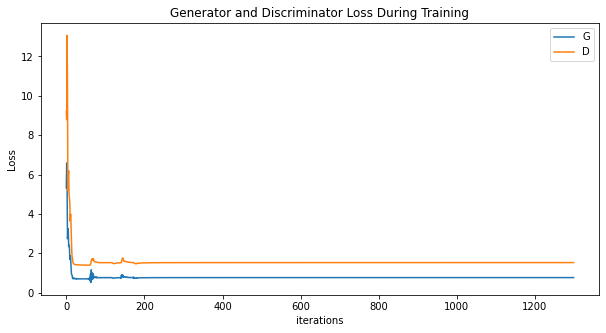

In [0]:
crnngan_min_max.plot_losses()

TODO: Comment on convergence

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

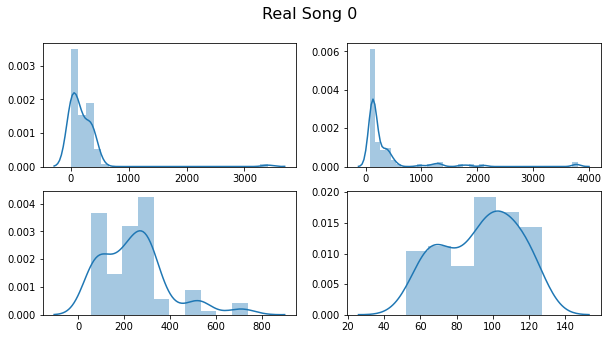

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

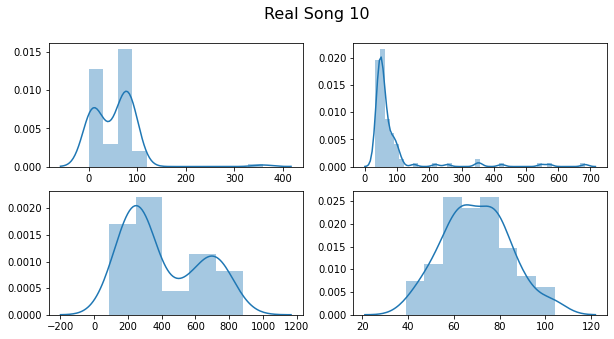

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

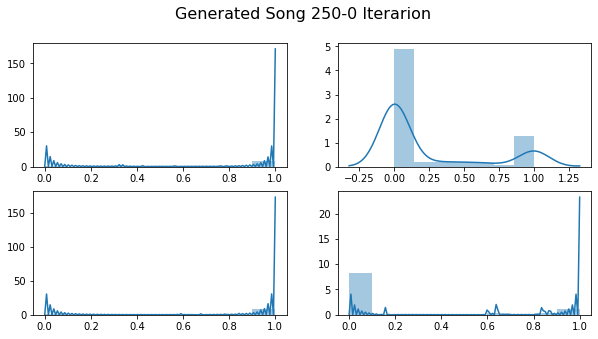

In [0]:
gen_song_250 = crnngan_min_max.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250[:,3], ax=axs[1, 1])

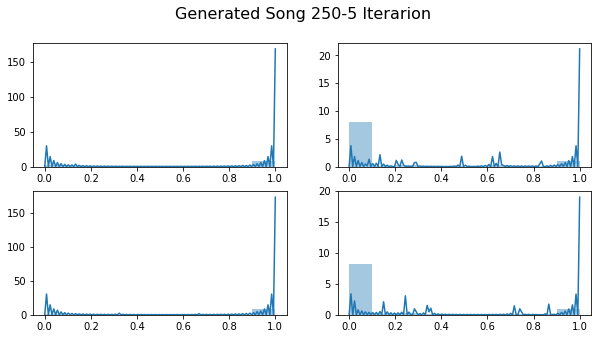

In [0]:
gen_song_250_5 = crnngan_min_max.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5[:,3], ax=axs[1, 1])

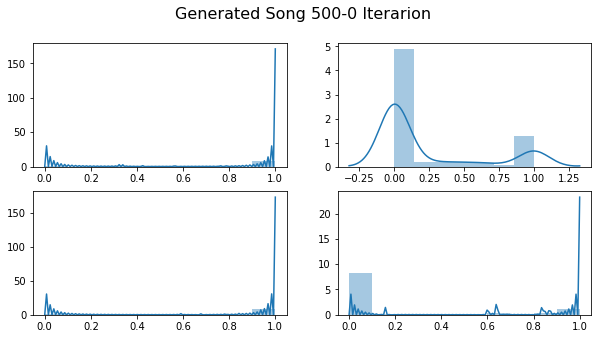

In [0]:
gen_song_500 = crnngan_min_max.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500[:,3], ax=axs[1, 1])

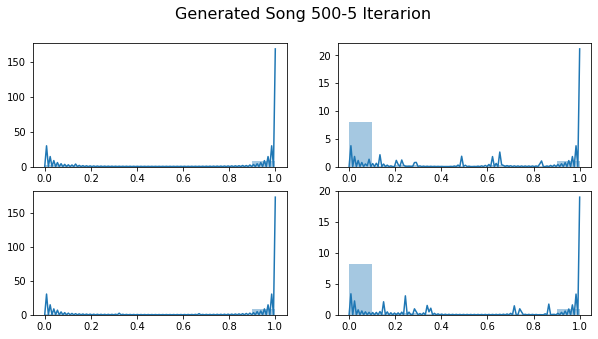

In [0]:
gen_song_500_5 = crnngan_min_max.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5[:,3], ax=axs[1, 1])

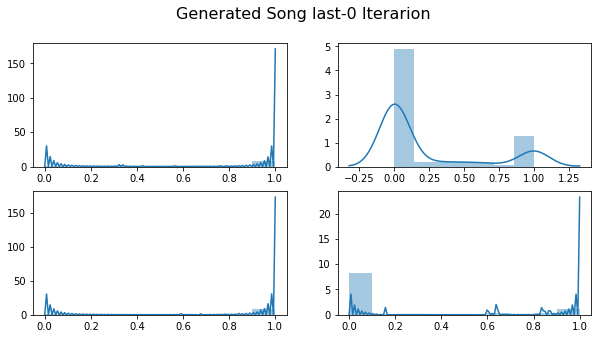

In [0]:
gen_song_last = crnngan_min_max.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last[:,3], ax=axs[1, 1])

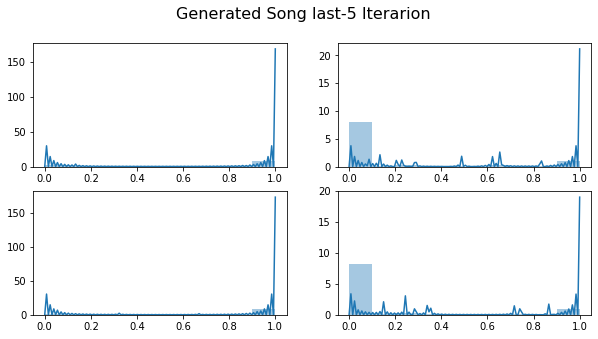

In [0]:
gen_song_last_5 = crnngan_min_max.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5[:,3], ax=axs[1, 1])

Even though we haven't unscaled the generated songs, we can clearly see that most values are either at the top or a t the minimum making them no good at all...

#### Curriculum

In [0]:
# Data loader
batch_length = 100
sequence_length = 20
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 2
# General
epochs = 80
# Curriculum learning
curriculum_learning = True
G_var_threshold = 1e-3
D_var_threshold = 1e-3
max_sequence_length = 200
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]


crnngan_min_max_curriculum = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs, 
                 scale=scale, scale_values=scale_values,
                 G_var_threshold=G_var_threshold, D_var_threshold=D_var_threshold,
                 max_sequence_length=max_sequence_length)

cuda


In [0]:
crnngan_min_max_curriculum.trainloop(musicDataLoader)

Start training for 80 epochs
[0/80][0]	Loss_D: 5.9949	Loss_G: 5.3511	D(x): -2.9928	D(G(z)): -2.9951 / -0.0001
 Time since epoch started: 0.06
There are a total of 0 fake songs saved already
[0/80][10]	Loss_D: 1.9044	Loss_G: 0.7466	D(x): -0.5393	D(G(z)): -0.5395 / -0.6667
 Time since epoch started: 0.43
There are a total of 5 fake songs saved already
[0/80][20]	Loss_D: 1.3811	Loss_G: 0.7323	D(x): -0.6765	D(G(z)): -0.6646 / -0.6448
 Time since epoch started: 0.79
There are a total of 10 fake songs saved already
Epoch time: 0.93
[1/80][30]	Loss_D: 1.3890	Loss_G: 0.6843	D(x): -0.6781	D(G(z)): -0.6744 / -0.6829
 Time since epoch started: 0.22
There are a total of 15 fake songs saved already
[1/80][40]	Loss_D: 1.4142	Loss_G: 0.6834	D(x): -0.5593	D(G(z)): -0.5573 / -0.6104
 Time since epoch started: 0.58
There are a total of 20 fake songs saved already
Epoch time: 0.92
[2/80][50]	Loss_D: 1.3948	Loss_G: 0.7431	D(x): -0.6534	D(G(z)): -0.6524 / -0.6506
 Time since epoch started: 0.04
There are a

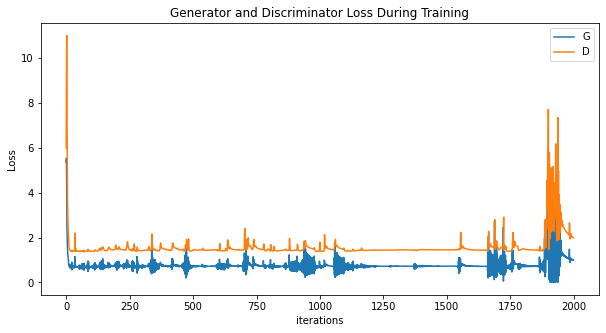

In [0]:
crnngan_min_max_curriculum.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

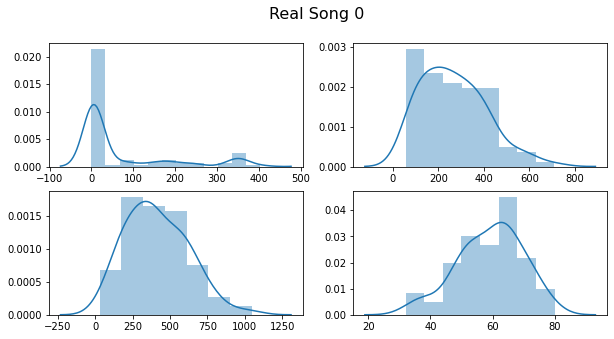

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

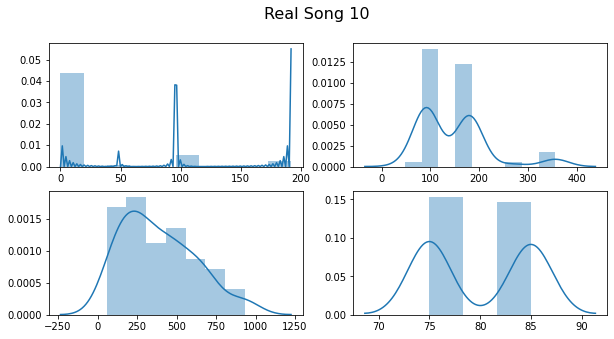

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

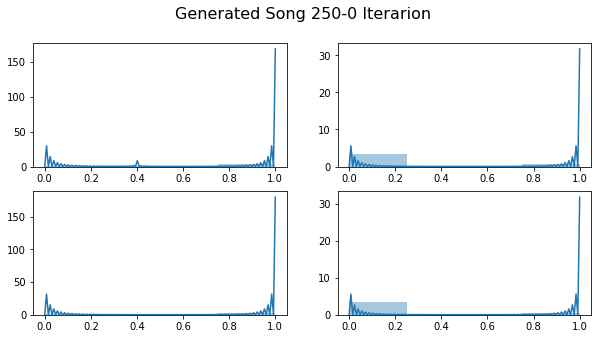

In [0]:
gen_song_250_curriculum = crnngan_min_max_curriculum.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_curriculum[:,3], ax=axs[1, 1])

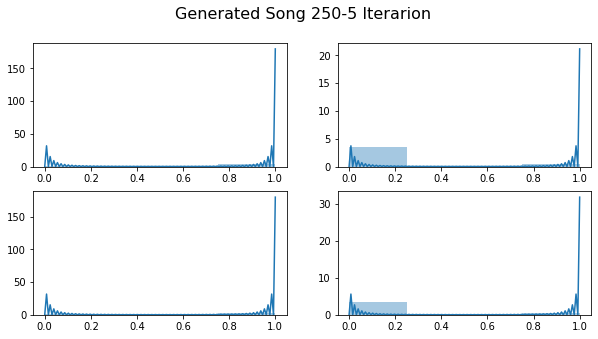

In [0]:
gen_song_250_5_curriculum = crnngan_min_max_curriculum.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_curriculum[:,3], ax=axs[1, 1])

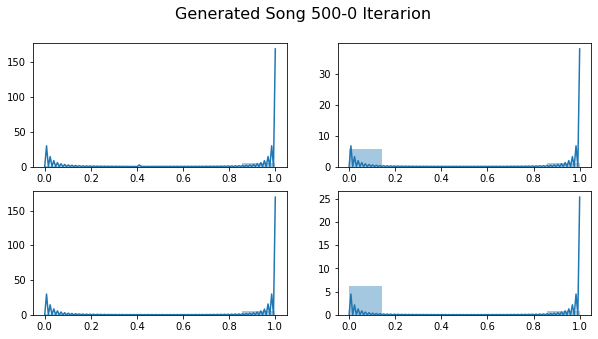

In [0]:
gen_song_500_curriculum = crnngan_min_max_curriculum.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_curriculum[:,3], ax=axs[1, 1])

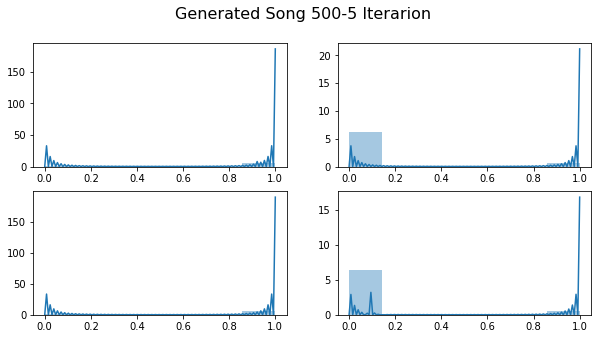

In [0]:
gen_song_500_5_curriculum = crnngan_min_max_curriculum.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_curriculum[:,3], ax=axs[1, 1])

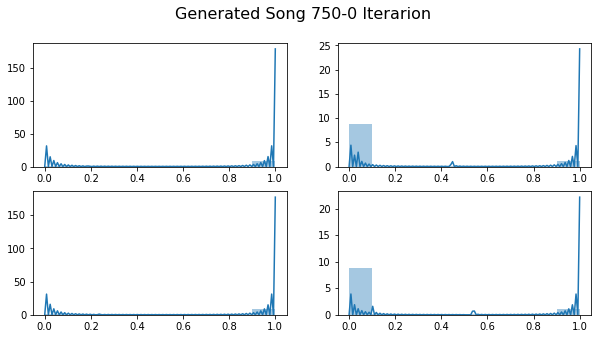

In [0]:
gen_song_750_curriculum = crnngan_min_max_curriculum.generated_songs[750][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 750-0 Iterarion', fontsize=16)
sns.distplot(gen_song_750_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_750_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_750_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_750_curriculum[:,3], ax=axs[1, 1])

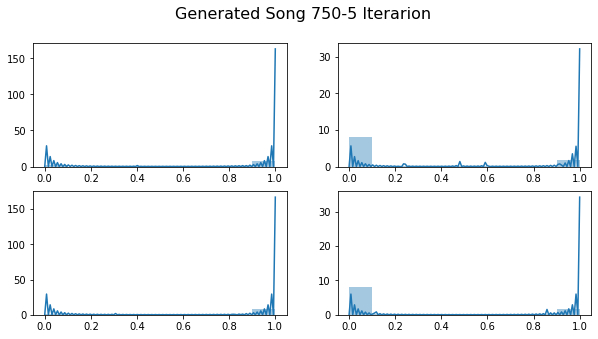

In [0]:
gen_song_750_5_curriculum = crnngan_min_max_curriculum.generated_songs[750][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 750-5 Iterarion', fontsize=16)
sns.distplot(gen_song_750_5_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_750_5_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_750_5_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_750_5_curriculum[:,3], ax=axs[1, 1])

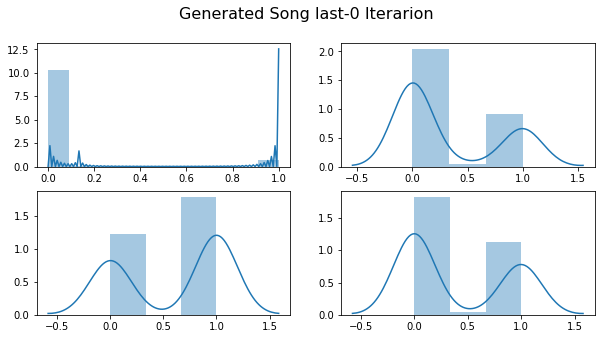

In [0]:
gen_song_last_curriculum = crnngan_min_max_curriculum.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_curriculum[:,3], ax=axs[1, 1])

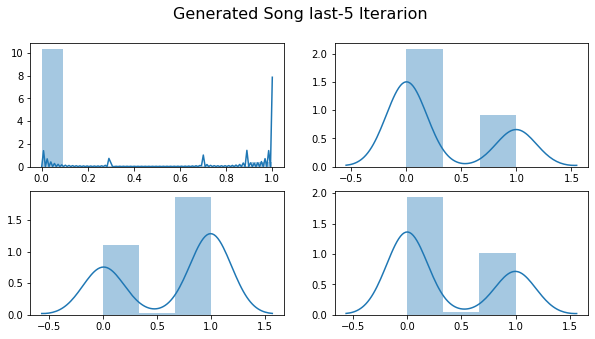

In [0]:
gen_song_last_5_curriculum = crnngan_min_max_curriculum.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_curriculum[:,3], ax=axs[1, 1])

### Simple architecture (3 layers deep discriminator)

#### No Curriculum

In [0]:
# Data loader
batch_length = 100
sequence_length = 100
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 50
curriculum_learning = False
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]


crnngan_minmax_deep_discr = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values)

cuda


In [0]:
crnngan_minmax_deep_discr.trainloop(musicDataLoader)

Start training for 50 epochs
[0/50][0]	Loss_D: 9.2039	Loss_G: 2.4962	D(x): -4.5960	D(G(z)): -4.5969 / -0.6700
 Time since epoch started: 0.21
There are a total of 0 fake songs saved already
[0/50][10]	Loss_D: 4.3707	Loss_G: 1.9638	D(x): -1.6144	D(G(z)): -1.5455 / -0.1143
 Time since epoch started: 1.94
There are a total of 5 fake songs saved already
[0/50][20]	Loss_D: 2.7286	Loss_G: 0.9729	D(x): -0.5668	D(G(z)): -0.5656 / -0.2320
 Time since epoch started: 3.65
There are a total of 10 fake songs saved already
Epoch time: 4.33
[1/50][30]	Loss_D: 1.4570	Loss_G: 0.7035	D(x): -0.5730	D(G(z)): -0.5756 / -0.6183
 Time since epoch started: 1.06
There are a total of 15 fake songs saved already
[1/50][40]	Loss_D: 1.4294	Loss_G: 0.7415	D(x): -0.5942	D(G(z)): -0.5944 / -0.5297
 Time since epoch started: 2.80
There are a total of 20 fake songs saved already
Epoch time: 4.33
[2/50][50]	Loss_D: 1.4793	Loss_G: 0.7501	D(x): -0.4797	D(G(z)): -0.4815 / -0.4308
 Time since epoch started: 0.17
There are a

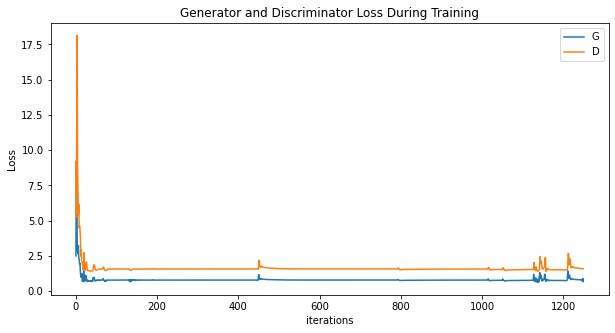

In [0]:
crnngan_minmax_deep_discr.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

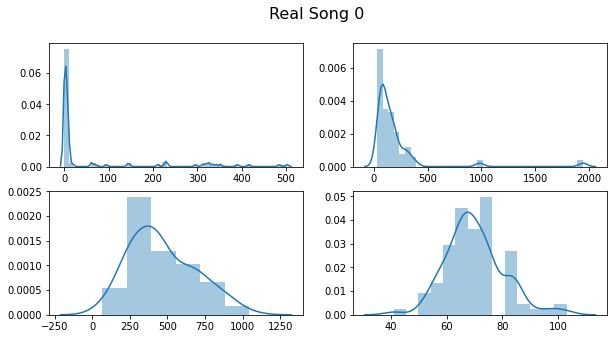

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

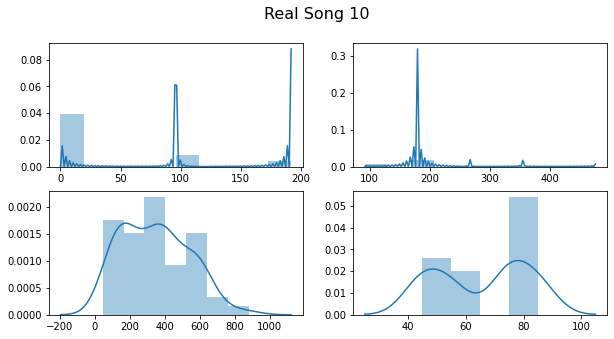

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

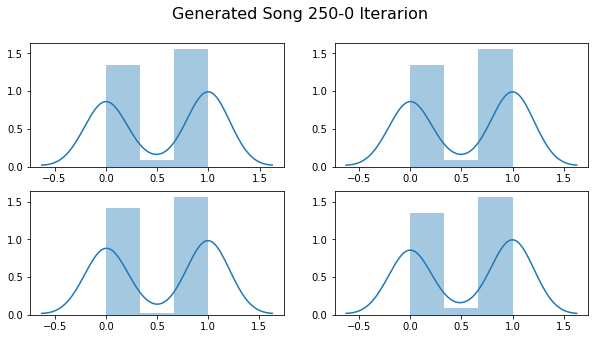

In [0]:
gen_song_250_deep_disc = crnngan_minmax_deep_discr.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_deep_disc[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_deep_disc[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_deep_disc[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_deep_disc[:,3], ax=axs[1, 1])

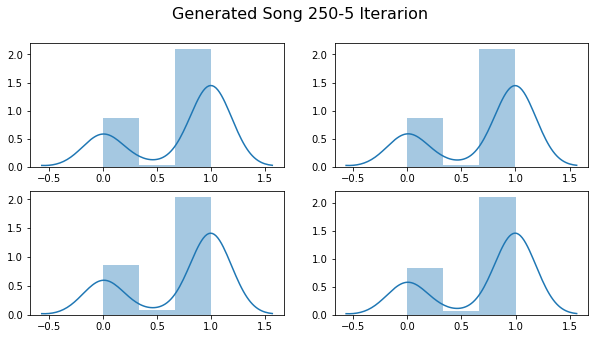

In [0]:
gen_song_250_5_deep_discr = crnngan_minmax_deep_discr.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_deep_discr[:,3], ax=axs[1, 1])

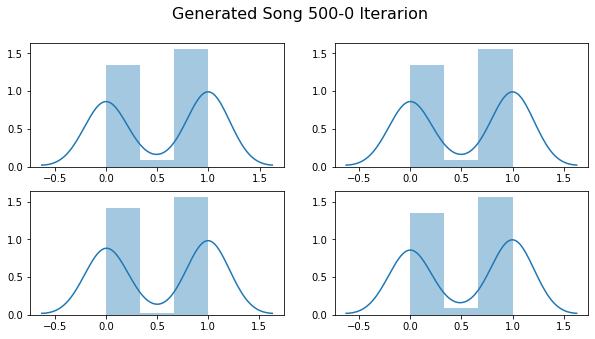

In [0]:
gen_song_500_deep_discr = crnngan_minmax_deep_discr.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_deep_discr[:,3], ax=axs[1, 1])

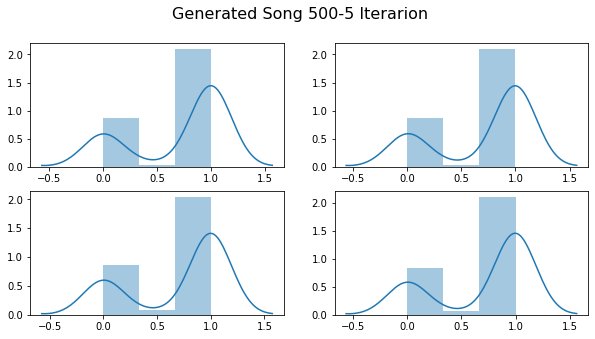

In [0]:
gen_song_500_5_deep_discr = crnngan_minmax_deep_discr.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_deep_discr[:,3], ax=axs[1, 1])

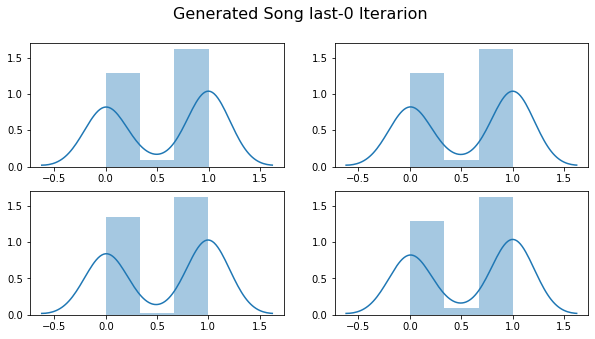

In [0]:
gen_song_last_deep_discr = crnngan_minmax_deep_discr.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_deep_discr[:,3], ax=axs[1, 1])

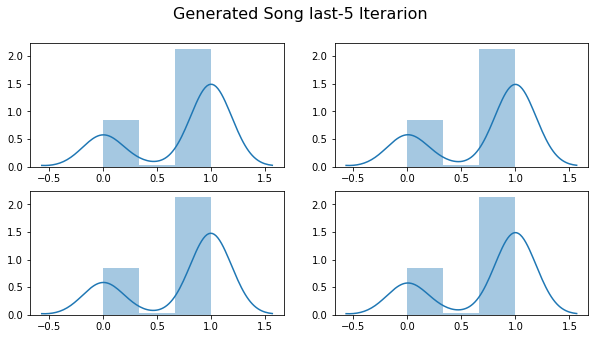

In [0]:
gen_song_last_5_deep_discr = crnngan_minmax_deep_discr.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_deep_discr[:,3], ax=axs[1, 1])

#### Curriculum

In [0]:
# Data loader
batch_length = 100
sequence_length = 20
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 80
curriculum_learning = True
G_var_threshold = 1e-3
D_var_threshold = 1e-3
max_sequence_length = 200
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]


crnngan_minmax_deep_discr_curriculum = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 G_var_threshold=G_var_threshold, D_var_threshold=D_var_threshold,
                 max_sequence_length=max_sequence_length)

cuda


In [0]:
crnngan_minmax_deep_discr_curriculum.trainloop(musicDataLoader)

Start training for 80 epochs
[0/80][0]	Loss_D: 6.0001	Loss_G: 2.3548	D(x): -2.9946	D(G(z)): -2.9948 / -0.0905
 Time since epoch started: 0.06
There are a total of 0 fake songs saved already
[0/80][10]	Loss_D: 3.6692	Loss_G: 1.7686	D(x): -0.5574	D(G(z)): -0.5574 / -0.5412
 Time since epoch started: 0.53
There are a total of 5 fake songs saved already
[0/80][20]	Loss_D: 3.3683	Loss_G: 1.6544	D(x): -0.5884	D(G(z)): -0.5884 / -0.5982
 Time since epoch started: 0.99
There are a total of 10 fake songs saved already
Epoch time: 1.17
[1/80][30]	Loss_D: 3.3786	Loss_G: 1.5385	D(x): -0.2658	D(G(z)): -0.2658 / -1.2960
 Time since epoch started: 0.27
There are a total of 15 fake songs saved already
[1/80][40]	Loss_D: 2.8696	Loss_G: 1.3744	D(x): -0.3594	D(G(z)): -0.3594 / -0.9830
 Time since epoch started: 0.70
There are a total of 20 fake songs saved already
Epoch time: 1.09
[2/80][50]	Loss_D: 2.6319	Loss_G: 1.2910	D(x): -0.3738	D(G(z)): -0.3738 / -0.9190
 Time since epoch started: 0.05
There are a

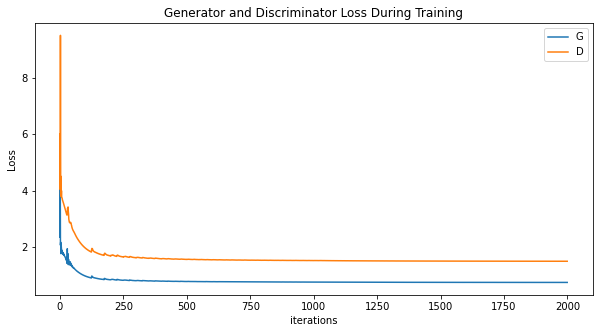

In [0]:
crnngan_minmax_deep_discr_curriculum.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

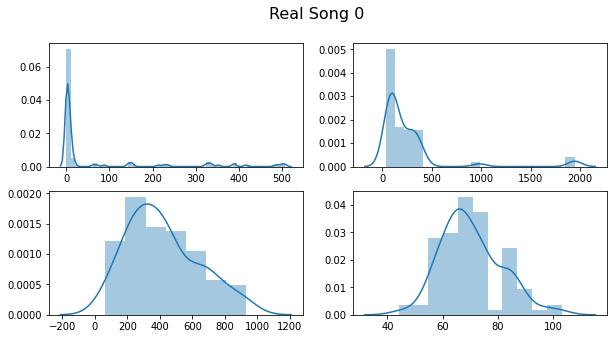

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

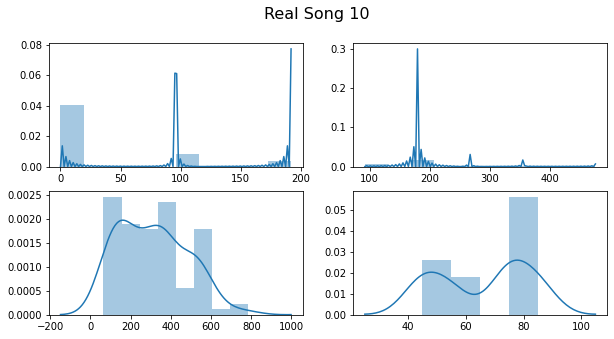

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

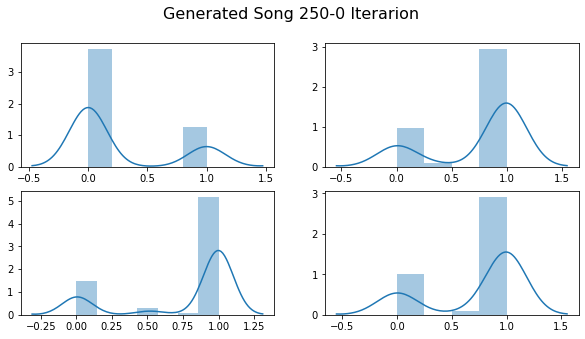

In [0]:
gen_song_250_deep_disc_curriculum = crnngan_minmax_deep_discr_curriculum.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_deep_disc_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_deep_disc_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_deep_disc_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_deep_disc_curriculum[:,3], ax=axs[1, 1])

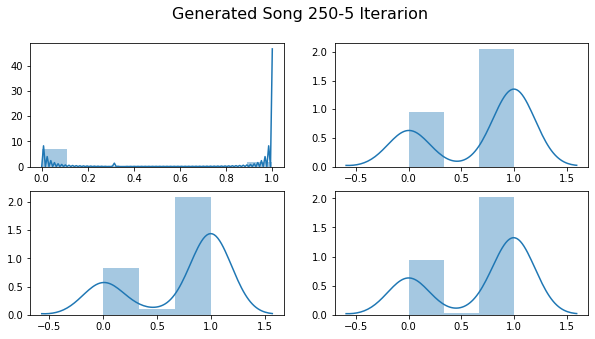

In [0]:
gen_song_250_5_deep_discr_curriculum = crnngan_minmax_deep_discr_curriculum.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_deep_discr_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_deep_discr_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_deep_discr_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_deep_discr_curriculum[:,3], ax=axs[1, 1])

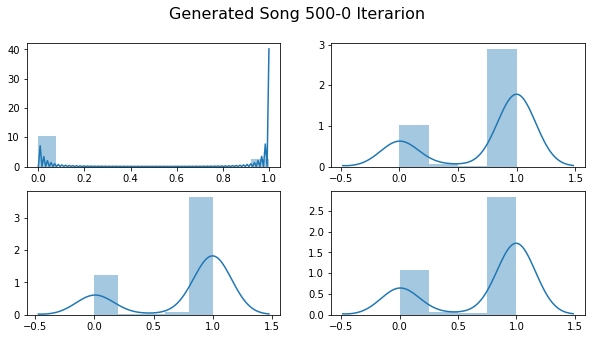

In [0]:
gen_song_500_deep_discr_curriculum = crnngan_minmax_deep_discr_curriculum.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_deep_discr_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_deep_discr_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_deep_discr_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_deep_discr_curriculum[:,3], ax=axs[1, 1])

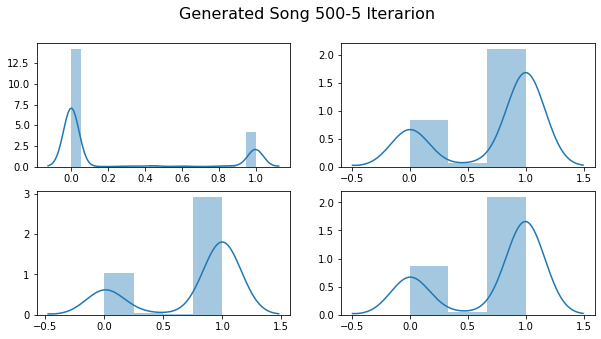

In [0]:
gen_song_500_5_deep_discr_curriculum = crnngan_minmax_deep_discr_curriculum.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_deep_discr_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_deep_discr_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_deep_discr_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_deep_discr_curriculum[:,3], ax=axs[1, 1])

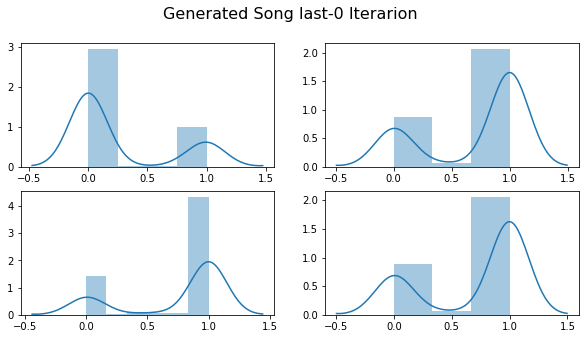

In [0]:
gen_song_last_deep_discr_curriculum = crnngan_minmax_deep_discr_curriculum.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_deep_discr_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_deep_discr_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_deep_discr_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_deep_discr_curriculum[:,3], ax=axs[1, 1])

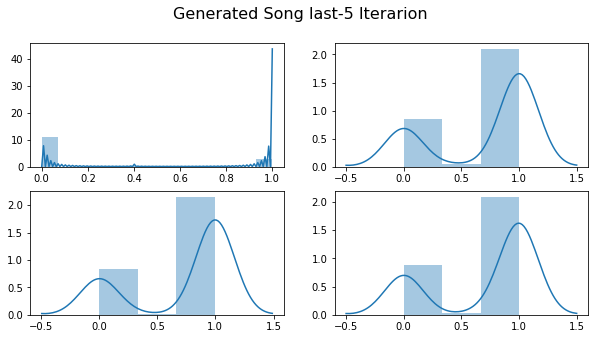

In [0]:
gen_song_last_5_deep_discr_curriculum = crnngan_minmax_deep_discr_curriculum.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_deep_discr_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_deep_discr_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_deep_discr_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_deep_discr_curriculum[:,3], ax=axs[1, 1])

### Simple architecture (3 layers deep both)

#### No Curriculum

In [0]:
# Data loader
batch_length = 100
sequence_length = 100
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 3
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 50
curriculum_learning = False
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]


crnngan_minmax_deep = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values)

cuda


In [0]:
crnngan_minmax_deep.trainloop(musicDataLoader)

Start training for 50 epochs
[0/50][0]	Loss_D: 9.2160	Loss_G: 2.7002	D(x): -4.6046	D(G(z)): -4.6050 / -0.8958
 Time since epoch started: 0.22
There are a total of 0 fake songs saved already
[0/50][10]	Loss_D: 3.4146	Loss_G: 2.3270	D(x): -0.3613	D(G(z)): -0.4883 / -1.0762
 Time since epoch started: 2.12
There are a total of 5 fake songs saved already
[0/50][20]	Loss_D: 4.2346	Loss_G: 1.0348	D(x): -0.0201	D(G(z)): -0.0169 / -0.4233
 Time since epoch started: 4.05
There are a total of 10 fake songs saved already
Epoch time: 4.81
[1/50][30]	Loss_D: 1.3320	Loss_G: 1.0335	D(x): -0.6060	D(G(z)): -0.5727 / -0.2545
 Time since epoch started: 1.13
There are a total of 15 fake songs saved already
[1/50][40]	Loss_D: 1.4238	Loss_G: 0.7638	D(x): -0.4935	D(G(z)): -0.5176 / -0.5056
 Time since epoch started: 3.03
There are a total of 20 fake songs saved already
Epoch time: 4.74
[2/50][50]	Loss_D: 1.3867	Loss_G: 0.7274	D(x): -0.6270	D(G(z)): -0.6328 / -0.5953
 Time since epoch started: 0.19
There are a

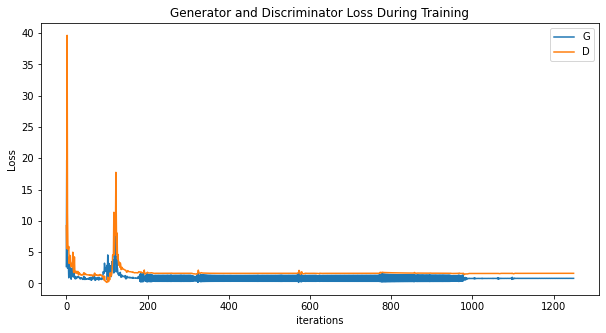

In [0]:
crnngan_minmax_deep.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

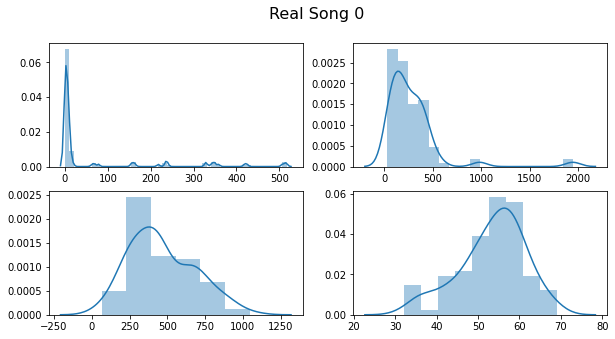

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

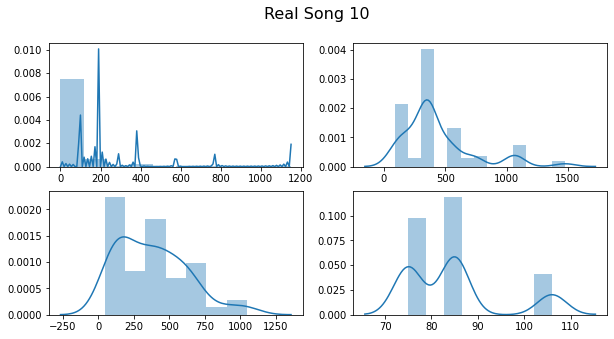

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

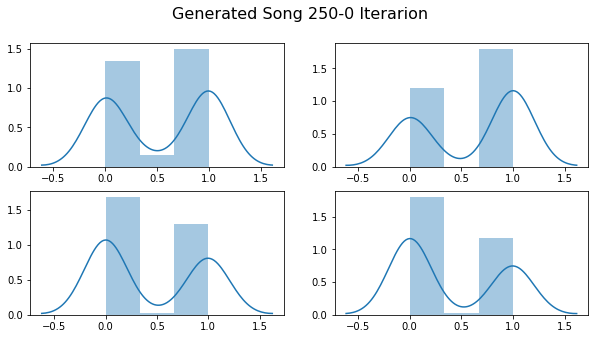

In [0]:
gen_song_250_deep = crnngan_minmax_deep.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_deep[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_deep[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_deep[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_deep[:,3], ax=axs[1, 1])

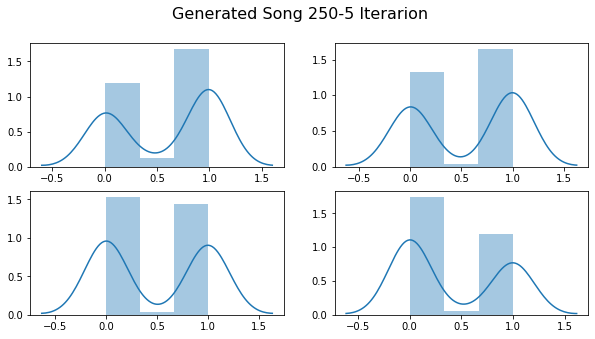

In [0]:
gen_song_250_5_deep = crnngan_minmax_deep.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_deep[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_deep[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_deep[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_deep[:,3], ax=axs[1, 1])

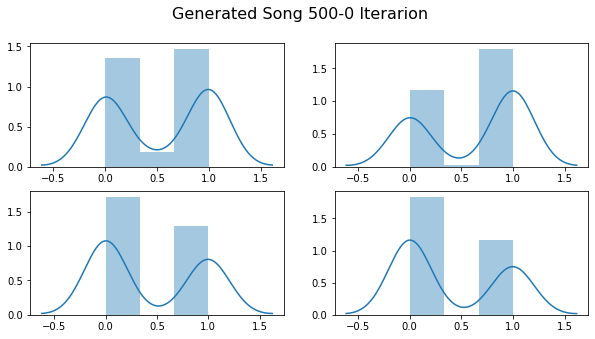

In [0]:
gen_song_500_deep = crnngan_minmax_deep.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_deep[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_deep[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_deep[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_deep[:,3], ax=axs[1, 1])

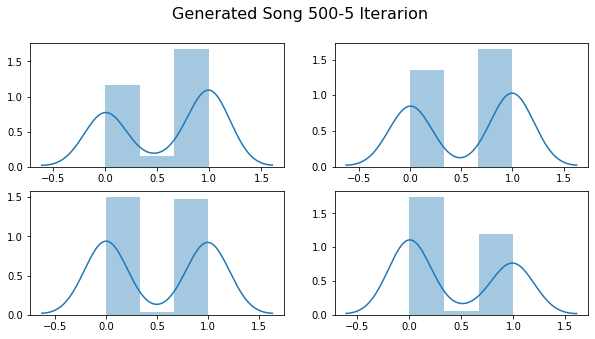

In [0]:
gen_song_500_5_deep = crnngan_minmax_deep.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_deep[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_deep[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_deep[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_deep[:,3], ax=axs[1, 1])

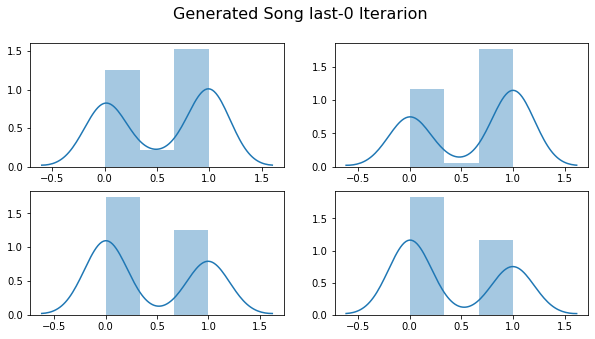

In [0]:
gen_song_last_deep = crnngan_minmax_deep.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_deep[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_deep[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_deep[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_deep[:,3], ax=axs[1, 1])

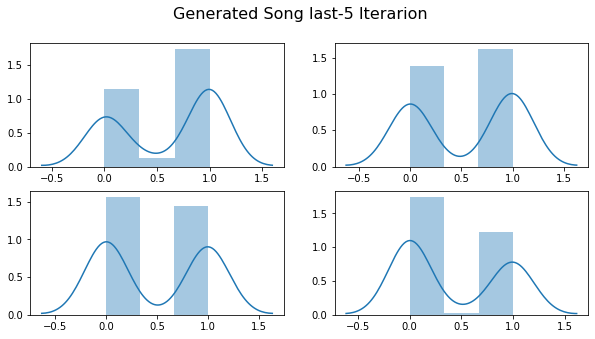

In [0]:
gen_song_last_5_deep = crnngan_minmax_deep.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_deep[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_deep[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_deep[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_deep[:,3], ax=axs[1, 1])

#### Curriculum

In [0]:
# Data loader
batch_length = 100
sequence_length = 20
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 3
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 80
curriculum_learning = True
G_var_threshold = 1e-3
D_var_threshold = 1e-3
max_sequence_length = 200
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]


crnngan_minmax_deep_curriculum = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 G_var_threshold=G_var_threshold, D_var_threshold=D_var_threshold,
                 max_sequence_length=max_sequence_length)

cuda


In [0]:
crnngan_minmax_deep_curriculum.trainloop(musicDataLoader)

Start training for 80 epochs
[0/80][0]	Loss_D: 6.0035	Loss_G: 2.0442	D(x): -2.9944	D(G(z)): -2.9946 / -0.3366
 Time since epoch started: 0.06
There are a total of 0 fake songs saved already
[0/80][10]	Loss_D: 3.7638	Loss_G: 1.8608	D(x): -0.4682	D(G(z)): -0.4682 / -0.6179
 Time since epoch started: 0.55
There are a total of 5 fake songs saved already
[0/80][20]	Loss_D: 3.5621	Loss_G: 1.7685	D(x): -0.5727	D(G(z)): -0.5727 / -0.5878
 Time since epoch started: 1.05
There are a total of 10 fake songs saved already
Epoch time: 1.24
[1/80][30]	Loss_D: 3.4364	Loss_G: 1.5035	D(x): -0.4194	D(G(z)): -0.4194 / -0.9665
 Time since epoch started: 0.28
There are a total of 15 fake songs saved already
[1/80][40]	Loss_D: 3.2274	Loss_G: 1.5780	D(x): -0.3569	D(G(z)): -0.3569 / -0.9079
 Time since epoch started: 0.77
There are a total of 20 fake songs saved already
Epoch time: 1.20
[2/80][50]	Loss_D: 3.0484	Loss_G: 1.5278	D(x): -0.3583	D(G(z)): -0.3583 / -0.8867
 Time since epoch started: 0.05
There are a

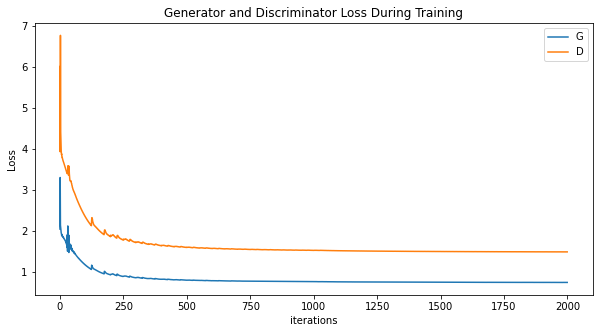

In [0]:
crnngan_minmax_deep_curriculum.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

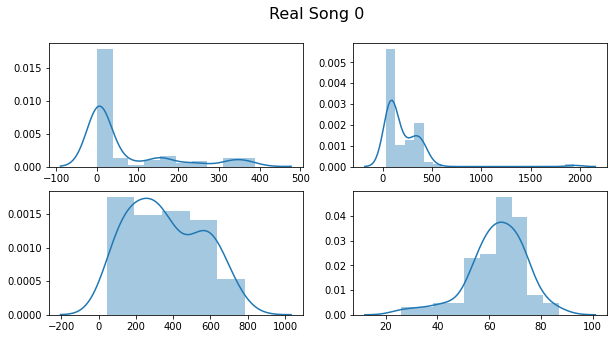

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

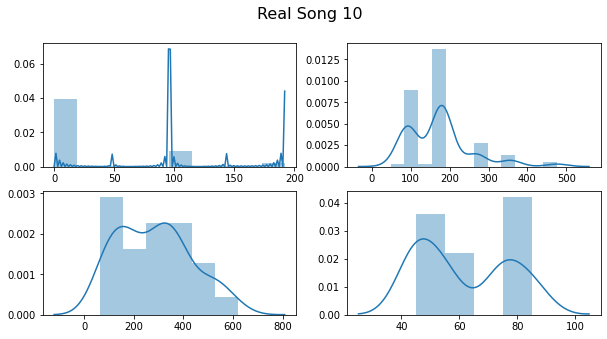

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

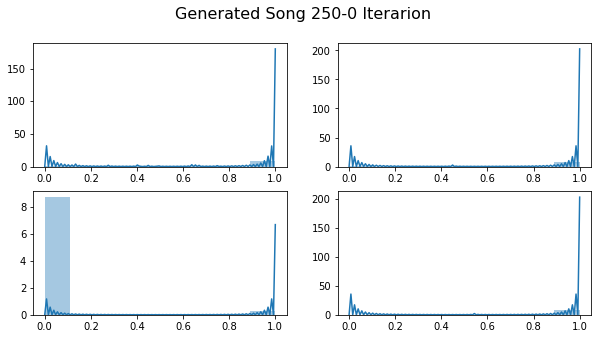

In [0]:
gen_song_250_deep_curriculum = crnngan_minmax_deep_curriculum.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_deep_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_deep_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_deep_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_deep_curriculum[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


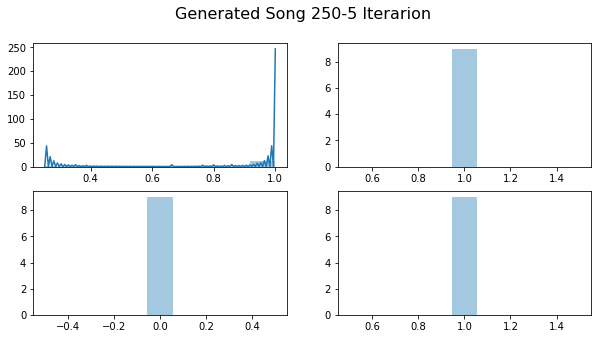

In [0]:
gen_song_250_5_deep_curriculum = crnngan_minmax_deep_curriculum.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_deep_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_deep_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_deep_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_deep_curriculum[:,3], ax=axs[1, 1])

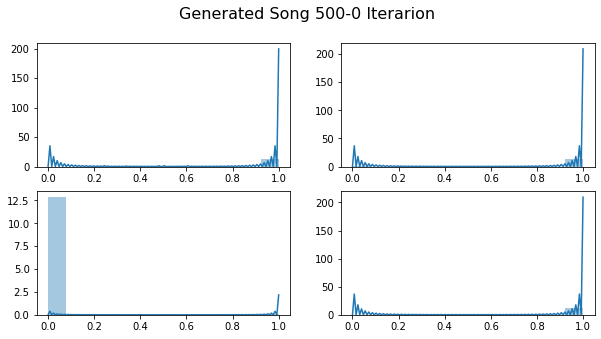

In [0]:
gen_song_500_deep_curriculum = crnngan_minmax_deep_curriculum.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_deep_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_deep_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_deep_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_deep_curriculum[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


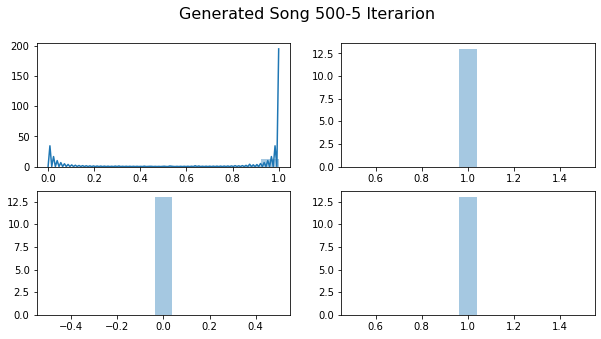

In [0]:
gen_song_500_5_deep_curriculum = crnngan_minmax_deep_curriculum.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_deep_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_deep_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_deep_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_deep_curriculum[:,3], ax=axs[1, 1])

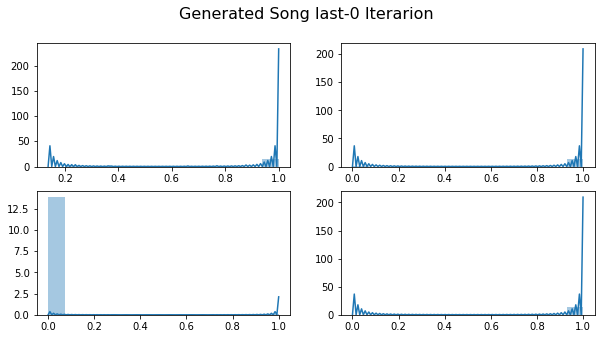

In [0]:
gen_song_last_deep_curriculum = crnngan_minmax_deep_curriculum.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_deep_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_deep_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_deep_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_deep_curriculum[:,3], ax=axs[1, 1])

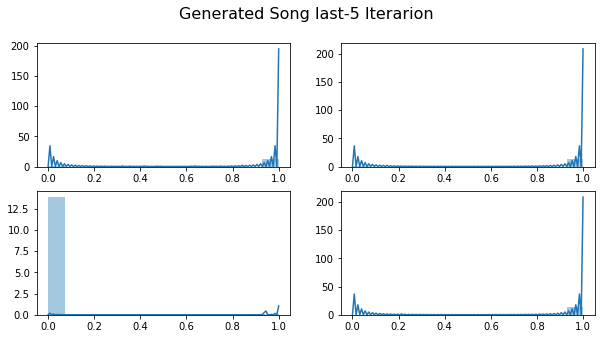

In [0]:
gen_song_last_5_deep_curriculum = crnngan_minmax_deep_curriculum.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_deep_curriculum[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_deep_curriculum[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_deep_curriculum[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_deep_curriculum[:,3], ax=axs[1, 1])

### Complex Discriminator (2 layers deep both)

#### No Curriculum

In [0]:
# Data loader
batch_length = 100
sequence_length = 100
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 2
# General
epochs = 50
curriculum_learning = False
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexDiscriminator = True


crnngan_minmax_complex_discr = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 complexDiscriminator=complexDiscriminator)

cuda
Complex Discriminator


In [0]:
crnngan_minmax_complex_discr.trainloop(musicDataLoader)

Start training for 50 epochs
[0/50][0]	Loss_D: 9.2111	Loss_G: 24.4867	D(x): -4.6037	D(G(z)): -4.6042 / 0.0000
 Time since epoch started: 0.17
There are a total of 0 fake songs saved already
[0/50][10]	Loss_D: 2.5267	Loss_G: 0.9709	D(x): -0.1792	D(G(z)): -0.1938 / -0.3032
 Time since epoch started: 1.67
There are a total of 5 fake songs saved already
[0/50][20]	Loss_D: 1.3855	Loss_G: 0.6835	D(x): -0.6441	D(G(z)): -0.6285 / -0.6370
 Time since epoch started: 3.14
There are a total of 10 fake songs saved already
Epoch time: 3.87
[1/50][30]	Loss_D: 1.3842	Loss_G: 0.7102	D(x): -0.6478	D(G(z)): -0.6522 / -0.6290
 Time since epoch started: 0.74
There are a total of 15 fake songs saved already
[1/50][40]	Loss_D: 1.4269	Loss_G: 0.6518	D(x): -0.5200	D(G(z)): -0.5188 / -0.6133
 Time since epoch started: 2.20
There are a total of 20 fake songs saved already
[1/50][50]	Loss_D: 1.5818	Loss_G: 0.8037	D(x): -0.3821	D(G(z)): -0.3843 / -0.1600
 Time since epoch started: 3.69
There are a total of 25 fake

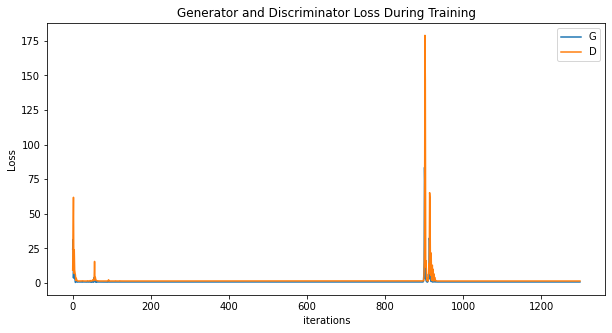

In [0]:
crnngan_minmax_complex_discr.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

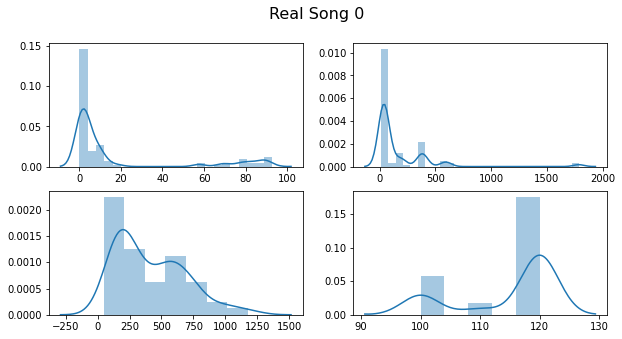

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

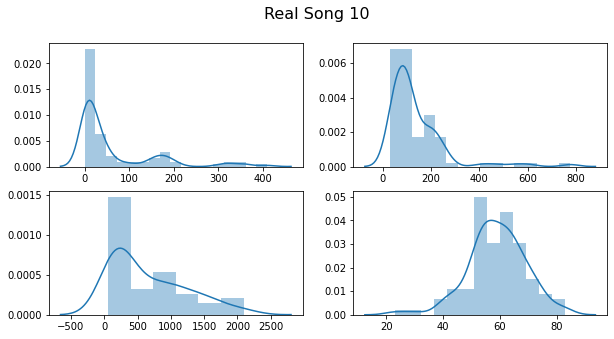

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

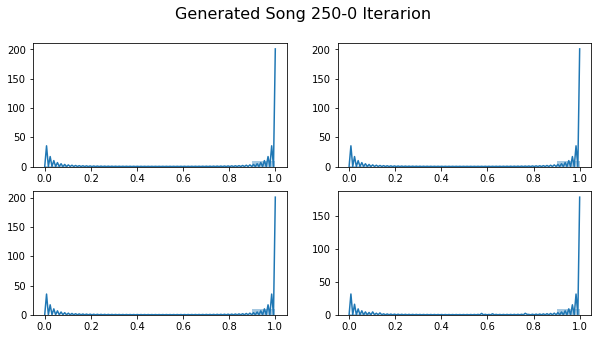

In [0]:
gen_song_250_complex_discr = crnngan_minmax_complex_discr.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_complex_discr[:,3], ax=axs[1, 1])

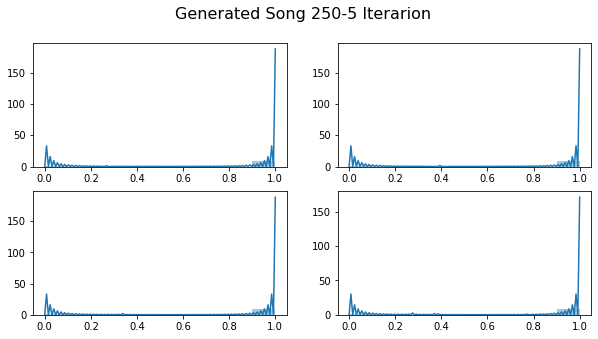

In [0]:
gen_song_250_5_complex_discr = crnngan_minmax_complex_discr.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_complex_discr[:,3], ax=axs[1, 1])

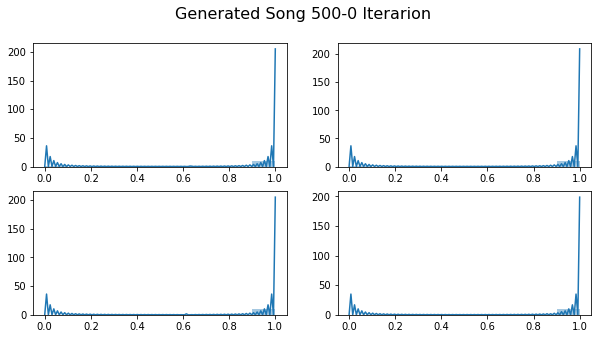

In [0]:
gen_song_500_complex_discr = crnngan_minmax_complex_discr.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_complex_discr[:,3], ax=axs[1, 1])

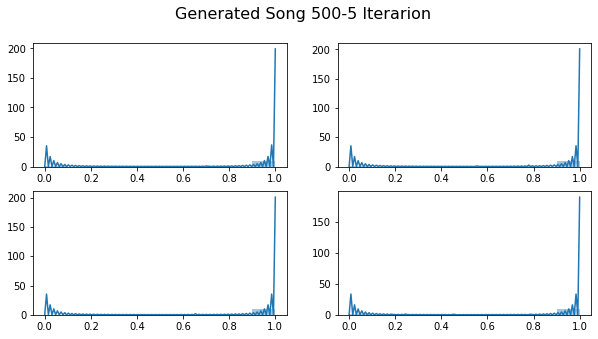

In [0]:
gen_song_500_5_complex_discr = crnngan_minmax_complex_discr.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_complex_discr[:,3], ax=axs[1, 1])

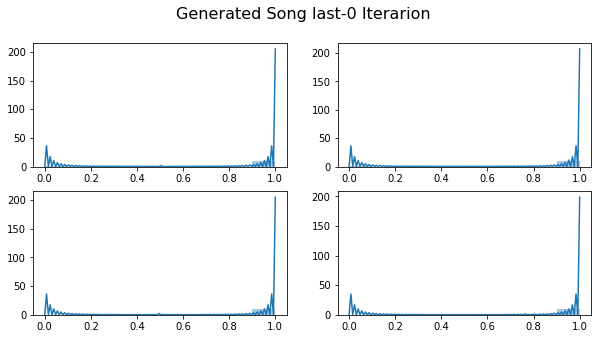

In [0]:
gen_song_last_complex_discr = crnngan_minmax_complex_discr.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_complex_discr[:,3], ax=axs[1, 1])

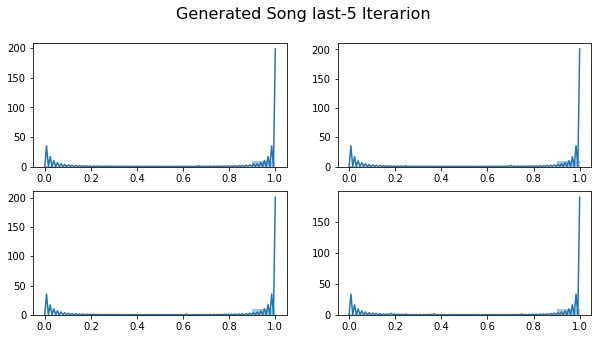

In [0]:
gen_song_last_5_complex_discr = crnngan_minmax_complex_discr.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_complex_discr[:,3], ax=axs[1, 1])

#### Curriculum

In [0]:
# Data loader
batch_length = 100
sequence_length = 20
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 2
# General
epochs = 80
curriculum_learning = True
G_var_threshold = 1e-3
D_var_threshold = 1e-3
max_sequence_length = 200
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexDiscriminator = True

crnngan_minmax_curriculum_complex_discr = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 G_var_threshold=G_var_threshold, D_var_threshold=D_var_threshold,
                 max_sequence_length=max_sequence_length,
                 complexDiscriminator=complexDiscriminator)

cuda
Complex Discriminator


In [0]:
crnngan_minmax_curriculum_complex_discr.trainloop(musicDataLoader)

Start training for 80 epochs
[0/80][0]	Loss_D: 5.9905	Loss_G: 23.2229	D(x): -2.9932	D(G(z)): -2.9937 / 0.0000
 Time since epoch started: 0.04
There are a total of 0 fake songs saved already
[0/80][10]	Loss_D: 2.6664	Loss_G: 1.1963	D(x): -0.9454	D(G(z)): -0.9489 / -0.0839
 Time since epoch started: 0.44
There are a total of 5 fake songs saved already
[0/80][20]	Loss_D: 2.3602	Loss_G: 1.3544	D(x): -0.1989	D(G(z)): -0.1984 / -0.1004
 Time since epoch started: 0.82
There are a total of 10 fake songs saved already
Epoch time: 1.01
[1/80][30]	Loss_D: 2.2527	Loss_G: 0.5092	D(x): -0.2173	D(G(z)): -0.2173 / -0.5073
 Time since epoch started: 0.19
There are a total of 15 fake songs saved already
[1/80][40]	Loss_D: 1.6925	Loss_G: 0.7958	D(x): -0.3061	D(G(z)): -0.3032 / -0.2990
 Time since epoch started: 0.59
There are a total of 20 fake songs saved already
[1/80][50]	Loss_D: 1.3763	Loss_G: 0.5192	D(x): -0.6643	D(G(z)): -0.6739 / -0.5192
 Time since epoch started: 0.97
There are a total of 25 fake

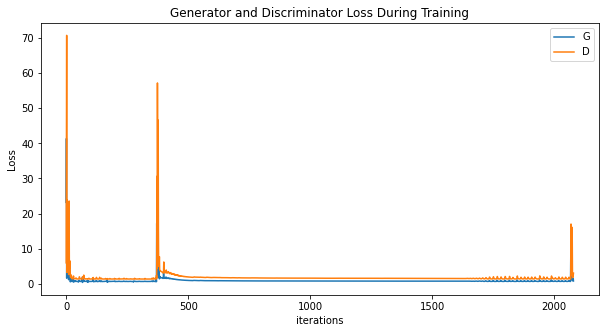

In [0]:
crnngan_minmax_curriculum_complex_discr.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

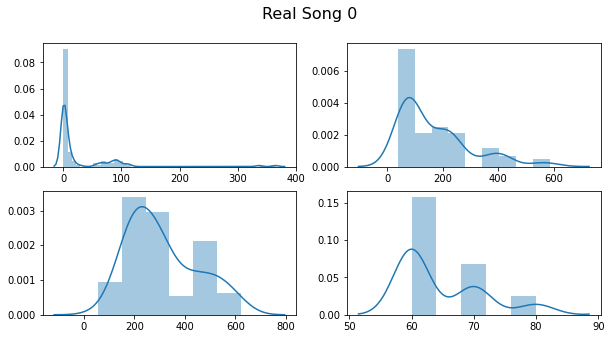

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

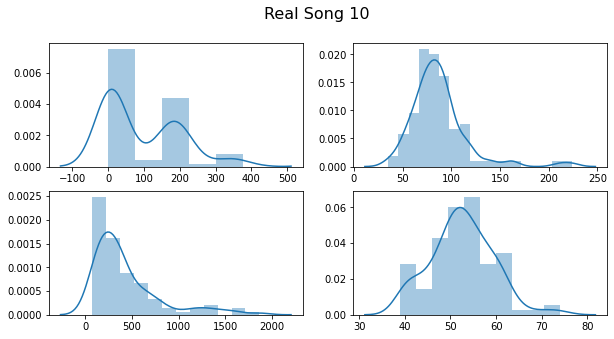

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

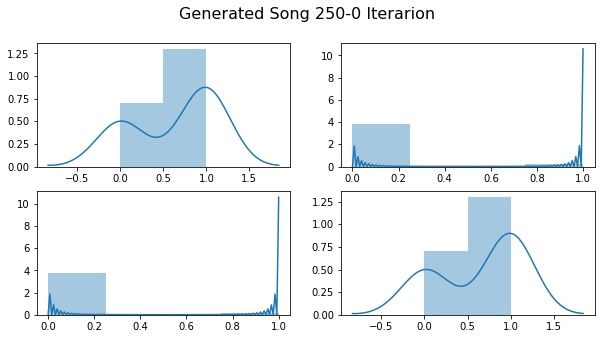

In [0]:
gen_song_250_curriculum_complex_discr = crnngan_minmax_curriculum_complex_discr.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_curriculum_complex_discr[:,3], ax=axs[1, 1])

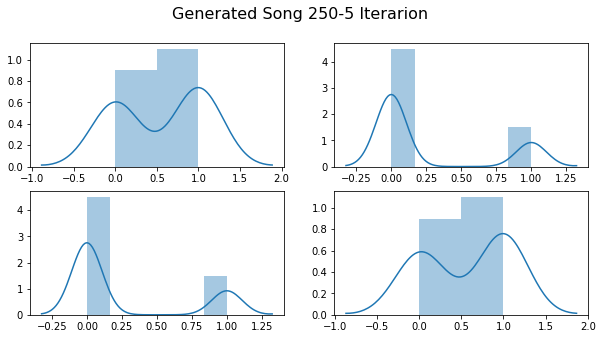

In [0]:
gen_song_250_5_curriculum_complex_discr = crnngan_minmax_curriculum_complex_discr.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_curriculum_complex_discr[:,3], ax=axs[1, 1])

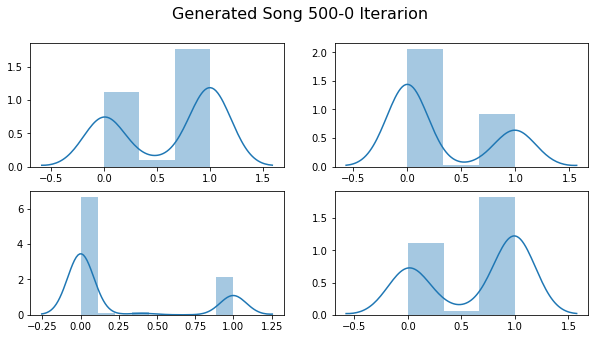

In [0]:
gen_song_500_curriculum_complex_discr = crnngan_minmax_curriculum_complex_discr.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_curriculum_complex_discr[:,3], ax=axs[1, 1])

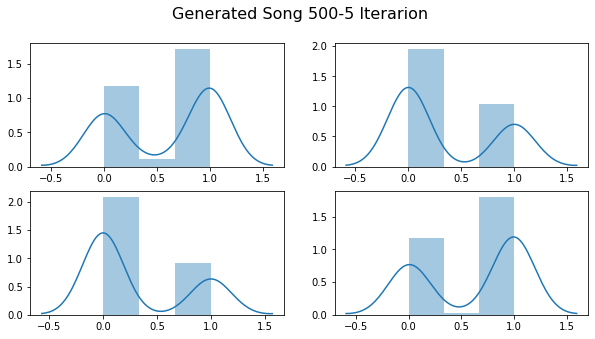

In [0]:
gen_song_500_5_curriculum_complex_discr = crnngan_minmax_curriculum_complex_discr.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_curriculum_complex_discr[:,3], ax=axs[1, 1])

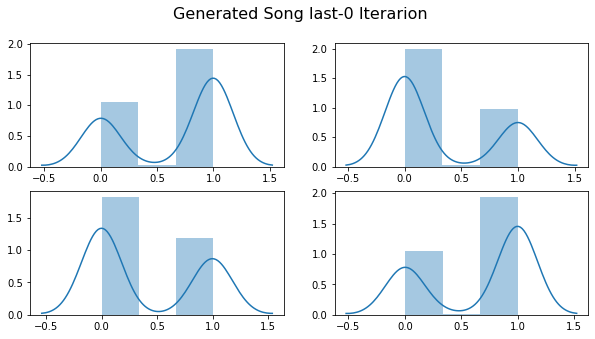

In [0]:
gen_song_last_curriculum_complex_discr = crnngan_minmax_curriculum_complex_discr.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_curriculum_complex_discr[:,3], ax=axs[1, 1])

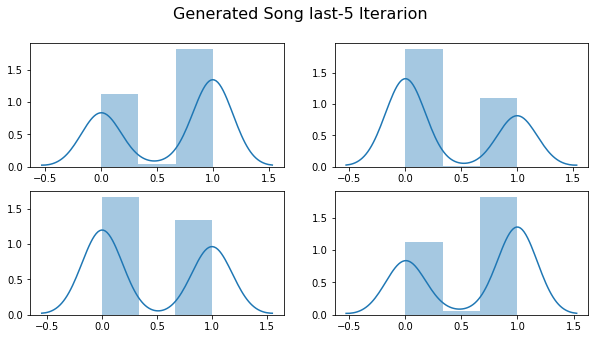

In [0]:
gen_song_last_5_curriculum_complex_discr = crnngan_minmax_curriculum_complex_discr.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_curriculum_complex_discr[:,3], ax=axs[1, 1])

### Complex Discriminator (3 layers deep generator)

#### No Curriculum

In [0]:
# Data loader
batch_length = 100
sequence_length = 100
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 3
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 2
# General
epochs = 50
curriculum_learning = False
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexDiscriminator = True


crnngan_minmax_deep_gen_complex_discr = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 complexDiscriminator=complexDiscriminator)

cuda
Complex Discriminator


In [0]:
crnngan_minmax_deep_gen_complex_discr.trainloop(musicDataLoader)

Start training for 50 epochs
[0/50][0]	Loss_D: 9.2120	Loss_G: 12.4644	D(x): -4.6045	D(G(z)): -4.6049 / 0.0000
 Time since epoch started: 0.19
There are a total of 0 fake songs saved already
[0/50][10]	Loss_D: 4.8666	Loss_G: 3.8335	D(x): -0.1542	D(G(z)): -0.1852 / -2.8239
 Time since epoch started: 1.85
There are a total of 5 fake songs saved already
[0/50][20]	Loss_D: 4.2961	Loss_G: 3.0938	D(x): -0.0333	D(G(z)): -0.0374 / -2.0025
 Time since epoch started: 3.48
There are a total of 10 fake songs saved already
Epoch time: 4.30
[1/50][30]	Loss_D: 9.7132	Loss_G: 4.3468	D(x): -0.0001	D(G(z)): -0.0001 / -0.9860
 Time since epoch started: 0.81
There are a total of 15 fake songs saved already
[1/50][40]	Loss_D: 2.8944	Loss_G: 2.0805	D(x): -0.2335	D(G(z)): -0.2396 / -2.0504
 Time since epoch started: 2.43
There are a total of 20 fake songs saved already
[1/50][50]	Loss_D: 3.4053	Loss_G: 4.1735	D(x): -0.0384	D(G(z)): -0.0408 / -0.1408
 Time since epoch started: 4.05
There are a total of 25 fake

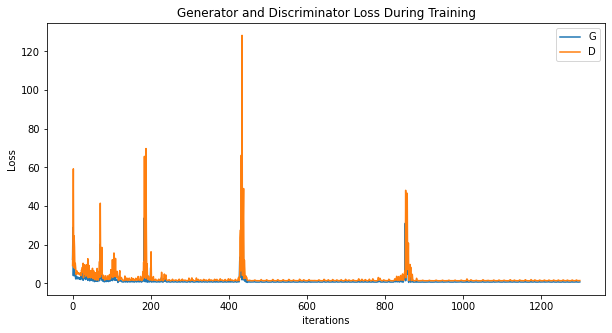

In [0]:
crnngan_minmax_deep_gen_complex_discr.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

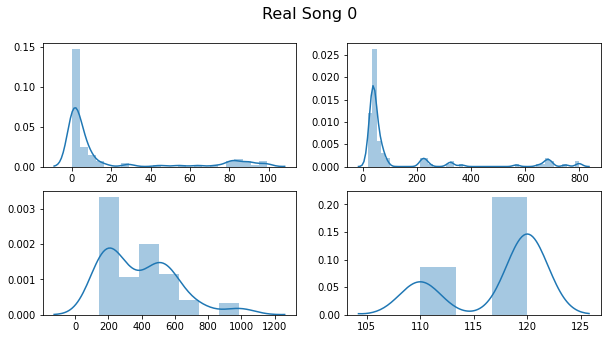

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

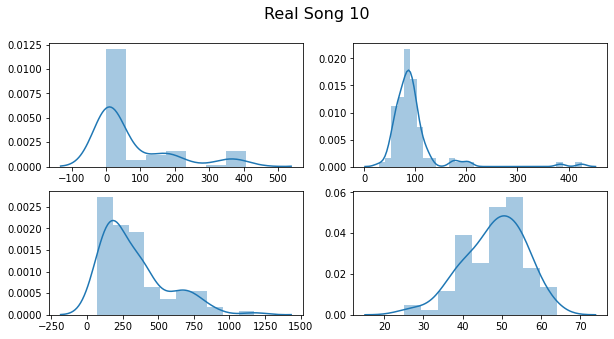

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

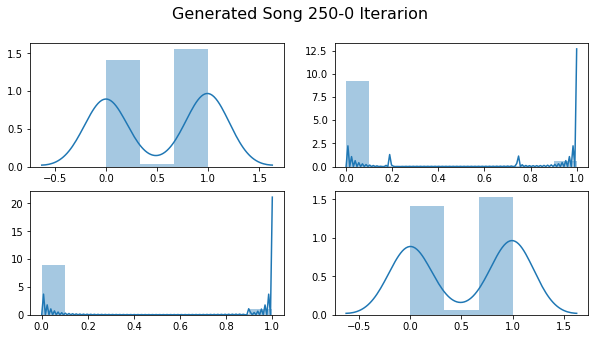

In [0]:
gen_song_250_deep_gen_complex_discr = crnngan_minmax_deep_gen_complex_discr.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_deep_gen_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_deep_gen_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_deep_gen_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_deep_gen_complex_discr[:,3], ax=axs[1, 1])

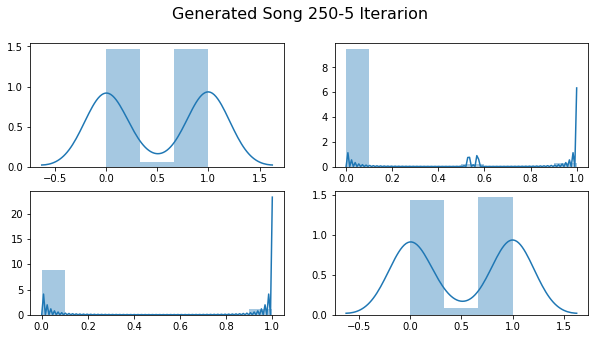

In [0]:
gen_song_250_5_deep_gen_complex_discr = crnngan_minmax_deep_gen_complex_discr.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_deep_gen_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_deep_gen_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_deep_gen_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_deep_gen_complex_discr[:,3], ax=axs[1, 1])

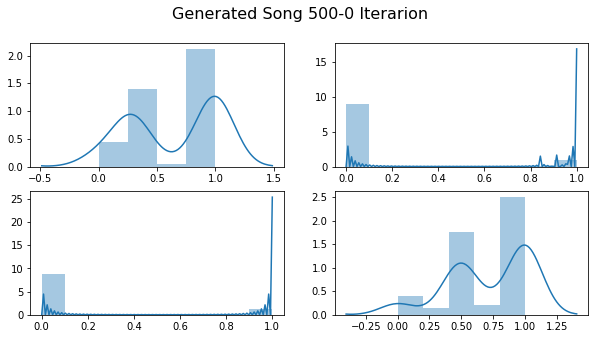

In [0]:
gen_song_500_deep_gen_complex_discr = crnngan_minmax_deep_gen_complex_discr.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_deep_gen_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_deep_gen_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_deep_gen_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_deep_gen_complex_discr[:,3], ax=axs[1, 1])

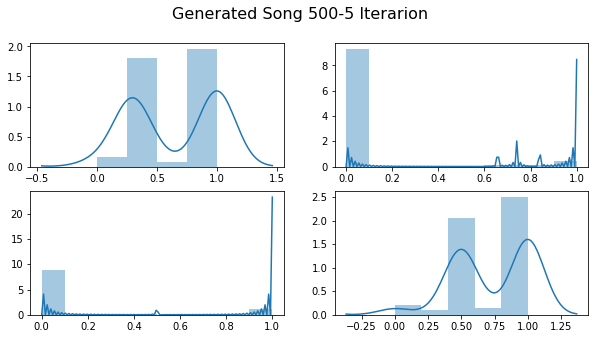

In [0]:
gen_song_500_5_deep_gen_complex_discr = crnngan_minmax_deep_gen_complex_discr.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_deep_gen_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_deep_gen_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_deep_gen_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_deep_gen_complex_discr[:,3], ax=axs[1, 1])

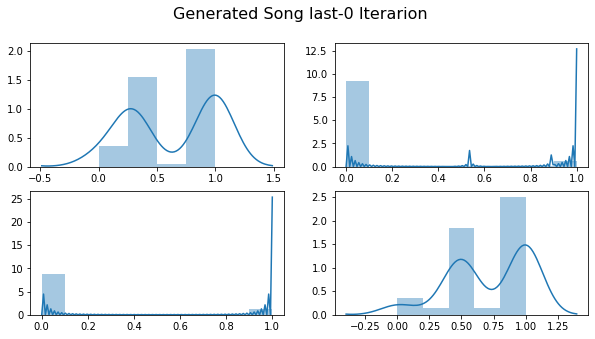

In [0]:
gen_song_last_deep_gen_complex_discr = crnngan_minmax_deep_gen_complex_discr.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_deep_gen_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_deep_gen_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_deep_gen_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_deep_gen_complex_discr[:,3], ax=axs[1, 1])

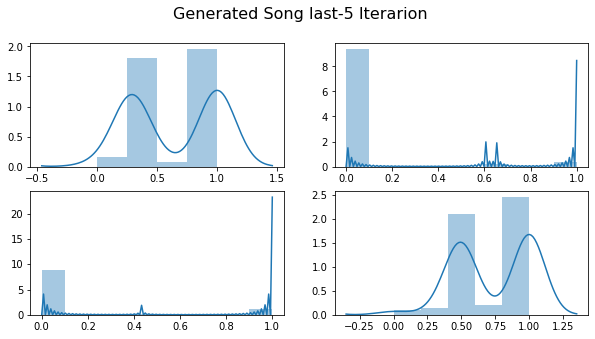

In [0]:
gen_song_last_5_deep_gen_complex_discr = crnngan_minmax_deep_gen_complex_discr.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_deep_gen_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_deep_gen_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_deep_gen_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_deep_gen_complex_discr[:,3], ax=axs[1, 1])

These ones might be good. Let's save them!

In [0]:
gen_song_250_deep_gen_complex_discr_unscaled = crnngan.unscale(gen_song_250_deep_gen_complex_discr, min_percentile, max_percentile)
gen_song_250_5_deep_gen_complex_discr_unscaled = crnngan.unscale(gen_song_250_5_deep_gen_complex_discr, min_percentile, max_percentile)
gen_song_500_deep_gen_complex_discr_unscaled = crnngan.unscale(gen_song_500_deep_gen_complex_discr, min_percentile, max_percentile)
gen_song_500_5_deep_gen_complex_discr_unscaled = crnngan.unscale(gen_song_500_5_deep_gen_complex_discr, min_percentile, max_percentile)
gen_song_last_deep_gen_complex_discr_unscaled = crnngan.unscale(gen_song_last_deep_gen_complex_discr, min_percentile, max_percentile)
gen_song_last_5_deep_gen_complex_discr_unscaled = crnngan.unscale(gen_song_last_5_deep_gen_complex_discr, min_percentile, max_percentile)

In [0]:
save_path = './drive/My Drive/TFM/deep_gen_complex_discr_unscaled_minmax'
musicDataLoader.save_data(save_path+'/gen_song_250_deep_gen_complex_discr_unscaled.midi', gen_song_250_deep_gen_complex_discr_unscaled)
musicDataLoader.save_data(save_path+'/gen_song_250_5_deep_gen_complex_discr_unscaled.midi', gen_song_250_5_deep_gen_complex_discr_unscaled)
musicDataLoader.save_data(save_path+'/gen_song_500_deep_gen_complex_discr_unscaled.midi', gen_song_500_deep_gen_complex_discr_unscaled)
musicDataLoader.save_data(save_path+'/gen_song_500_5_deep_gen_complex_discr_unscaled.midi', gen_song_500_5_deep_gen_complex_discr_unscaled)
musicDataLoader.save_data(save_path+'/gen_song_last_deep_gen_complex_discr_unscaled.midi', gen_song_last_deep_gen_complex_discr_unscaled)
musicDataLoader.save_data(save_path+'/gen_song_last_5_deep_gen_complex_discr_unscaled.midi', gen_song_last_5_deep_gen_complex_discr_unscaled)

midi.Pattern(format=1, resolution=384, tracks=\
[midi.Track(\
  [midi.SetTempoEvent(tick=0, data=[20, 88, 85]),
   midi.NoteOnEvent(tick=192, channel=0, data=[33, 126]),
   midi.NoteOffEvent(tick=22, channel=0, data=[33, 0]),
   midi.NoteOnEvent(tick=32, channel=0, data=[33, 73]),
   midi.NoteOffEvent(tick=22, channel=0, data=[33, 0]),
   midi.NoteOnEvent(tick=32, channel=0, data=[33, 73]),
   midi.NoteOffEvent(tick=22, channel=0, data=[33, 0]),
   midi.NoteOnEvent(tick=170, channel=0, data=[33, 126]),
   midi.NoteOffEvent(tick=22, channel=0, data=[33, 0]),
   midi.NoteOnEvent(tick=32, channel=0, data=[33, 73]),
   midi.NoteOffEvent(tick=22, channel=0, data=[33, 0]),
   midi.NoteOnEvent(tick=170, channel=0, data=[33, 126]),
   midi.NoteOffEvent(tick=22, channel=0, data=[33, 0]),
   midi.NoteOnEvent(tick=170, channel=0, data=[33, 126]),
   midi.NoteOffEvent(tick=22, channel=0, data=[33, 0]),
   midi.NoteOnEvent(tick=170, channel=0, data=[33, 126]),
   midi.NoteOffEvent(tick=22, channel=

#### Curriculum

In [0]:
# Data loader
batch_length = 100
sequence_length = 20
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 3
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 2
# General
epochs = 80
curriculum_learning = True
G_var_threshold = 1e-3
D_var_threshold = 1e-3
max_sequence_length = 200
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexDiscriminator = True

crnngan_minmax_deep_gen_curriculum_complex_discr = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 G_var_threshold=G_var_threshold, D_var_threshold=D_var_threshold,
                 max_sequence_length=max_sequence_length,
                 complexDiscriminator=complexDiscriminator)

cuda
Complex Discriminator


In [0]:
crnngan_minmax_deep_gen_curriculum_complex_discr.trainloop(musicDataLoader)

Start training for 80 epochs
[0/80][0]	Loss_D: 5.9914	Loss_G: 7.2941	D(x): -2.9940	D(G(z)): -2.9945 / -0.0000
 Time since epoch started: 0.05
There are a total of 0 fake songs saved already
[0/80][10]	Loss_D: 3.9656	Loss_G: 1.7764	D(x): -1.2365	D(G(z)): -1.2377 / -0.2766
 Time since epoch started: 0.48
There are a total of 5 fake songs saved already
[0/80][20]	Loss_D: 3.4810	Loss_G: 1.6205	D(x): -0.1903	D(G(z)): -0.1915 / -0.9806
 Time since epoch started: 0.91
There are a total of 10 fake songs saved already
Epoch time: 1.12
[1/80][30]	Loss_D: 2.8232	Loss_G: 1.7771	D(x): -1.0595	D(G(z)): -1.0637 / -0.0764
 Time since epoch started: 0.21
There are a total of 15 fake songs saved already
[1/80][40]	Loss_D: 3.5098	Loss_G: 1.4426	D(x): -1.2267	D(G(z)): -1.2262 / -0.1514
 Time since epoch started: 0.63
There are a total of 20 fake songs saved already
[1/80][50]	Loss_D: 3.3063	Loss_G: 1.8848	D(x): -0.9889	D(G(z)): -0.9885 / -0.0388
 Time since epoch started: 1.05
There are a total of 25 fake

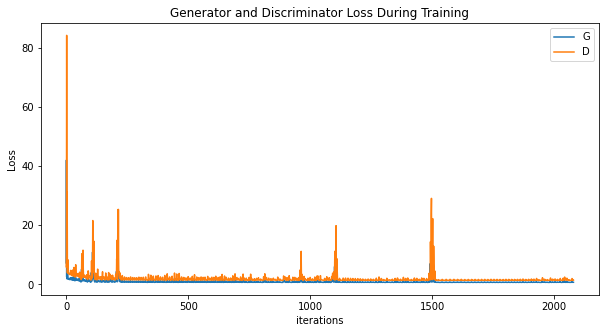

In [0]:
crnngan_minmax_deep_gen_curriculum_complex_discr.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

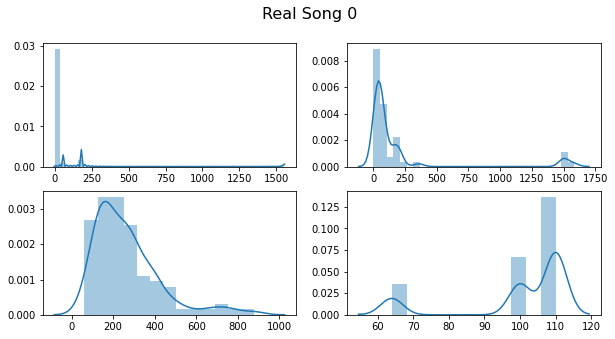

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

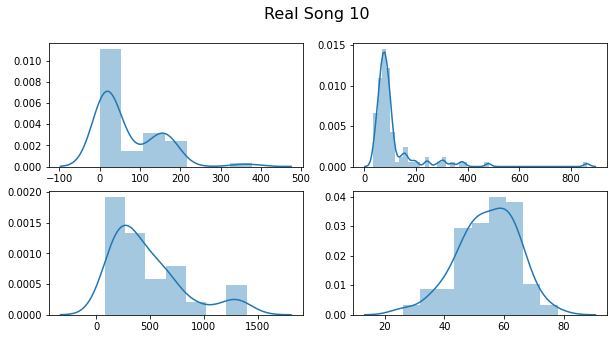

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


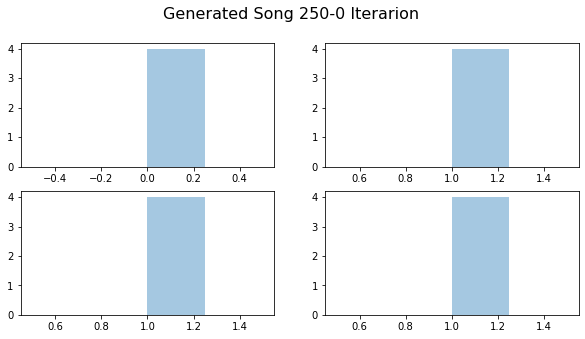

In [0]:
gen_song_250_deep_gen_curriculum_complex_discr = crnngan_minmax_deep_gen_curriculum_complex_discr.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_deep_gen_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_deep_gen_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_deep_gen_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_deep_gen_curriculum_complex_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


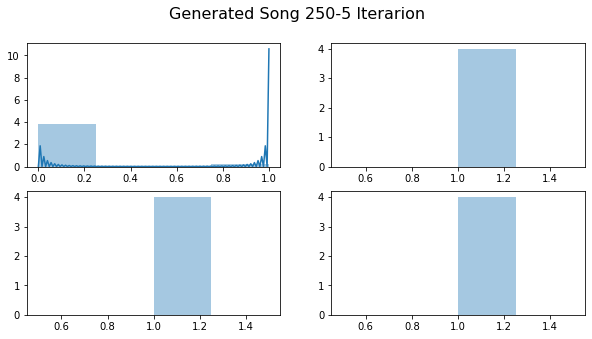

In [0]:
gen_song_250_5_deep_gen_curriculum_complex_discr = crnngan_minmax_deep_gen_curriculum_complex_discr.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_deep_gen_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_deep_gen_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_deep_gen_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_deep_gen_curriculum_complex_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


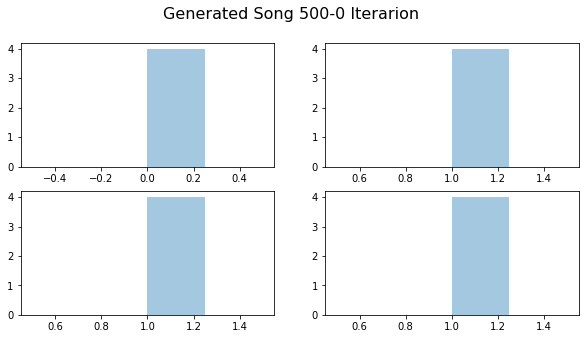

In [0]:
gen_song_500_deep_gen_curriculum_complex_discr = crnngan_minmax_deep_gen_curriculum_complex_discr.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_deep_gen_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_deep_gen_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_deep_gen_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_deep_gen_curriculum_complex_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


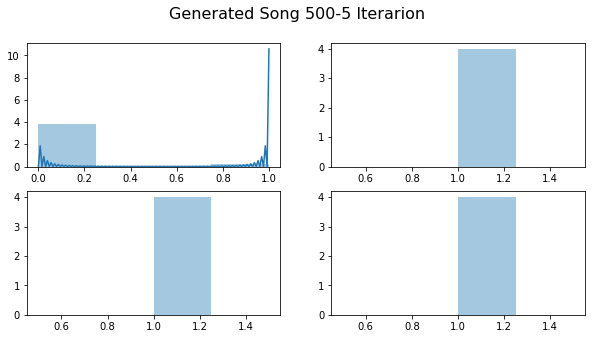

In [0]:
gen_song_500_5_deep_gen_curriculum_complex_discr = crnngan_minmax_deep_gen_curriculum_complex_discr.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_deep_gen_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_deep_gen_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_deep_gen_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_deep_gen_curriculum_complex_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


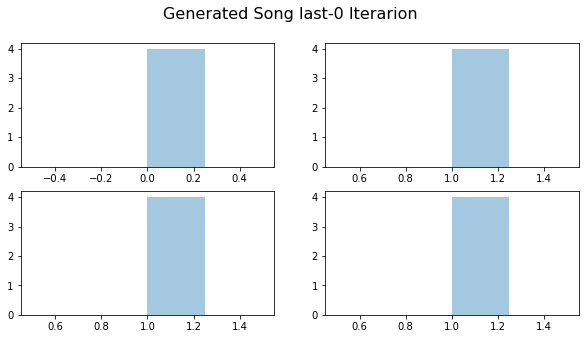

In [0]:
gen_song_last_deep_gen_curriculum_complex_discr = crnngan_minmax_deep_gen_curriculum_complex_discr.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_deep_gen_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_deep_gen_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_deep_gen_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_deep_gen_curriculum_complex_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


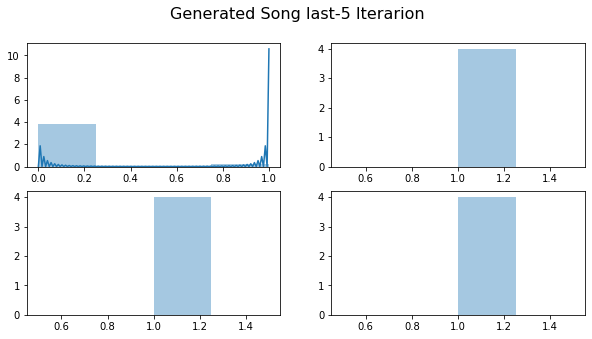

In [0]:
gen_song_last_5_deep_gen_curriculum_complex_discr = crnngan_minmax_deep_gen_curriculum_complex_discr.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_deep_gen_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_deep_gen_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_deep_gen_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_deep_gen_curriculum_complex_discr[:,3], ax=axs[1, 1])

### Complex Discriminator (3 layers deep discriminator)

#### No Curriculum

In [0]:
# Data loader
batch_length = 100
sequence_length = 100
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 50
curriculum_learning = False
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexDiscriminator = True


crnngan_minmax_deep_discr_complex_discr = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 complexDiscriminator=complexDiscriminator)

cuda
Complex Discriminator


In [89]:
crnngan_minmax_deep_discr_complex_discr.trainloop(musicDataLoader)

Start training for 50 epochs
[0/50][0]	Loss_D: 9.2103	Loss_G: 2.6293	D(x): -4.6030	D(G(z)): -4.6028 / -0.8919
 Time since epoch started: 0.21
There are a total of 0 fake songs saved already
[0/50][10]	Loss_D: 8.4655	Loss_G: 3.6043	D(x): -2.3799	D(G(z)): -2.3799 / -0.0362
 Time since epoch started: 2.00
There are a total of 5 fake songs saved already
[0/50][20]	Loss_D: 2.5734	Loss_G: 1.8779	D(x): -0.9227	D(G(z)): -0.9227 / -0.0430
 Time since epoch started: 3.79
There are a total of 10 fake songs saved already
Epoch time: 4.69
[1/50][30]	Loss_D: 3.1691	Loss_G: 1.5605	D(x): -1.2748	D(G(z)): -1.2748 / -0.0701
 Time since epoch started: 0.92
There are a total of 15 fake songs saved already
[1/50][40]	Loss_D: 18.4762	Loss_G: 5.7063	D(x): -0.0941	D(G(z)): -0.0941 / -0.0000
 Time since epoch started: 2.71
There are a total of 20 fake songs saved already
[1/50][50]	Loss_D: 2.5040	Loss_G: 0.7963	D(x): -1.0790	D(G(z)): -1.0790 / -0.5602
 Time since epoch started: 4.47
There are a total of 25 fak

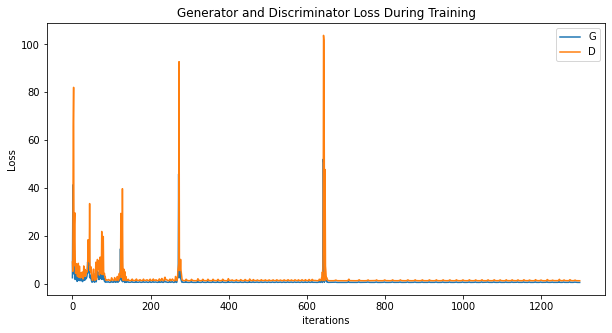

In [91]:
crnngan_minmax_deep_discr_complex_discr.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

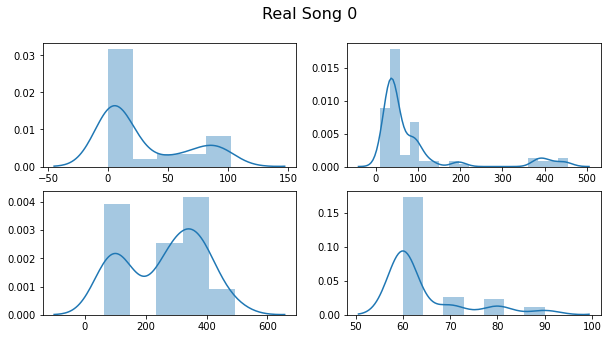

In [93]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

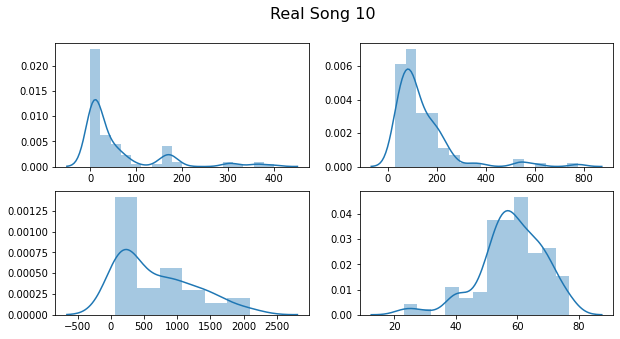

In [94]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

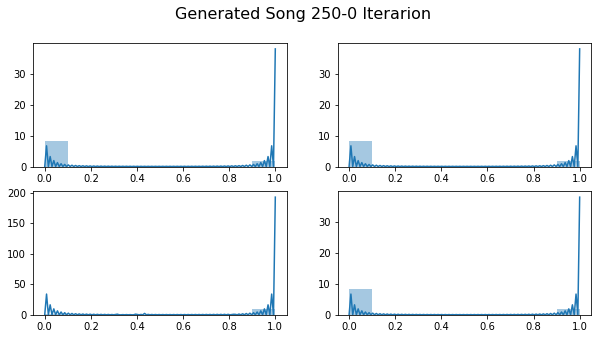

In [95]:
gen_song_250_deep_discr_complex_discr = crnngan_minmax_deep_discr_complex_discr.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_deep_discr_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_deep_discr_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_deep_discr_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_deep_discr_complex_discr[:,3], ax=axs[1, 1])

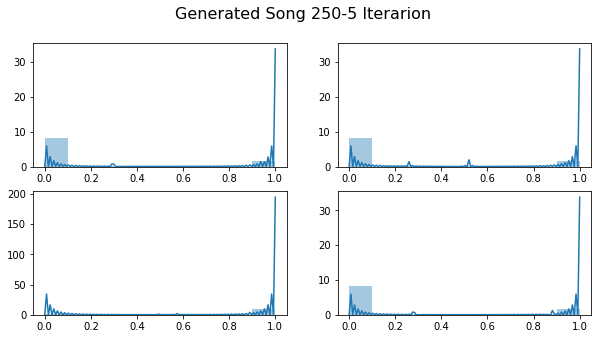

In [96]:
gen_song_250_5_deep_discr_complex_discr = crnngan_minmax_deep_discr_complex_discr.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_deep_discr_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_deep_discr_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_deep_discr_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_deep_discr_complex_discr[:,3], ax=axs[1, 1])

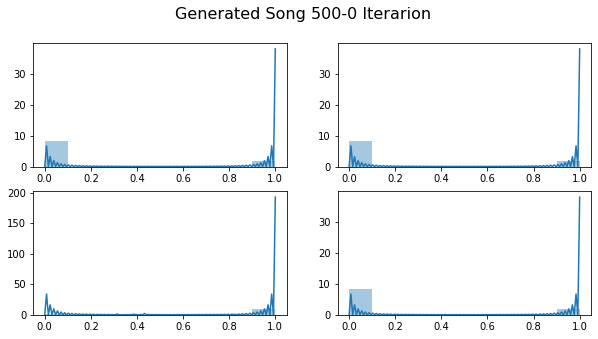

In [97]:
gen_song_500_deep__complex_discr = crnngan_minmax_deep_discr_complex_discr.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_deep__complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_deep__complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_deep__complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_deep__complex_discr[:,3], ax=axs[1, 1])

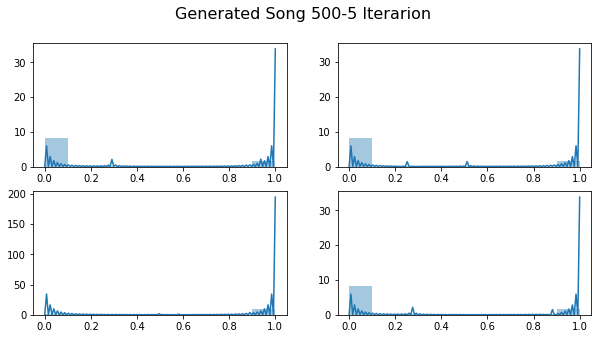

In [102]:
gen_song_500_5_deep_discr_complex_discr = crnngan_minmax_deep_discr_complex_discr.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_deep_discr_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_deep_discr_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_deep_discr_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_deep_discr_complex_discr[:,3], ax=axs[1, 1])

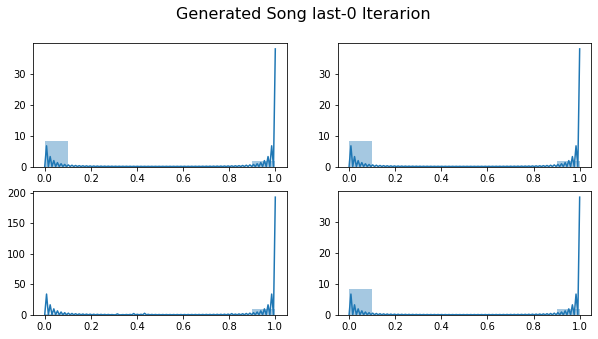

In [103]:
gen_song_last_deep_discr_complex_discr = crnngan_minmax_deep_discr_complex_discr.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_deep_discr_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_deep_discr_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_deep_discr_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_deep_discr_complex_discr[:,3], ax=axs[1, 1])

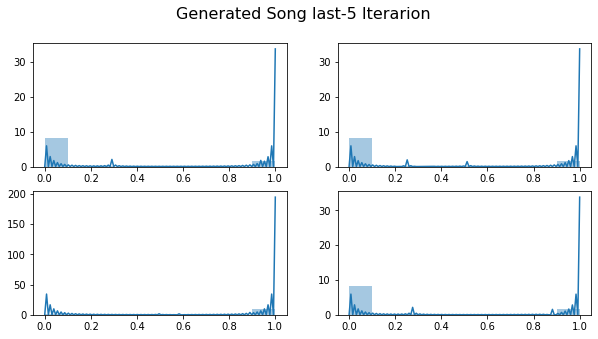

In [104]:
gen_song_last_5_deep_discr_complex_discr = crnngan_minmax_deep_discr_complex_discr.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_deep_discr_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_deep_discr_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_deep_discr_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_deep_discr_complex_discr[:,3], ax=axs[1, 1])

These ones might be good. Let's save them!

#### Curriculum

In [105]:
# Data loader
batch_length = 100
sequence_length = 20
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 80
curriculum_learning = True
G_var_threshold = 1e-3
D_var_threshold = 1e-3
max_sequence_length = 200
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexDiscriminator = True

crnngan_minmax_deep_discr_curriculum_complex_discr = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 G_var_threshold=G_var_threshold, D_var_threshold=D_var_threshold,
                 max_sequence_length=max_sequence_length,
                 complexDiscriminator=complexDiscriminator)

cuda
Complex Discriminator


In [106]:
crnngan_minmax_deep_discr_curriculum_complex_discr.trainloop(musicDataLoader)

Start training for 80 epochs
[0/80][0]	Loss_D: 5.9931	Loss_G: 3.0445	D(x): -2.9947	D(G(z)): -2.9948 / -0.0105
 Time since epoch started: 0.06
There are a total of 0 fake songs saved already
[0/80][10]	Loss_D: 4.1253	Loss_G: 3.3514	D(x): -0.2211	D(G(z)): -0.2211 / -2.9485
 Time since epoch started: 0.53
There are a total of 5 fake songs saved already
[0/80][20]	Loss_D: 3.5510	Loss_G: 1.7538	D(x): -0.6552	D(G(z)): -0.6552 / -0.4288
 Time since epoch started: 1.00
There are a total of 10 fake songs saved already
Epoch time: 1.23
[1/80][30]	Loss_D: 3.3677	Loss_G: 1.6276	D(x): -0.3432	D(G(z)): -0.3432 / -0.7416
 Time since epoch started: 0.23
There are a total of 15 fake songs saved already
[1/80][40]	Loss_D: 3.5608	Loss_G: 2.5479	D(x): -0.1070	D(G(z)): -0.1070 / -1.8708
 Time since epoch started: 0.69
There are a total of 20 fake songs saved already
[1/80][50]	Loss_D: 5.8511	Loss_G: 1.5682	D(x): -1.3866	D(G(z)): -1.3866 / -0.1397
 Time since epoch started: 1.16
There are a total of 25 fake

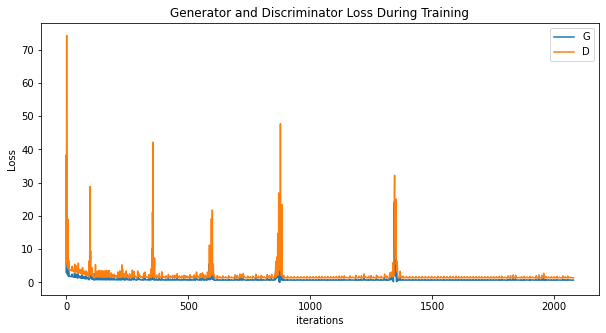

In [107]:
crnngan_minmax_deep_discr_curriculum_complex_discr.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

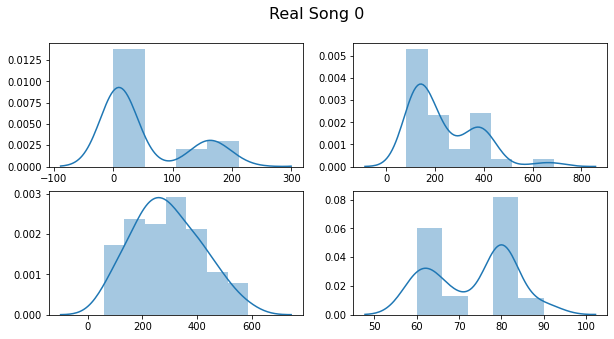

In [109]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

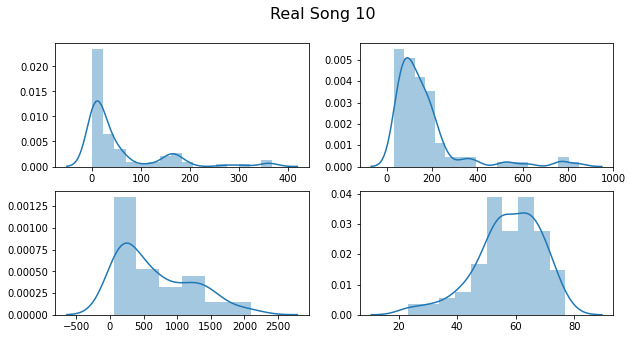

In [110]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

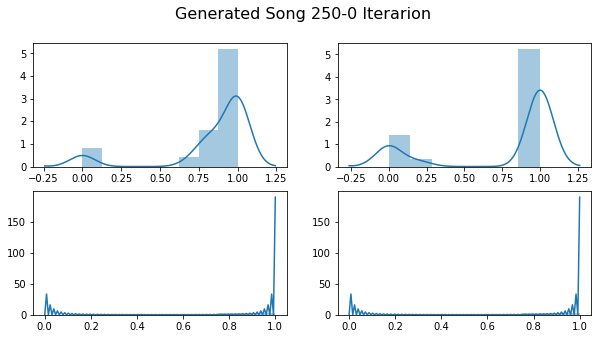

In [111]:
gen_song_250_deep_discr_curriculum_complex_discr = crnngan_minmax_deep_discr_curriculum_complex_discr.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_deep_discr_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_deep_discr_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_deep_discr_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_deep_discr_curriculum_complex_discr[:,3], ax=axs[1, 1])

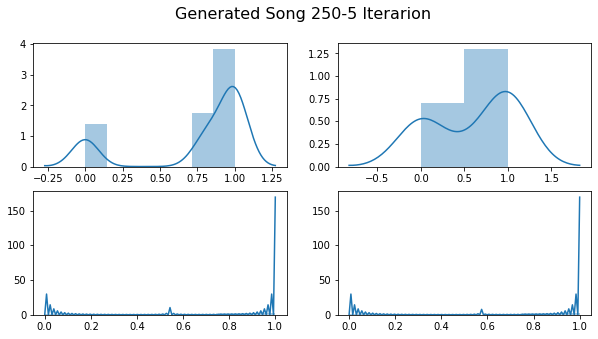

In [112]:
gen_song_250_5_deep_discr_curriculum_complex_discr = crnngan_minmax_deep_discr_curriculum_complex_discr.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_deep_discr_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_deep_discr_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_deep_discr_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_deep_discr_curriculum_complex_discr[:,3], ax=axs[1, 1])

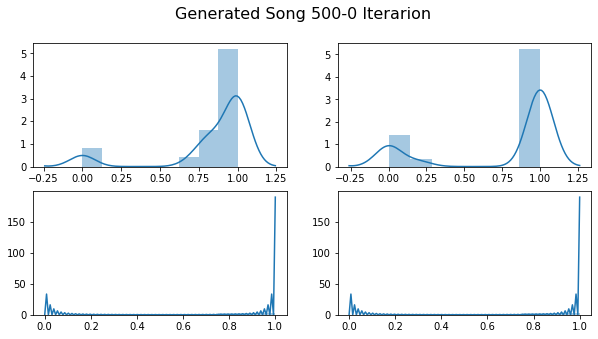

In [113]:
gen_song_500_deep_discr_curriculum_complex_discr = crnngan_minmax_deep_discr_curriculum_complex_discr.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_deep_discr_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_deep_discr_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_deep_discr_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_deep_discr_curriculum_complex_discr[:,3], ax=axs[1, 1])

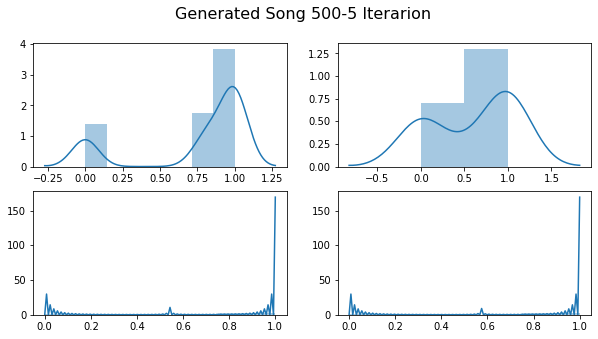

In [114]:
gen_song_500_5_deep_discr_curriculum_complex_discr = crnngan_minmax_deep_discr_curriculum_complex_discr.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_deep_discr_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_deep_discr_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_deep_discr_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_deep_discr_curriculum_complex_discr[:,3], ax=axs[1, 1])

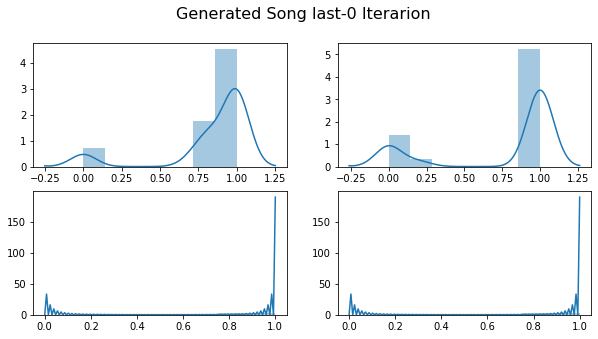

In [115]:
gen_song_last_deep_discr_curriculum_complex_discr = crnngan_minmax_deep_discr_curriculum_complex_discr.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_deep_discr_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_deep_discr_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_deep_discr_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_deep_discr_curriculum_complex_discr[:,3], ax=axs[1, 1])

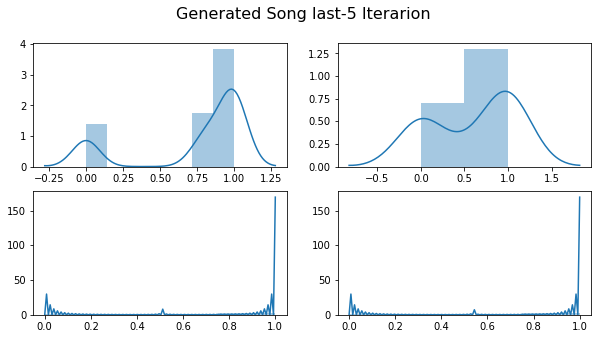

In [116]:
gen_song_last_5_deep_discr_curriculum_complex_discr = crnngan_minmax_deep_discr_curriculum_complex_discr.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_deep_discr_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_deep_discr_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_deep_discr_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_deep_discr_curriculum_complex_discr[:,3], ax=axs[1, 1])

In [0]:
gen_song_250_deep_discr_curriculum_complex_discr_unscaled = crnngan.unscale(gen_song_250_deep_discr_curriculum_complex_discr, min_percentile, max_percentile)
gen_song_250_5_deep_discr_curriculum_complex_discr_unscaled = crnngan.unscale(gen_song_250_5_deep_discr_curriculum_complex_discr, min_percentile, max_percentile)
gen_song_500_deep_discr_curriculum_complex_discr_unscaled = crnngan.unscale(gen_song_500_deep_discr_curriculum_complex_discr, min_percentile, max_percentile)
gen_song_500_5_deep_discr_curriculum_complex_discr_unscaled = crnngan.unscale(gen_song_500_5_deep_discr_curriculum_complex_discr, min_percentile, max_percentile)
gen_song_last_deep_discr_curriculum_complex_discr_unscaled = crnngan.unscale(gen_song_last_deep_discr_curriculum_complex_discr, min_percentile, max_percentile)
gen_song_last_5_deep_discr_curriculum_complex_discr_unscaled = crnngan.unscale(gen_song_last_5_deep_discr_curriculum_complex_discr, min_percentile, max_percentile)

In [118]:
save_path = './drive/My Drive/TFM/deep_gen_complex_curriculum_discr_unscaled_minmax'
musicDataLoader.save_data(save_path+'/gen_song_250_deep_discr_curriculum_complex_discr_unscaled.midi', gen_song_250_deep_discr_curriculum_complex_discr_unscaled)
musicDataLoader.save_data(save_path+'/gen_song_250_5_deep_discr_curriculum_complex_discr_unscaled.midi', gen_song_250_5_deep_discr_curriculum_complex_discr_unscaled)
musicDataLoader.save_data(save_path+'/gen_song_500_deep_discr_curriculum_complex_discr_unscaled.midi', gen_song_500_deep_discr_curriculum_complex_discr_unscaled)
musicDataLoader.save_data(save_path+'/gen_song_500_5_deep_discr_curriculum_complex_discr_unscaled.midi', gen_song_500_5_deep_discr_curriculum_complex_discr_unscaled)
musicDataLoader.save_data(save_path+'/gen_song_last_deep_discr_curriculum_complex_discr_unscaled.midi', gen_song_last_deep_discr_curriculum_complex_discr_unscaled)
musicDataLoader.save_data(save_path+'/gen_song_last_5_deep_discr_curriculum_complex_discr_unscaled.midi', gen_song_last_5_deep_discr_curriculum_complex_discr_unscaled)

midi.Pattern(format=1, resolution=384, tracks=\
[midi.Track(\
  [midi.SetTempoEvent(tick=0, data=[20, 88, 85]),
   midi.NoteOnEvent(tick=187, channel=0, data=[78, 126]),
   midi.NoteOnEvent(tick=0, channel=0, data=[68, 79]),
   midi.NoteOnEvent(tick=0, channel=0, data=[33, 22]),
   midi.NoteOffEvent(tick=22, channel=0, data=[78, 0]),
   midi.NoteOffEvent(tick=0, channel=0, data=[33, 0]),
   midi.NoteOnEvent(tick=170, channel=0, data=[78, 126]),
   midi.NoteOnEvent(tick=157, channel=0, data=[78, 126]),
   midi.NoteOffEvent(tick=97, channel=0, data=[68, 0]),
   midi.NoteOnEvent(tick=95, channel=0, data=[78, 126]),
   midi.NoteOffEvent(tick=78, channel=0, data=[78, 0]),
   midi.NoteOffEvent(tick=61, channel=0, data=[78, 0]),
   midi.NoteOnEvent(tick=53, channel=0, data=[78, 126]),
   midi.NoteOnEvent(tick=0, channel=0, data=[33, 22]),
   midi.NoteOffEvent(tick=22, channel=0, data=[33, 0]),
   midi.NoteOnEvent(tick=170, channel=0, data=[78, 126]),
   midi.NoteOffEvent(tick=104, channel=0, 

### Complex Discriminator (3 layers deep both)

#### No Curriculum

In [119]:
# Data loader
batch_length = 100
sequence_length = 100
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 3
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 50
curriculum_learning = False
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexDiscriminator = True


crnngan_minmax_deep_complex_discr = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 complexDiscriminator=complexDiscriminator)

cuda
Complex Discriminator


In [120]:
crnngan_minmax_deep_complex_discr.trainloop(musicDataLoader)

Start training for 50 epochs
[0/50][0]	Loss_D: 9.2096	Loss_G: 4.4826	D(x): -4.6018	D(G(z)): -4.6019 / -0.0056
 Time since epoch started: 0.22
There are a total of 0 fake songs saved already
[0/50][10]	Loss_D: 5.3390	Loss_G: 3.7768	D(x): -0.1836	D(G(z)): -0.1836 / -3.6542
 Time since epoch started: 2.17
There are a total of 5 fake songs saved already
[0/50][20]	Loss_D: 4.7247	Loss_G: 2.5589	D(x): -1.0090	D(G(z)): -1.0090 / -0.1119
 Time since epoch started: 4.13
There are a total of 10 fake songs saved already
Epoch time: 5.14
[1/50][30]	Loss_D: 5.5880	Loss_G: 2.3750	D(x): -0.0382	D(G(z)): -0.0382 / -1.2872
 Time since epoch started: 0.99
There are a total of 15 fake songs saved already
[1/50][40]	Loss_D: 6.4154	Loss_G: 3.8676	D(x): -2.2230	D(G(z)): -2.2230 / -0.0012
 Time since epoch started: 2.93
There are a total of 20 fake songs saved already
[1/50][50]	Loss_D: 7.5146	Loss_G: 1.8232	D(x): -0.0009	D(G(z)): -0.0009 / -1.6815
 Time since epoch started: 4.88
There are a total of 25 fake

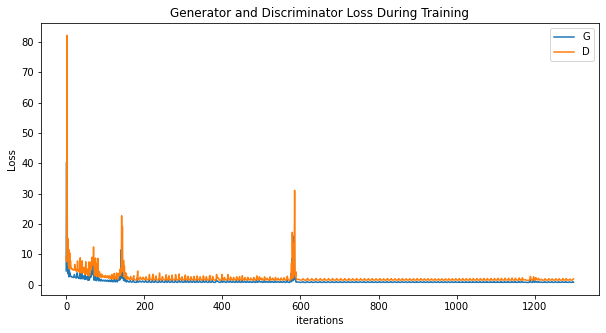

In [121]:
crnngan_minmax_deep_complex_discr.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

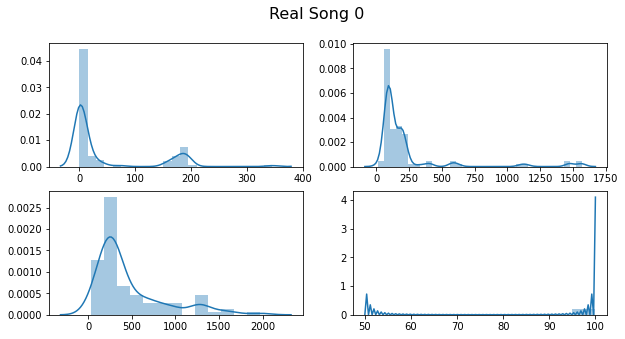

In [123]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

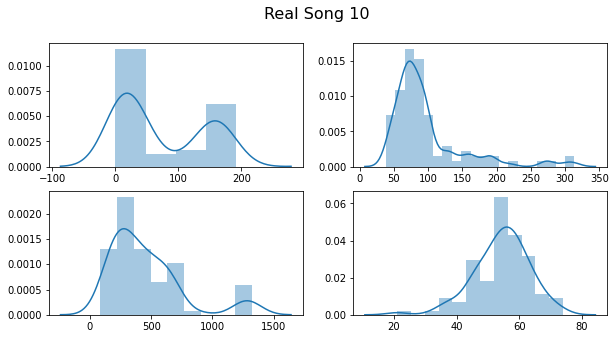

In [124]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


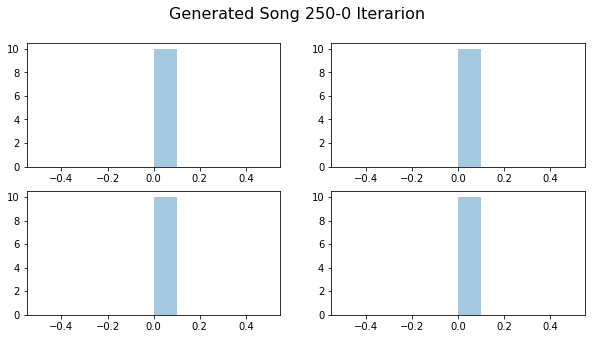

In [125]:
gen_song_250_deep_complex_discr = crnngan_minmax_deep_complex_discr.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_deep_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_deep_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_deep_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_deep_complex_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


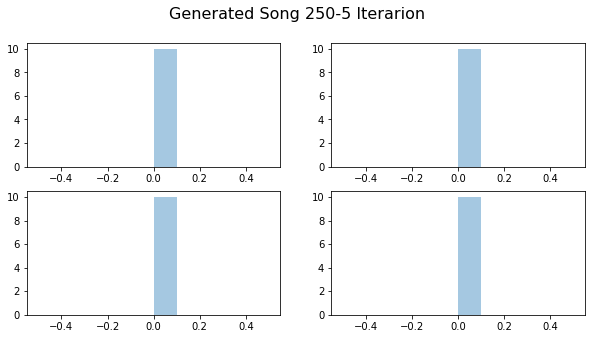

In [126]:
gen_song_250_5_deep_complex_discr = crnngan_minmax_deep_complex_discr.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_deep_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_deep_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_deep_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_deep_complex_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


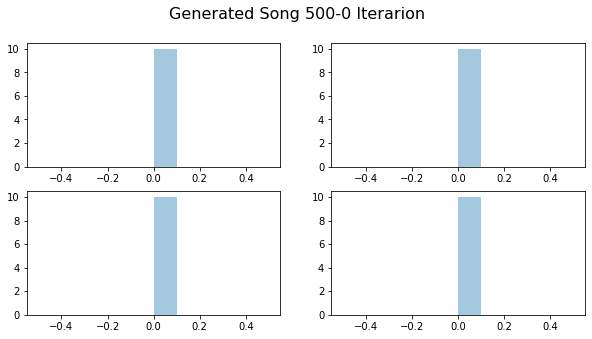

In [127]:
gen_song_500_deep_complex_discr = crnngan_minmax_deep_complex_discr.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_deep_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_deep_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_deep_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_deep_complex_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


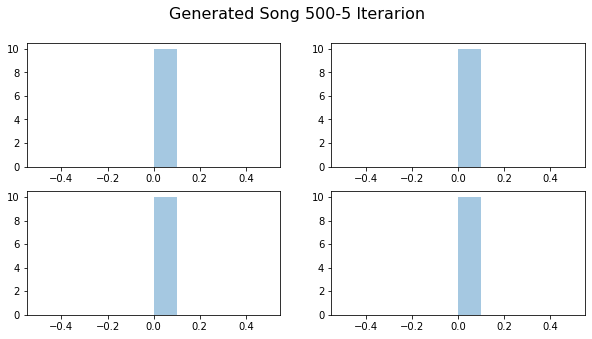

In [128]:
gen_song_500_5_deep_complex_discr = crnngan_minmax_deep_complex_discr.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_deep_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_deep_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_deep_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_deep_complex_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


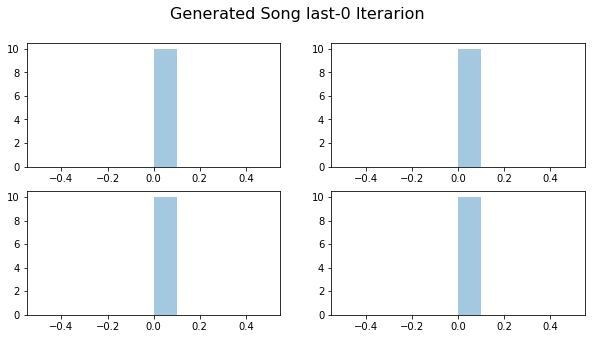

In [129]:
gen_song_last_deep_complex_discr = crnngan_minmax_deep_complex_discr.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_deep_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_deep_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_deep_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_deep_complex_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


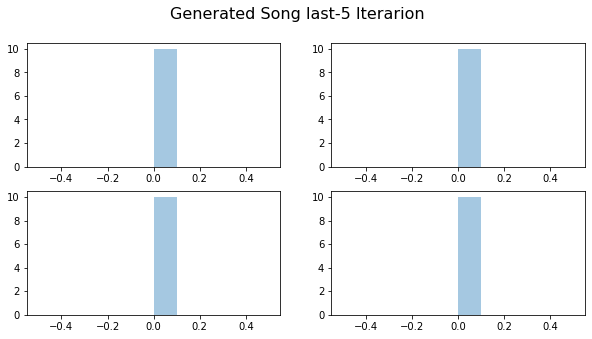

In [130]:
gen_song_last_5_deep_complex_discr = crnngan_minmax_deep_complex_discr.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_deep_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_deep_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_deep_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_deep_complex_discr[:,3], ax=axs[1, 1])

#### Curriculum

In [131]:
# Data loader
batch_length = 100
sequence_length = 20
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 3
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 80
curriculum_learning = True
G_var_threshold = 1e-3
D_var_threshold = 1e-3
max_sequence_length = 200
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexDiscriminator = True

crnngan_minmax_deep_curriculum_complex_discr = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 G_var_threshold=G_var_threshold, D_var_threshold=D_var_threshold,
                 max_sequence_length=max_sequence_length,
                 complexDiscriminator=complexDiscriminator)

cuda
Complex Discriminator


In [132]:
crnngan_minmax_deep_curriculum_complex_discr.trainloop(musicDataLoader)

Start training for 80 epochs
[0/80][0]	Loss_D: 5.9912	Loss_G: 6.2270	D(x): -2.9947	D(G(z)): -2.9948 / -0.0000
 Time since epoch started: 0.06
There are a total of 0 fake songs saved already
[0/80][10]	Loss_D: 4.0679	Loss_G: 2.2334	D(x): -0.1847	D(G(z)): -0.1847 / -1.7042
 Time since epoch started: 0.59
There are a total of 5 fake songs saved already
[0/80][20]	Loss_D: 4.8520	Loss_G: 2.0098	D(x): -0.0404	D(G(z)): -0.0404 / -1.5437
 Time since epoch started: 1.11
There are a total of 10 fake songs saved already
Epoch time: 1.37
[1/80][30]	Loss_D: 3.2764	Loss_G: 1.7239	D(x): -0.3361	D(G(z)): -0.3361 / -1.2342
 Time since epoch started: 0.26
There are a total of 15 fake songs saved already
[1/80][40]	Loss_D: 6.8853	Loss_G: 1.5569	D(x): -1.7694	D(G(z)): -1.7694 / -0.3204
 Time since epoch started: 0.77
There are a total of 20 fake songs saved already
[1/80][50]	Loss_D: 3.0753	Loss_G: 1.3627	D(x): -0.2683	D(G(z)): -0.2683 / -0.7591
 Time since epoch started: 1.28
There are a total of 25 fake

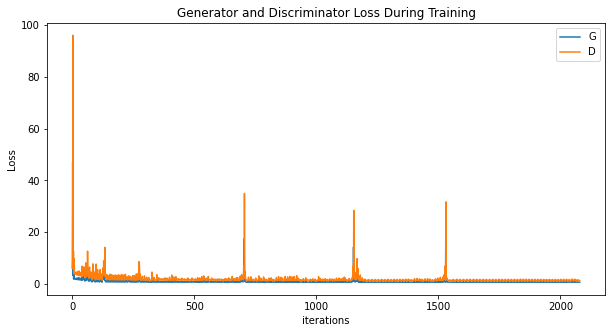

In [133]:
crnngan_minmax_deep_curriculum_complex_discr.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

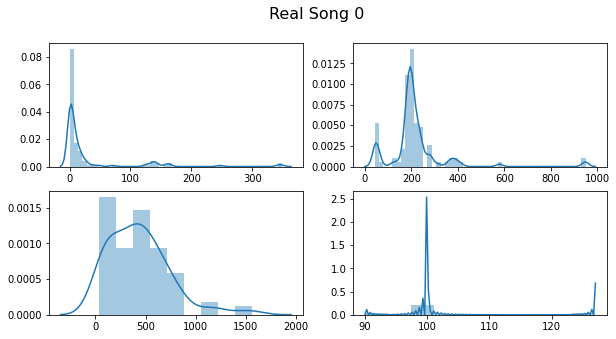

In [135]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

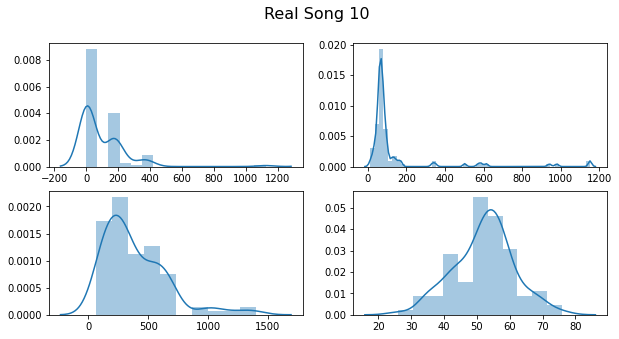

In [136]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


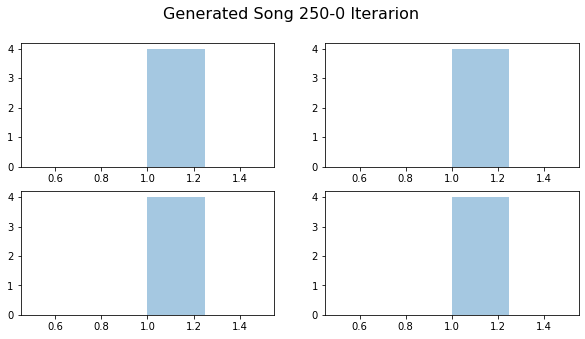

In [137]:
gen_song_250_deep_curriculum_complex_discr = crnngan_minmax_deep_curriculum_complex_discr.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_deep_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_deep_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_deep_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_deep_curriculum_complex_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


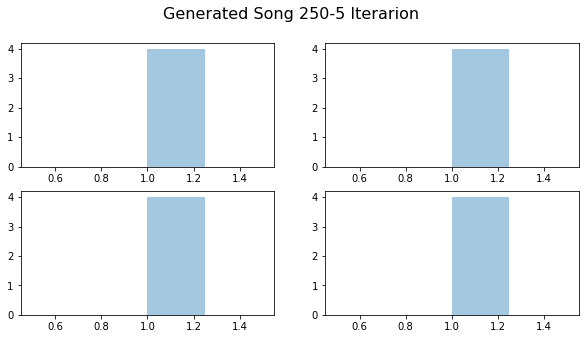

In [138]:
gen_song_250_5_deep_curriculum_complex_discr = crnngan_minmax_deep_curriculum_complex_discr.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_deep_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_deep_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_deep_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_deep_curriculum_complex_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


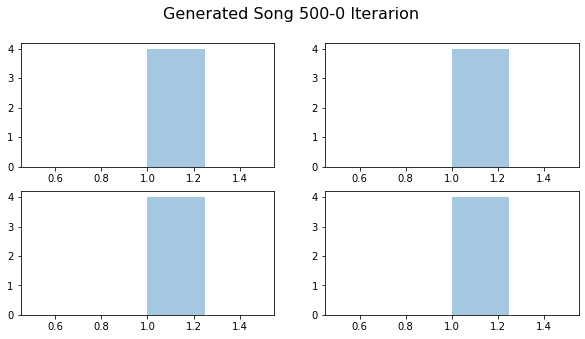

In [139]:
gen_song_500_deep_curriculum_complex_discr = crnngan_minmax_deep_curriculum_complex_discr.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_deep_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_deep_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_deep_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_deep_curriculum_complex_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


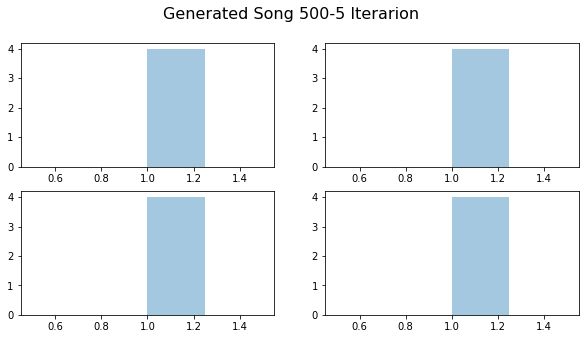

In [140]:
gen_song_500_5_deep_curriculum_complex_discr = crnngan_minmax_deep_curriculum_complex_discr.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_deep_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_deep_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_deep_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_deep_curriculum_complex_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


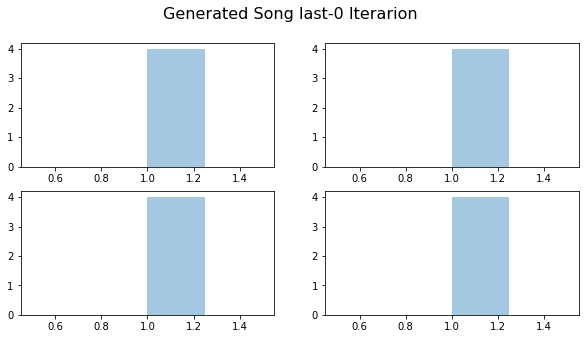

In [141]:
gen_song_last_deep_curriculum_complex_discr = crnngan_minmax_deep_curriculum_complex_discr.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_deep_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_deep_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_deep_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_deep_curriculum_complex_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


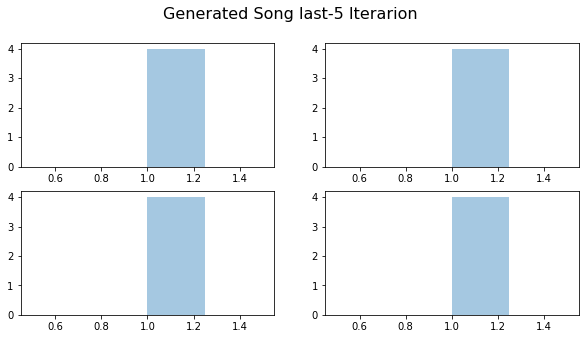

In [142]:
gen_song_last_5_deep_curriculum_complex_discr = crnngan_minmax_deep_curriculum_complex_discr.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_deep_curriculum_complex_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_deep_curriculum_complex_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_deep_curriculum_complex_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_deep_curriculum_complex_discr[:,3], ax=axs[1, 1])

All saturated...

### Complex Generator (2 layers deep both)

#### No Curriculum

In [143]:
# Data loader
batch_length = 100
sequence_length = 100
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 2
# General
epochs = 50
curriculum_learning = False
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True


crnngan_minmax_complex_gen = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 complexGenerator=complexGenerator)

cuda
Complex Generator


In [144]:
crnngan_minmax_complex_gen.trainloop(musicDataLoader)

Start training for 50 epochs
[0/50][0]	Loss_D: 9.2074	Loss_G: 6.1570	D(x): -4.6025	D(G(z)): -4.6021 / -0.0001
 Time since epoch started: 0.17
There are a total of 0 fake songs saved already
[0/50][10]	Loss_D: 1.5377	Loss_G: 0.7559	D(x): -0.5892	D(G(z)): -0.6138 / -0.6209
 Time since epoch started: 1.63
There are a total of 5 fake songs saved already
[0/50][20]	Loss_D: 1.3236	Loss_G: 0.5569	D(x): -0.5545	D(G(z)): -0.5842 / -0.5569
 Time since epoch started: 3.11
There are a total of 10 fake songs saved already
Epoch time: 3.83
[1/50][30]	Loss_D: 1.3039	Loss_G: 0.5904	D(x): -0.5430	D(G(z)): -0.4630 / -0.5904
 Time since epoch started: 0.72
There are a total of 15 fake songs saved already
[1/50][40]	Loss_D: 1.0802	Loss_G: 1.1654	D(x): -0.3681	D(G(z)): -0.5213 / -0.4210
 Time since epoch started: 2.18
There are a total of 20 fake songs saved already
[1/50][50]	Loss_D: 1.1800	Loss_G: 1.9779	D(x): -0.3209	D(G(z)): -0.5647 / -0.1517
 Time since epoch started: 3.63
There are a total of 25 fake

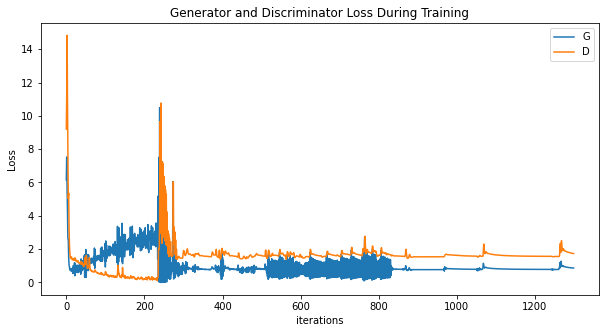

In [145]:
crnngan_minmax_complex_gen.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

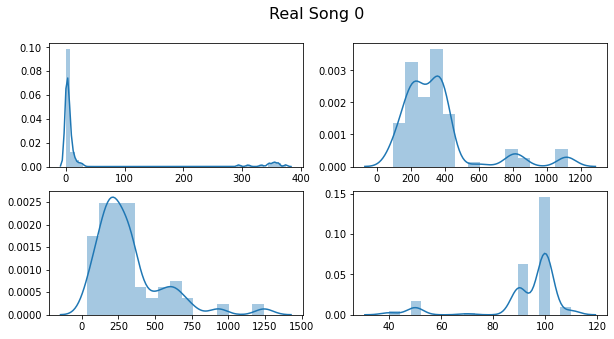

In [147]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

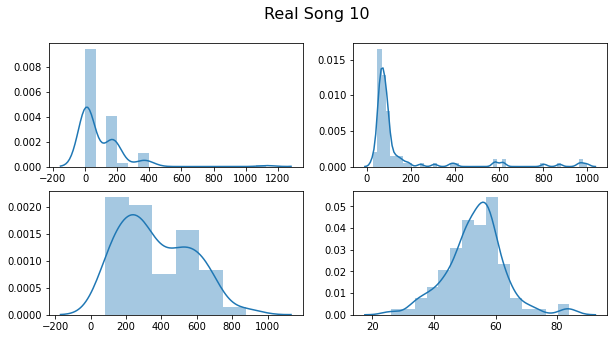

In [148]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


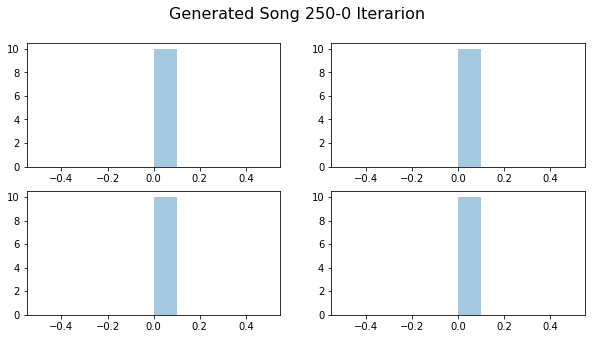

In [149]:
gen_song_250_complex_gen = crnngan_minmax_complex_gen.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


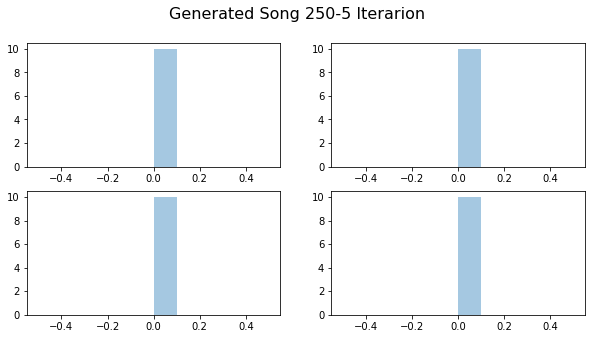

In [150]:
gen_song_250_5_complex_gen = crnngan_minmax_complex_gen.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


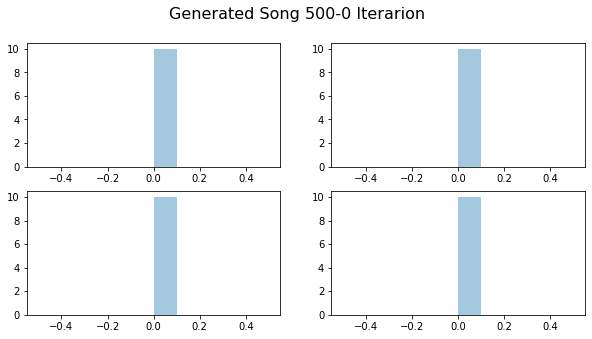

In [151]:
gen_song_500_complex_gen = crnngan_minmax_complex_gen.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


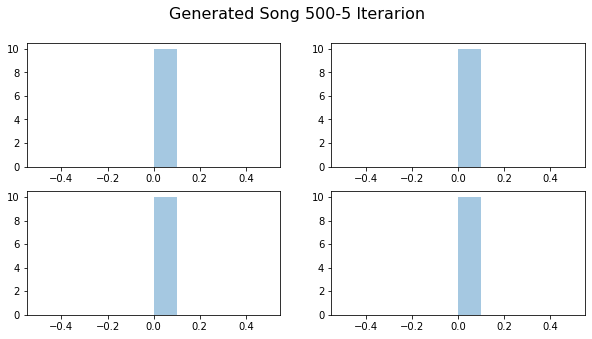

In [152]:
gen_song_500_5_complex_gen = crnngan_minmax_complex_gen.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


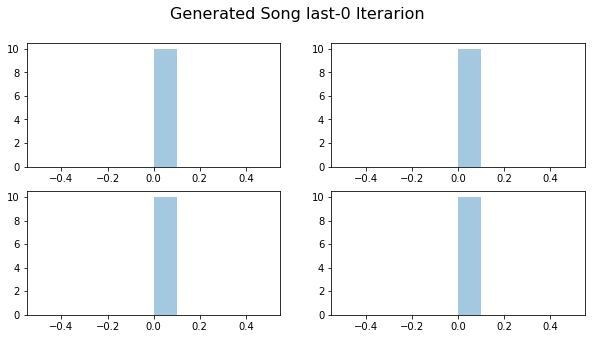

In [153]:
gen_song_last_gen = crnngan_minmax_complex_gen.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


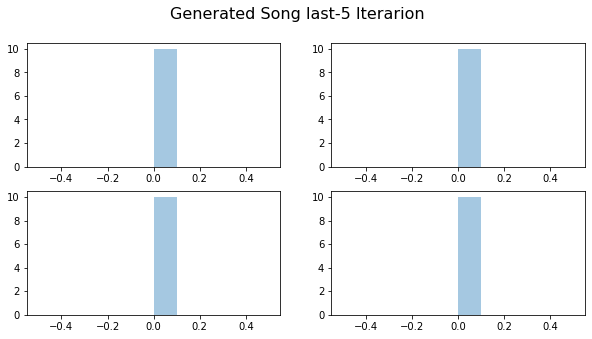

In [154]:
gen_song_last_5_complex_gen = crnngan_minmax_complex_gen.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_complex_gen[:,3], ax=axs[1, 1])

#### Curriculum

In [167]:
# Data loader
batch_length = 100
sequence_length = 20
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 2
# General
epochs = 80
curriculum_learning = True
G_var_threshold = 1e-3
D_var_threshold = 1e-3
max_sequence_length = 200
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True

crnngan_minmax_curriculum_complex_gen = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 G_var_threshold=G_var_threshold, D_var_threshold=D_var_threshold,
                 max_sequence_length=max_sequence_length,
                 complexGenerator=complexGenerator)

cuda
Complex Generator


In [168]:
crnngan_minmax_curriculum_complex_gen.trainloop(musicDataLoader)

Start training for 80 epochs
[0/80][0]	Loss_D: 5.9930	Loss_G: 5.5115	D(x): -2.9923	D(G(z)): -2.9928 / -0.0000
 Time since epoch started: 0.05
There are a total of 0 fake songs saved already
[0/80][10]	Loss_D: 3.2885	Loss_G: 1.5971	D(x): -0.6253	D(G(z)): -0.6246 / -0.5153
 Time since epoch started: 0.46
There are a total of 5 fake songs saved already
[0/80][20]	Loss_D: 2.2773	Loss_G: 1.1762	D(x): -0.5831	D(G(z)): -0.5827 / -0.6549
 Time since epoch started: 0.85
There are a total of 10 fake songs saved already
Epoch time: 1.04
[1/80][30]	Loss_D: 1.7624	Loss_G: 0.9264	D(x): -0.6184	D(G(z)): -0.6181 / -0.7122
 Time since epoch started: 0.19
There are a total of 15 fake songs saved already
[1/80][40]	Loss_D: 1.8121	Loss_G: 1.4573	D(x): -0.4442	D(G(z)): -0.4442 / -0.3944
 Time since epoch started: 0.58
There are a total of 20 fake songs saved already
[1/80][50]	Loss_D: 1.5622	Loss_G: 1.0932	D(x): -0.5149	D(G(z)): -0.5149 / -0.4874
 Time since epoch started: 0.98
There are a total of 25 fake

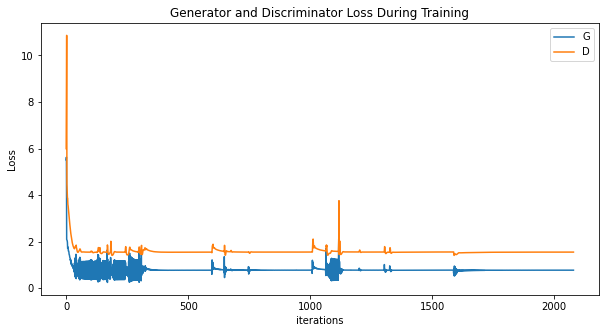

In [169]:
crnngan_minmax_curriculum_complex_gen.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

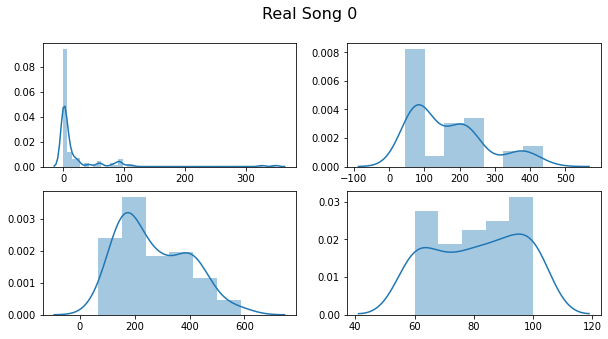

In [171]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

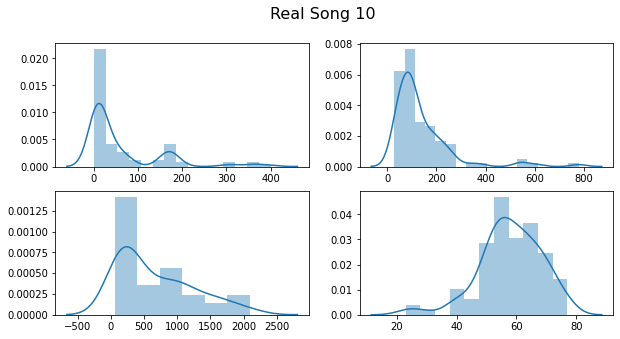

In [172]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


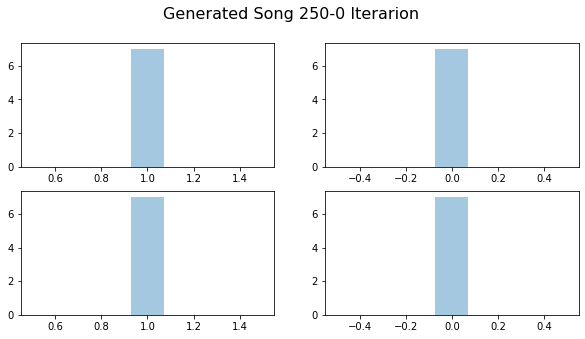

In [173]:
gen_song_250_curriculum_complex_gen = crnngan_minmax_curriculum_complex_gen.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_curriculum_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_curriculum_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_curriculum_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_curriculum_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


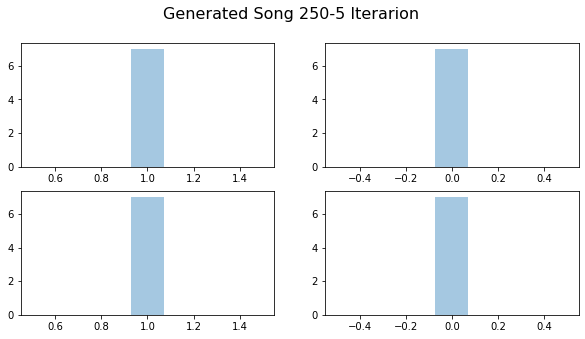

In [174]:
gen_song_250_5_curriculum_complex_gen = crnngan_minmax_curriculum_complex_gen.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_curriculum_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_curriculum_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_curriculum_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_curriculum_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


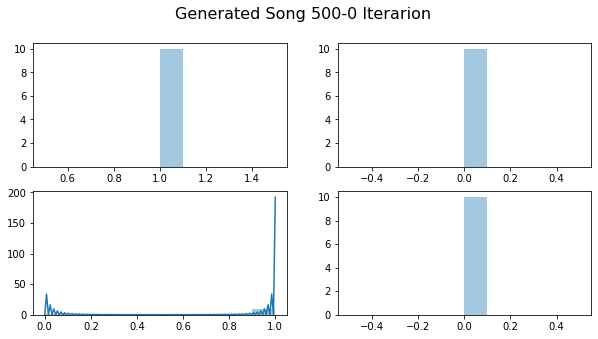

In [175]:
gen_song_500_curriculum_complex_gen = crnngan_minmax_curriculum_complex_gen.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_curriculum_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_curriculum_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_curriculum_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_curriculum_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


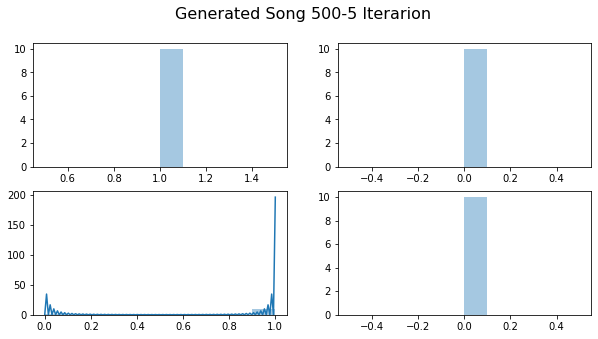

In [176]:
gen_song_500_5_curriculum_complex_gen = crnngan_minmax_curriculum_complex_gen.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_curriculum_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_curriculum_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_curriculum_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_curriculum_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


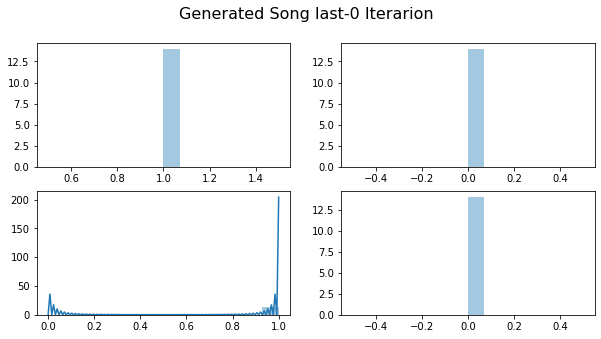

In [177]:
gen_song_last_curriculum_complex_gen = crnngan_minmax_curriculum_complex_gen.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_curriculum_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_curriculum_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_curriculum_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_curriculum_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


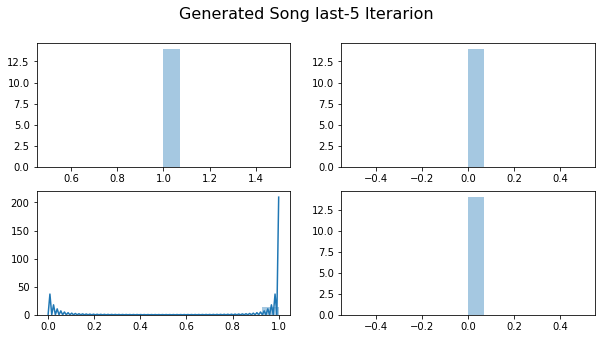

In [178]:
gen_song_last_5_curriculum_complex_gen = crnngan_minmax_curriculum_complex_gen.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_curriculum_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_curriculum_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_curriculum_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_curriculum_complex_gen[:,3], ax=axs[1, 1])

### Complex Generator (3 layers deep discriminator)

#### No Curriculum

In [179]:
# Data loader
batch_length = 100
sequence_length = 100
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 50
curriculum_learning = False
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True


crnngan_minmax_deep_discr_complex_gen = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 complexGenerator=complexGenerator)

cuda
Complex Generator


In [180]:
crnngan_minmax_deep_discr_complex_gen.trainloop(musicDataLoader)

Start training for 50 epochs
[0/50][0]	Loss_D: 9.1926	Loss_G: 2.5859	D(x): -4.5943	D(G(z)): -4.5947 / -0.6377
 Time since epoch started: 0.20
There are a total of 0 fake songs saved already
[0/50][10]	Loss_D: 10.3874	Loss_G: 2.1450	D(x): -0.0003	D(G(z)): -0.0004 / -0.0518
 Time since epoch started: 2.01
There are a total of 5 fake songs saved already
[0/50][20]	Loss_D: 1.6371	Loss_G: 1.1966	D(x): -0.3946	D(G(z)): -0.3946 / -0.2433
 Time since epoch started: 3.79
There are a total of 10 fake songs saved already
Epoch time: 4.68
[1/50][30]	Loss_D: 1.7971	Loss_G: 0.8553	D(x): -0.2449	D(G(z)): -0.2449 / -0.2555
 Time since epoch started: 0.90
There are a total of 15 fake songs saved already
[1/50][40]	Loss_D: 1.7755	Loss_G: 0.8812	D(x): -0.2504	D(G(z)): -0.2504 / -0.2483
 Time since epoch started: 2.70
There are a total of 20 fake songs saved already
[1/50][50]	Loss_D: 1.7688	Loss_G: 0.8793	D(x): -0.2515	D(G(z)): -0.2515 / -0.2491
 Time since epoch started: 4.52
There are a total of 25 fak

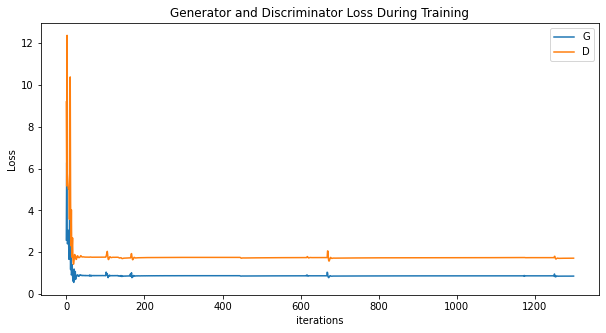

In [181]:
crnngan_minmax_deep_discr_complex_gen.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

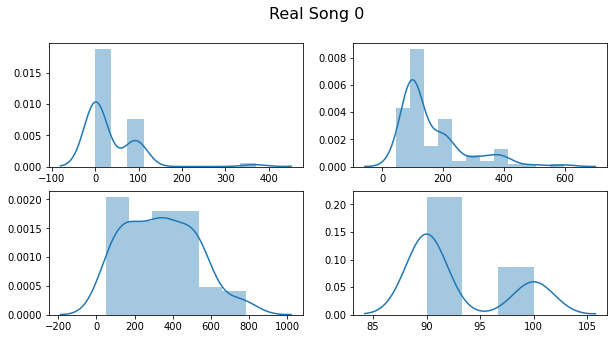

In [183]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

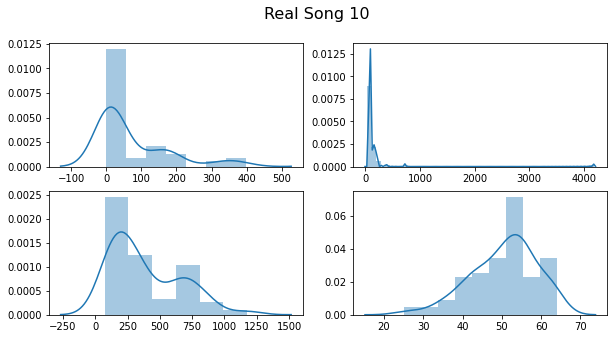

In [184]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


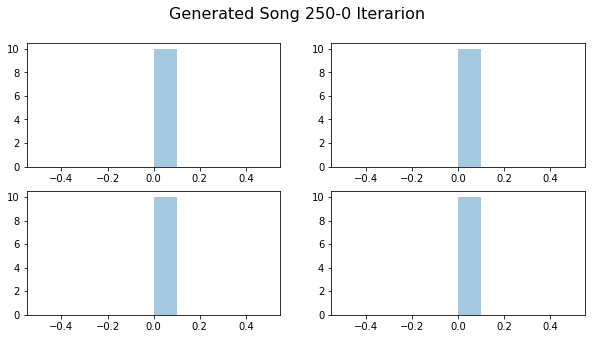

In [185]:
gen_song_250_deep_discr_complex_gen = crnngan_minmax_deep_discr_complex_gen.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_deep_discr_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_deep_discr_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_deep_discr_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_deep_discr_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


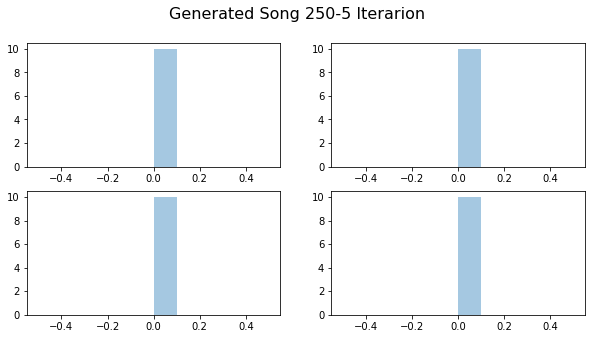

In [186]:
gen_song_250_5_deep_discr_complex_gen = crnngan_minmax_deep_discr_complex_gen.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_deep_discr_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_deep_discr_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_deep_discr_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_deep_discr_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


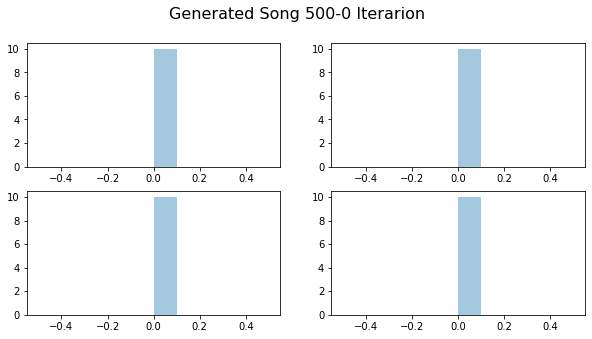

In [187]:
gen_song_500_deep_discr_complex_gen = crnngan_minmax_deep_discr_complex_gen.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_deep_discr_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_deep_discr_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_deep_discr_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_deep_discr_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


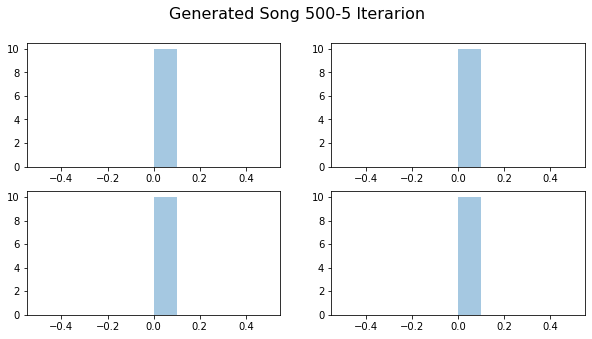

In [188]:
gen_song_500_5_deep_discr_complex_gen = crnngan_minmax_deep_discr_complex_gen.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_deep_discr_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_deep_discr_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_deep_discr_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_deep_discr_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


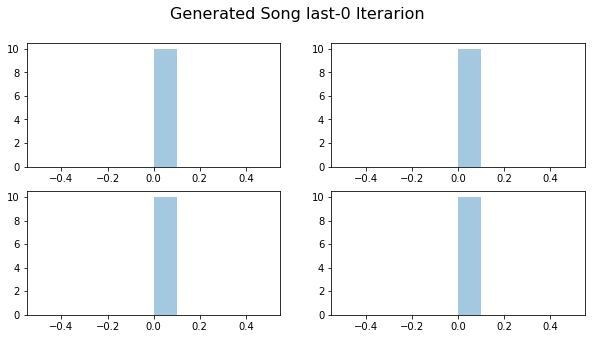

In [189]:
gen_song_last_deep_discr_complex_gen = crnngan_minmax_deep_discr_complex_gen.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_deep_discr_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_deep_discr_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_deep_discr_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_deep_discr_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


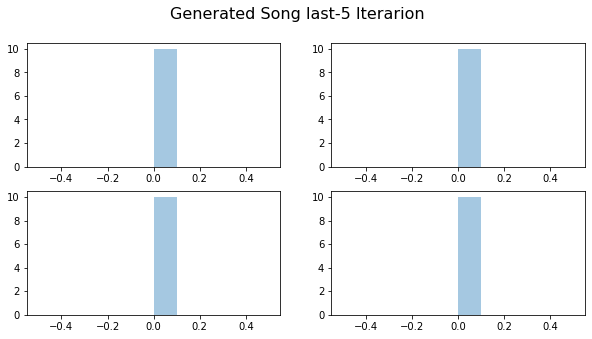

In [190]:
gen_song_last_5_deep_discr_complex_gen = crnngan_minmax_deep_discr_complex_gen.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_deep_discr_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_deep_discr_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_deep_discr_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_deep_discr_complex_gen[:,3], ax=axs[1, 1])

Again and again we keep on getting constant values...

#### Curriculum

In [191]:
# Data loader
batch_length = 100
sequence_length = 20
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 80
curriculum_learning = True
G_var_threshold = 1e-3
D_var_threshold = 1e-3
max_sequence_length = 200
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True

crnngan_minmax_curriculum_deep_discr_complex_gen = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 G_var_threshold=G_var_threshold, D_var_threshold=D_var_threshold,
                 max_sequence_length=max_sequence_length,
                 complexGenerator=complexGenerator)

cuda
Complex Generator


In [192]:
crnngan_minmax_curriculum_deep_discr_complex_gen.trainloop(musicDataLoader)

Start training for 80 epochs
[0/80][0]	Loss_D: 5.9800	Loss_G: 1.9659	D(x): -2.9892	D(G(z)): -2.9889 / -0.2605
 Time since epoch started: 0.06
There are a total of 0 fake songs saved already
[0/80][10]	Loss_D: 3.1251	Loss_G: 1.4880	D(x): -0.5499	D(G(z)): -0.5499 / -0.6437
 Time since epoch started: 0.53
There are a total of 5 fake songs saved already
[0/80][20]	Loss_D: 2.3905	Loss_G: 1.4483	D(x): -0.4988	D(G(z)): -0.4988 / -0.8821
 Time since epoch started: 0.98
There are a total of 10 fake songs saved already
Epoch time: 1.21
[1/80][30]	Loss_D: 1.9612	Loss_G: 1.2227	D(x): -0.7032	D(G(z)): -0.7032 / -0.6926
 Time since epoch started: 0.23
There are a total of 15 fake songs saved already
[1/80][40]	Loss_D: 1.7964	Loss_G: 1.2166	D(x): -0.5582	D(G(z)): -0.5582 / -0.5609
 Time since epoch started: 0.70
There are a total of 20 fake songs saved already
[1/80][50]	Loss_D: 1.6939	Loss_G: 1.1387	D(x): -0.5223	D(G(z)): -0.5223 / -0.5318
 Time since epoch started: 1.15
There are a total of 25 fake

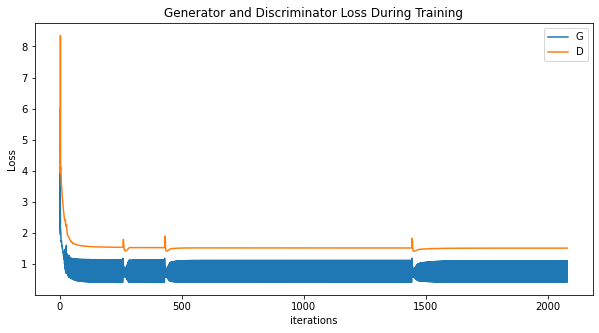

In [193]:
crnngan_minmax_curriculum_deep_discr_complex_gen.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

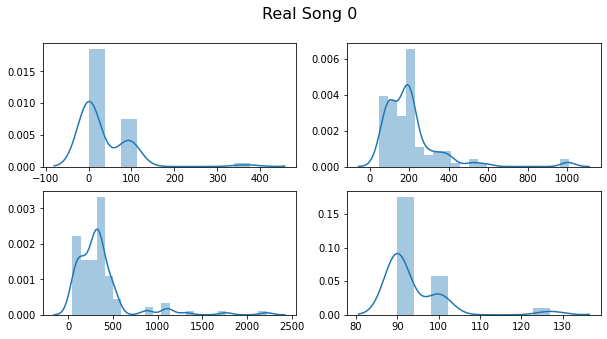

In [195]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

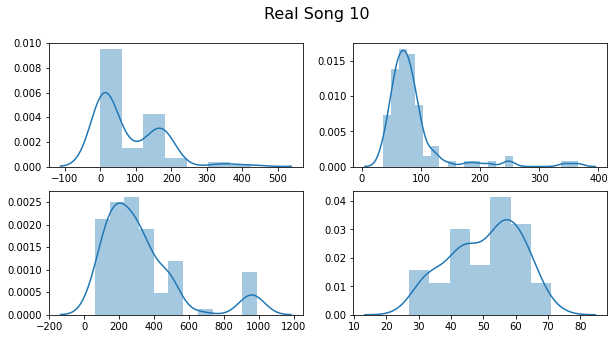

In [196]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


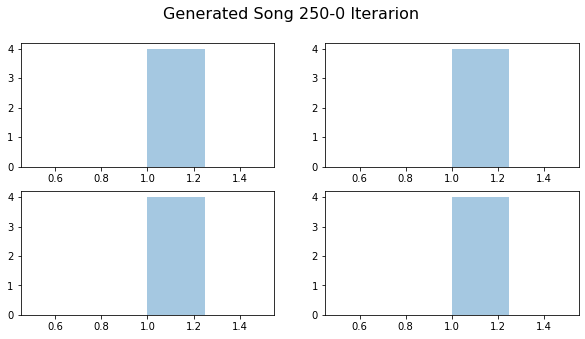

In [197]:
gen_song_250_curriculum_deep_discr_complex_gen = crnngan_minmax_curriculum_deep_discr_complex_gen.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_curriculum_deep_discr_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_curriculum_deep_discr_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_curriculum_deep_discr_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_curriculum_deep_discr_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


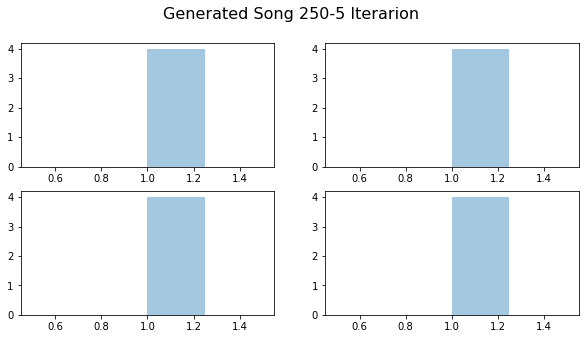

In [198]:
gen_song_250_5_curriculum_deep_discr_complex_gen = crnngan_minmax_curriculum_deep_discr_complex_gen.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_curriculum_deep_discr_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_curriculum_deep_discr_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_curriculum_deep_discr_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_curriculum_deep_discr_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


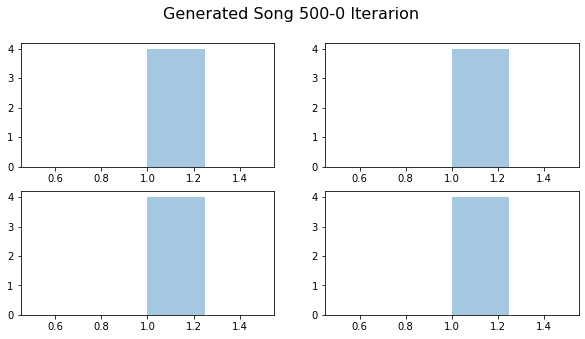

In [199]:
gen_song_500_curriculum_deep_discr_complex_gen = crnngan_minmax_curriculum_deep_discr_complex_gen.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_curriculum_deep_discr_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_curriculum_deep_discr_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_curriculum_deep_discr_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_curriculum_deep_discr_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


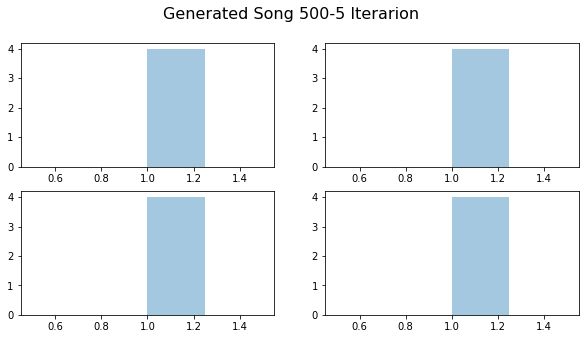

In [200]:
gen_song_500_5_curriculum_deep_discr_complex_gen = crnngan_minmax_curriculum_deep_discr_complex_gen.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_curriculum_deep_discr_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_curriculum_deep_discr_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_curriculum_deep_discr_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_curriculum_deep_discr_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


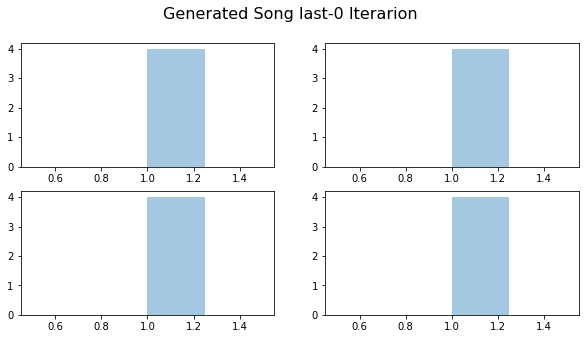

In [201]:
gen_song_last_curriculum_deep_discr_complex_gen = crnngan_minmax_curriculum_deep_discr_complex_gen.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_curriculum_deep_discr_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_curriculum_deep_discr_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_curriculum_deep_discr_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_curriculum_deep_discr_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


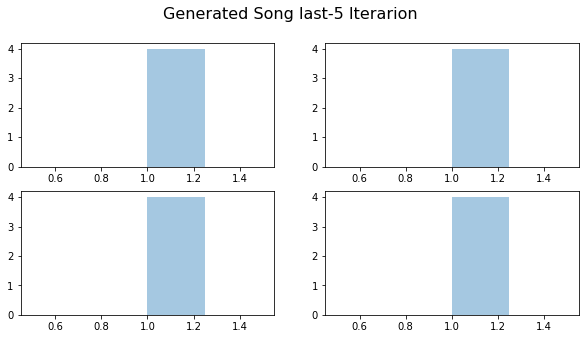

In [202]:
gen_song_last_5_curriculum_deep_discr_complex_gen = crnngan_minmax_curriculum_deep_discr_complex_gen.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_curriculum_deep_discr_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_curriculum_deep_discr_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_curriculum_deep_discr_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_curriculum_deep_discr_complex_gen[:,3], ax=axs[1, 1])

Again, horrible results...

### Complex Generator (3 layers deep generator)

#### No Curriculum

In [203]:
# Data loader
batch_length = 100
sequence_length = 100
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 3
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 2
# General
epochs = 50
curriculum_learning = False
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True


crnngan_minmax_deep_gen_complex_gen = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 complexGenerator=complexGenerator)

cuda
Complex Generator


In [204]:
crnngan_minmax_deep_gen_complex_gen.trainloop(musicDataLoader)

Start training for 50 epochs
[0/50][0]	Loss_D: 9.2123	Loss_G: 5.7110	D(x): -4.6021	D(G(z)): -4.6050 / -0.0002
 Time since epoch started: 0.18
There are a total of 0 fake songs saved already
[0/50][10]	Loss_D: 1.9497	Loss_G: 0.8657	D(x): -0.9144	D(G(z)): -0.9157 / -0.5571
 Time since epoch started: 1.80
There are a total of 5 fake songs saved already
[0/50][20]	Loss_D: 1.4627	Loss_G: 0.7502	D(x): -0.4792	D(G(z)): -0.4565 / -0.6610
 Time since epoch started: 3.43
There are a total of 10 fake songs saved already
Epoch time: 4.24
[1/50][30]	Loss_D: 1.5100	Loss_G: 0.6405	D(x): -0.4486	D(G(z)): -0.4265 / -0.5351
 Time since epoch started: 0.81
There are a total of 15 fake songs saved already
[1/50][40]	Loss_D: 1.3995	Loss_G: 1.0356	D(x): -0.5528	D(G(z)): -0.5280 / -0.4477
 Time since epoch started: 2.43
There are a total of 20 fake songs saved already
[1/50][50]	Loss_D: 1.5823	Loss_G: 0.9163	D(x): -0.3431	D(G(z)): -0.3367 / -0.5174
 Time since epoch started: 4.04
There are a total of 25 fake

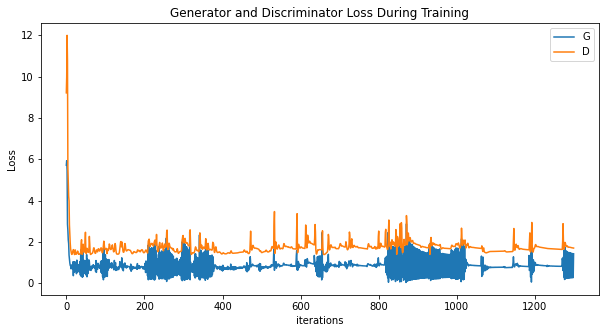

In [205]:
crnngan_minmax_deep_gen_complex_gen.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

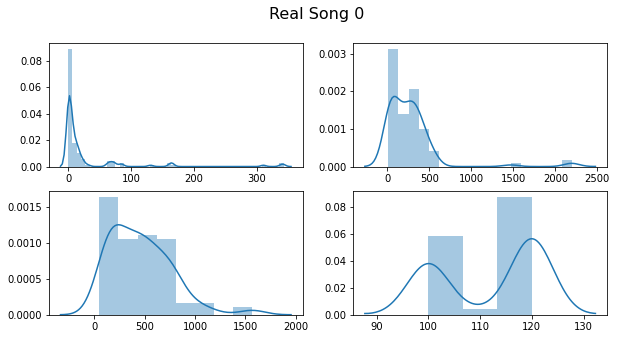

In [207]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

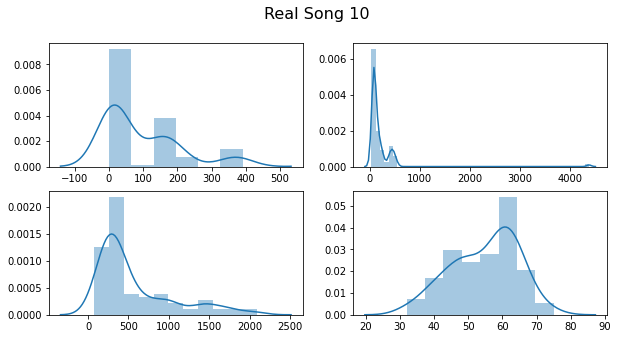

In [208]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


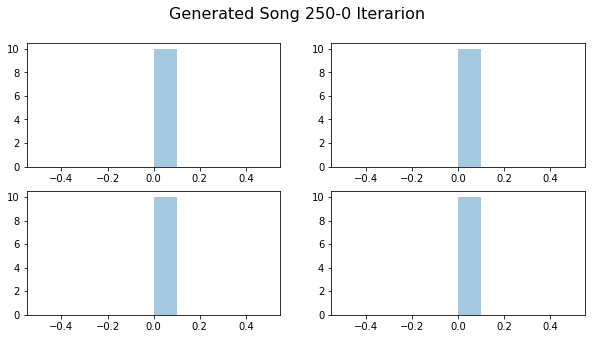

In [209]:
gen_song_250_deep_gen_complex_gen = crnngan_minmax_deep_gen_complex_gen.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_deep_gen_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_deep_gen_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_deep_gen_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_deep_gen_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


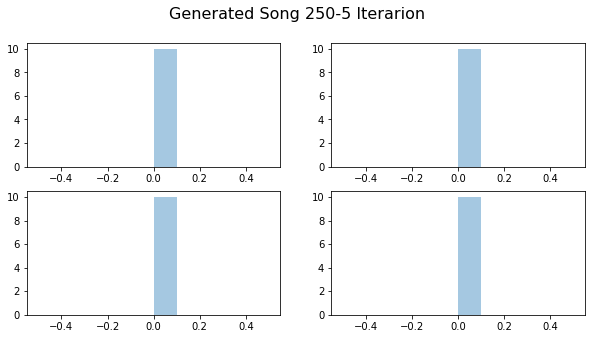

In [210]:
gen_song_250_5_deep_gen_complex_gen = crnngan_minmax_deep_gen_complex_gen.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_deep_gen_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_deep_gen_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_deep_gen_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_deep_gen_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


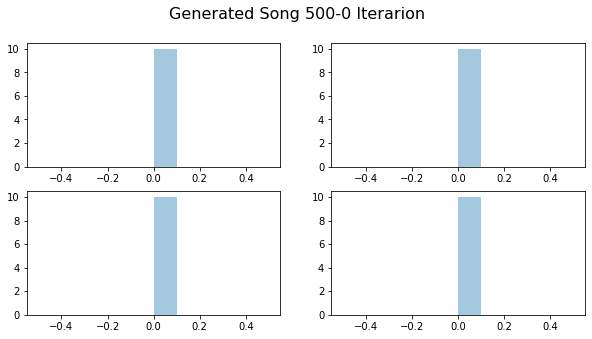

In [211]:
gen_song_500_deep_gen_complex_gen = crnngan_minmax_deep_gen_complex_gen.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_deep_gen_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_deep_gen_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_deep_gen_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_deep_gen_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


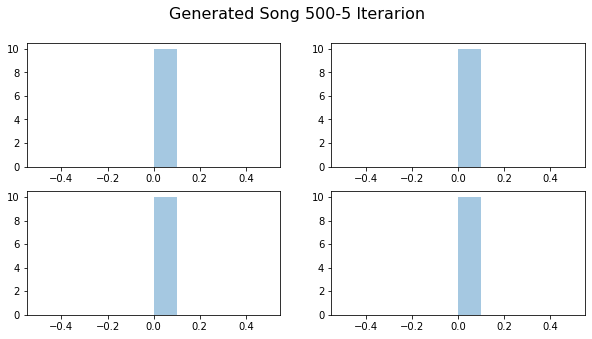

In [212]:
gen_song_500_5_deep_gen_complex_gen = crnngan_minmax_deep_gen_complex_gen.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_deep_gen_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_deep_gen_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_deep_gen_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_deep_gen_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


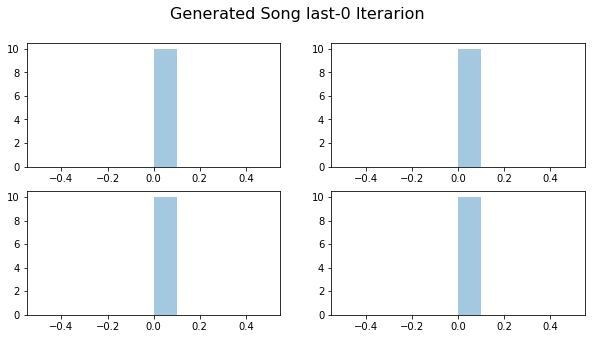

In [213]:
gen_song_last_deep_gen_complex_gen = crnngan_minmax_deep_gen_complex_gen.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_deep_gen_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_deep_gen_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_deep_gen_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_deep_gen_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


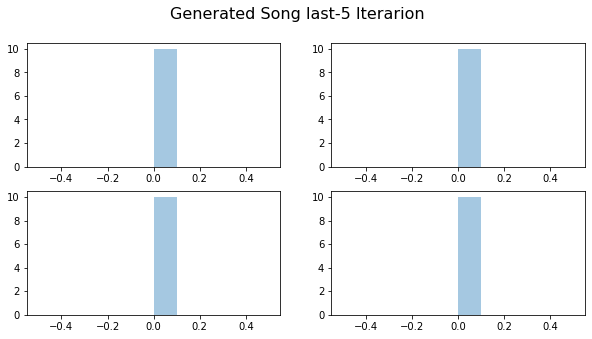

In [214]:
gen_song_last_5_deep_gen_complex_gen = crnngan_minmax_deep_gen_complex_gen.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_deep_gen_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_deep_gen_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_deep_gen_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_deep_gen_complex_gen[:,3], ax=axs[1, 1])

Again and again we keep on getting constant values...

#### Curriculum

In [215]:
# Data loader
batch_length = 100
sequence_length = 20
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 3
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 2
# General
epochs = 80
curriculum_learning = True
G_var_threshold = 1e-3
D_var_threshold = 1e-3
max_sequence_length = 200
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True

crnngan_minmax_curriculum_deep_gen_complex_gen = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 G_var_threshold=G_var_threshold, D_var_threshold=D_var_threshold,
                 max_sequence_length=max_sequence_length,
                 complexGenerator=complexGenerator)

cuda
Complex Generator


In [216]:
crnngan_minmax_curriculum_deep_gen_complex_gen.trainloop(musicDataLoader)

Start training for 80 epochs
[0/80][0]	Loss_D: 5.9814	Loss_G: 6.2025	D(x): -2.9887	D(G(z)): -2.9885 / -0.0000
 Time since epoch started: 0.05
There are a total of 0 fake songs saved already
[0/80][10]	Loss_D: 1.5470	Loss_G: 0.8262	D(x): -0.6346	D(G(z)): -0.6347 / -0.4055
 Time since epoch started: 0.49
There are a total of 5 fake songs saved already
[0/80][20]	Loss_D: 1.4452	Loss_G: 0.8293	D(x): -0.5519	D(G(z)): -0.5547 / -0.5505
 Time since epoch started: 0.91
There are a total of 10 fake songs saved already
Epoch time: 1.12
[1/80][30]	Loss_D: 1.5267	Loss_G: 0.6429	D(x): -0.4154	D(G(z)): -0.4181 / -0.4734
 Time since epoch started: 0.21
There are a total of 15 fake songs saved already
[1/80][40]	Loss_D: 1.6338	Loss_G: 0.7763	D(x): -0.3134	D(G(z)): -0.3151 / -0.3830
 Time since epoch started: 0.63
There are a total of 20 fake songs saved already
[1/80][50]	Loss_D: 1.5971	Loss_G: 0.7612	D(x): -0.3359	D(G(z)): -0.3374 / -0.3608
 Time since epoch started: 1.05
There are a total of 25 fake

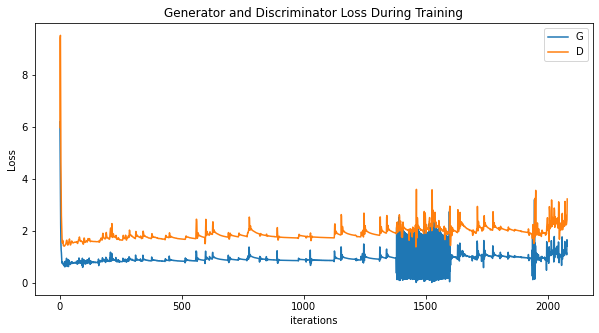

In [217]:
crnngan_minmax_curriculum_deep_gen_complex_gen.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

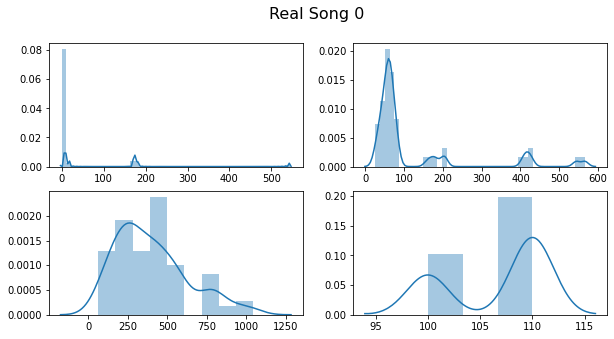

In [219]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

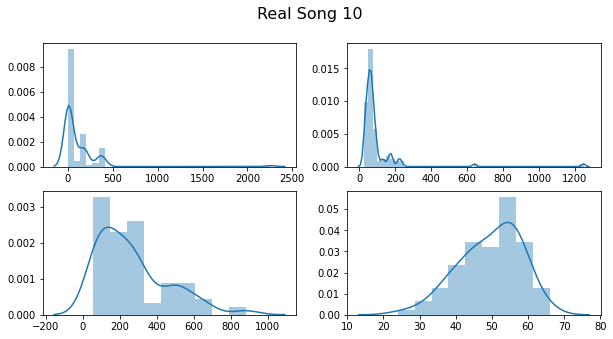

In [220]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


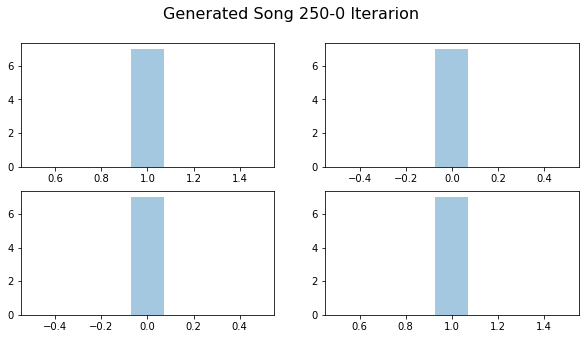

In [221]:
gen_song_250_curriculum_deep_gen_complex_gen = crnngan_minmax_curriculum_deep_gen_complex_gen.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_curriculum_deep_gen_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_curriculum_deep_gen_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_curriculum_deep_gen_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_curriculum_deep_gen_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


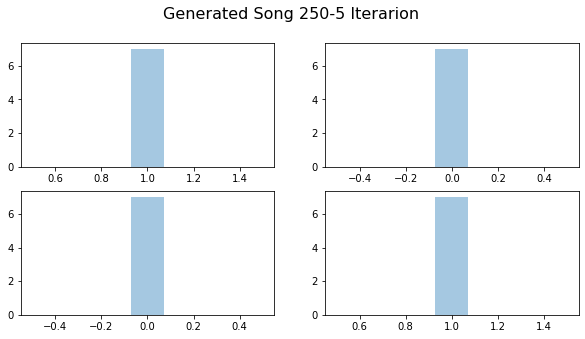

In [222]:
gen_song_250_5_curriculum_deep_gen_complex_gen = crnngan_minmax_curriculum_deep_gen_complex_gen.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_curriculum_deep_gen_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_curriculum_deep_gen_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_curriculum_deep_gen_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_curriculum_deep_gen_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


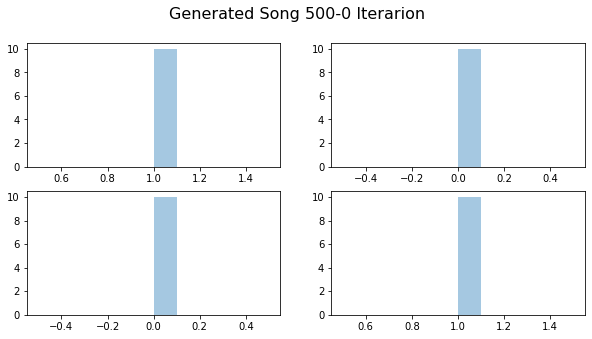

In [223]:
gen_song_500_curriculum_deep_gen_complex_gen = crnngan_minmax_curriculum_deep_gen_complex_gen.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_curriculum_deep_gen_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_curriculum_deep_gen_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_curriculum_deep_gen_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_curriculum_deep_gen_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


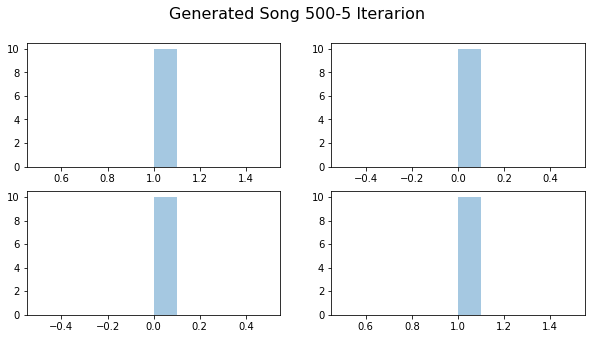

In [224]:
gen_song_500_5_curriculum_deep_gen_complex_gen = crnngan_minmax_curriculum_deep_gen_complex_gen.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_curriculum_deep_gen_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_curriculum_deep_gen_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_curriculum_deep_gen_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_curriculum_deep_gen_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


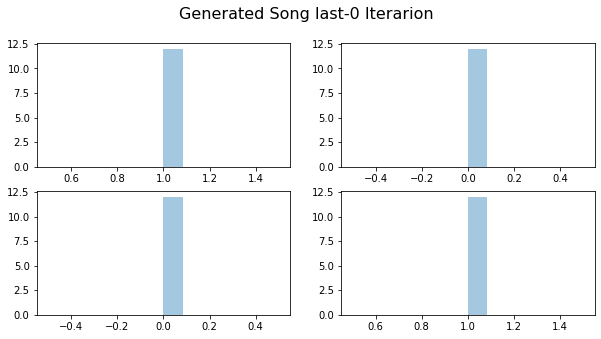

In [225]:
gen_song_last_curriculum_deep_gen_complex_gen = crnngan_minmax_curriculum_deep_gen_complex_gen.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_curriculum_deep_gen_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_curriculum_deep_gen_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_curriculum_deep_gen_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_curriculum_deep_gen_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


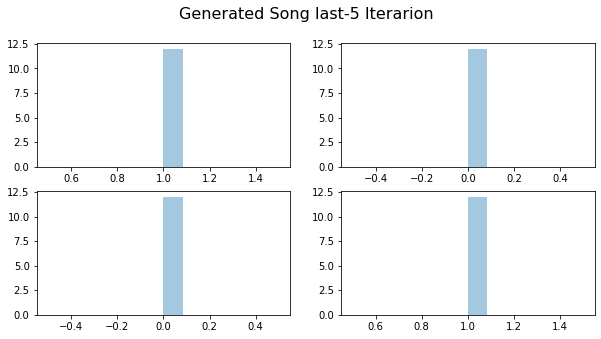

In [226]:
gen_song_last_5_curriculum_deep_gen_complex_gen = crnngan_minmax_curriculum_deep_gen_complex_gen.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_curriculum_deep_gen_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_curriculum_deep_gen_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_curriculum_deep_gen_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_curriculum_deep_gen_complex_gen[:,3], ax=axs[1, 1])

Again horrible distributions...

### Complex Generator (3 layers deep both)

#### No Curriculum

In [240]:
# Data loader
batch_length = 100
sequence_length = 100
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 3
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 50
curriculum_learning = False
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True


crnngan_minmax_deep_complex_gen = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 complexGenerator=complexGenerator)

cuda
Complex Generator


In [241]:
crnngan_minmax_deep_complex_gen.trainloop(musicDataLoader)

Start training for 50 epochs
[0/50][0]	Loss_D: 9.2094	Loss_G: 2.6990	D(x): -4.6027	D(G(z)): -4.6030 / -0.3362
 Time since epoch started: 0.21
There are a total of 0 fake songs saved already
[0/50][10]	Loss_D: 1.5181	Loss_G: 0.9359	D(x): -0.4253	D(G(z)): -0.4100 / -0.5254
 Time since epoch started: 2.13
There are a total of 5 fake songs saved already
[0/50][20]	Loss_D: 1.3135	Loss_G: 0.7011	D(x): -0.5904	D(G(z)): -0.6580 / -0.6741
 Time since epoch started: 4.03
There are a total of 10 fake songs saved already
Epoch time: 5.01
[1/50][30]	Loss_D: 1.2659	Loss_G: 0.9012	D(x): -0.5591	D(G(z)): -0.6275 / -0.5246
 Time since epoch started: 0.95
There are a total of 15 fake songs saved already
[1/50][40]	Loss_D: 1.2554	Loss_G: 0.7801	D(x): -0.5288	D(G(z)): -0.5771 / -0.6154
 Time since epoch started: 2.87
There are a total of 20 fake songs saved already
[1/50][50]	Loss_D: 1.2831	Loss_G: 1.0426	D(x): -0.4815	D(G(z)): -0.5265 / -0.4483
 Time since epoch started: 4.76
There are a total of 25 fake

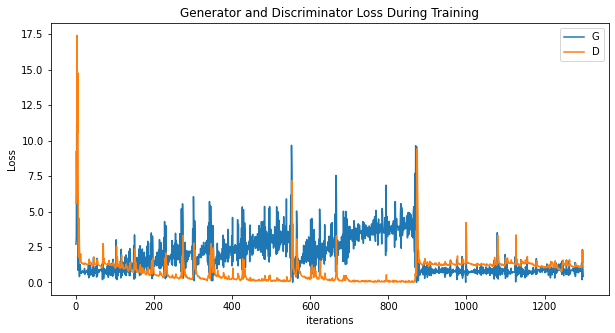

In [242]:
crnngan_minmax_deep_complex_gen.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

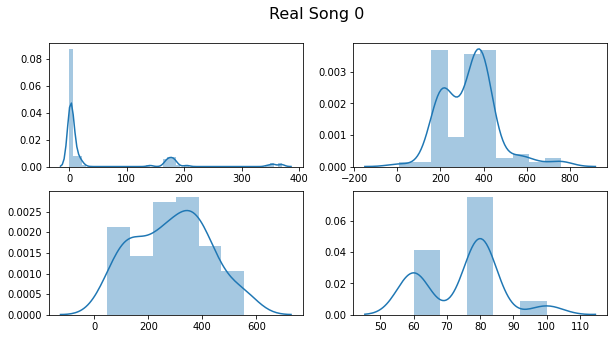

In [244]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

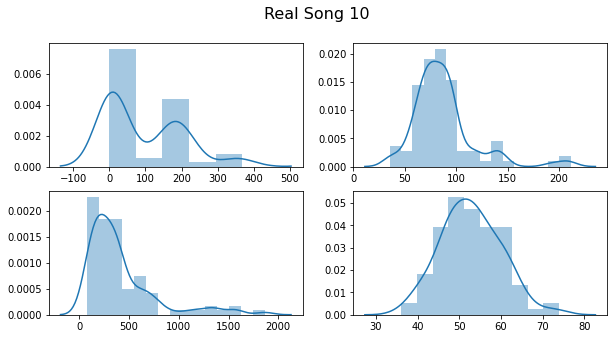

In [245]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


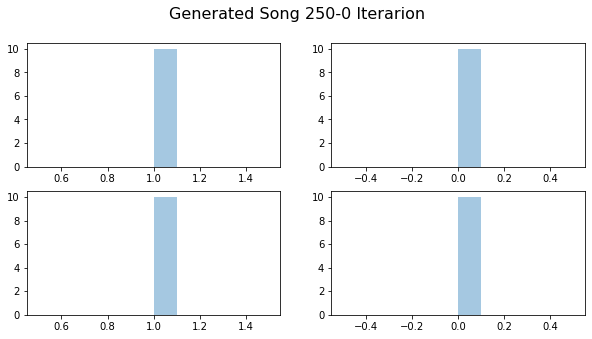

In [246]:
gen_song_250_deep_complex_gen = crnngan_minmax_deep_complex_gen.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_deep_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_deep_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_deep_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_deep_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


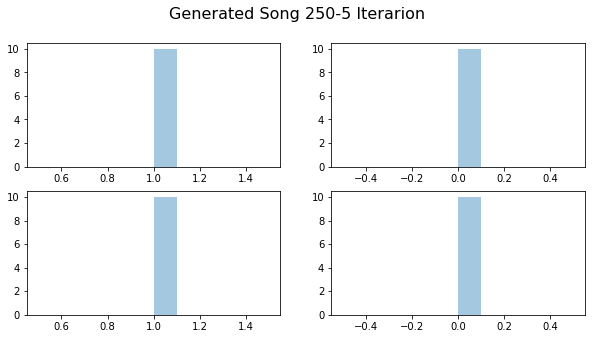

In [247]:
gen_song_250_5_deep_complex_gen = crnngan_minmax_deep_complex_gen.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_deep_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_deep_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_deep_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_deep_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


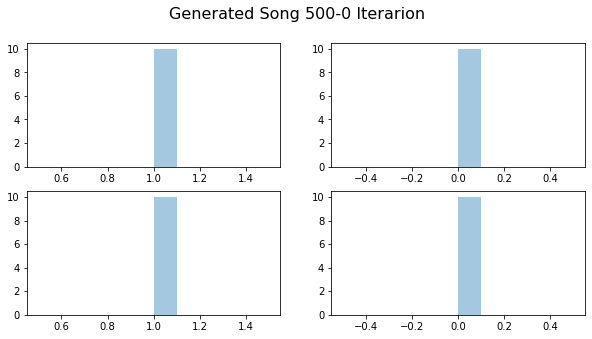

In [248]:
gen_song_500_deep_complex_gen = crnngan_minmax_deep_complex_gen.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_deep_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_deep_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_deep_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_deep_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


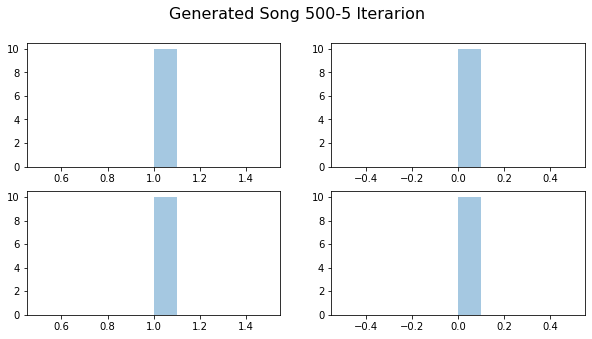

In [249]:
gen_song_500_5_deep_complex_gen = crnngan_minmax_deep_complex_gen.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_deep_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_deep_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_deep_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_deep_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


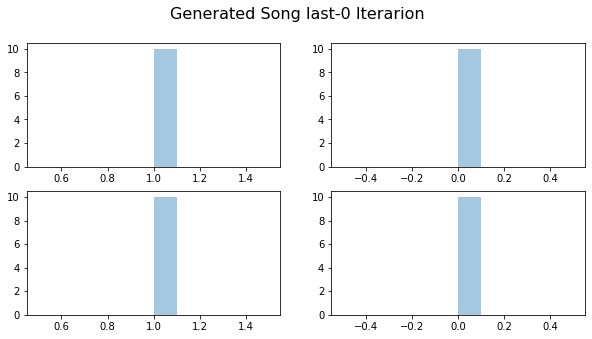

In [250]:
gen_song_last_deep_complex_gen = crnngan_minmax_deep_complex_gen.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_deep_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_deep_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_deep_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_deep_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


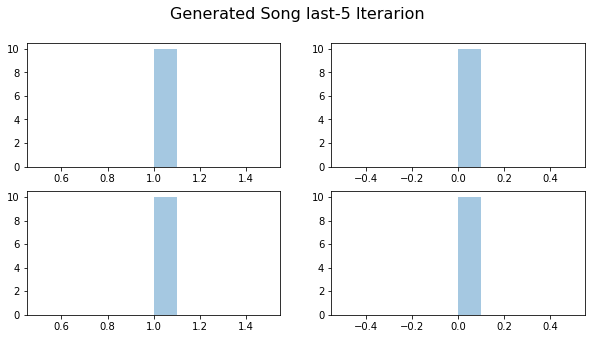

In [251]:
gen_song_last_5_deep_complex_gen = crnngan_minmax_deep_complex_gen.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_deep_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_deep_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_deep_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_deep_complex_gen[:,3], ax=axs[1, 1])

Again and again we keep on getting constant values, not only that but also convergence is not very good...

#### Curriculum

In [252]:
# Data loader
batch_length = 100
sequence_length = 20
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 3
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 80
curriculum_learning = True
G_var_threshold = 1e-3
D_var_threshold = 1e-3
max_sequence_length = 200
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True

crnngan_minmax_curriculum_deep_complex_gen = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 G_var_threshold=G_var_threshold, D_var_threshold=D_var_threshold,
                 max_sequence_length=max_sequence_length,
                 complexGenerator=complexGenerator)

cuda
Complex Generator


In [253]:
crnngan_minmax_curriculum_deep_complex_gen.trainloop(musicDataLoader)

Start training for 80 epochs
[0/80][0]	Loss_D: 5.9961	Loss_G: 2.0668	D(x): -2.9951	D(G(z)): -2.9953 / -0.2426
 Time since epoch started: 0.06
There are a total of 0 fake songs saved already
[0/80][10]	Loss_D: 3.7883	Loss_G: 1.8721	D(x): -0.5528	D(G(z)): -0.5528 / -0.5616
 Time since epoch started: 0.59
There are a total of 5 fake songs saved already
[0/80][20]	Loss_D: 3.5868	Loss_G: 1.7844	D(x): -0.5852	D(G(z)): -0.5852 / -0.5723
 Time since epoch started: 1.09
There are a total of 10 fake songs saved already
Epoch time: 1.33
[1/80][30]	Loss_D: 3.7879	Loss_G: 2.0349	D(x): -1.3613	D(G(z)): -1.3613 / -0.1166
 Time since epoch started: 0.25
There are a total of 15 fake songs saved already
[1/80][40]	Loss_D: 3.3774	Loss_G: 1.7272	D(x): -1.0615	D(G(z)): -1.0615 / -0.2553
 Time since epoch started: 0.77
There are a total of 20 fake songs saved already
[1/80][50]	Loss_D: 3.1142	Loss_G: 1.5571	D(x): -0.9052	D(G(z)): -0.9052 / -0.3418
 Time since epoch started: 1.30
There are a total of 25 fake

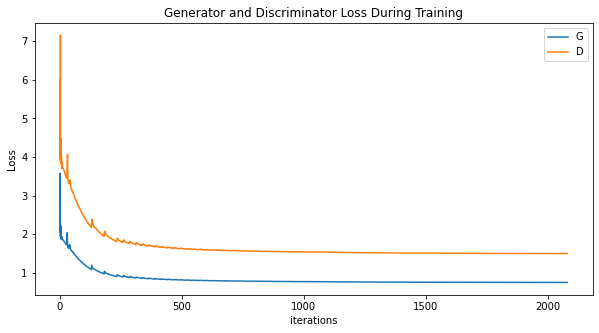

In [254]:
crnngan_minmax_curriculum_deep_complex_gen.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

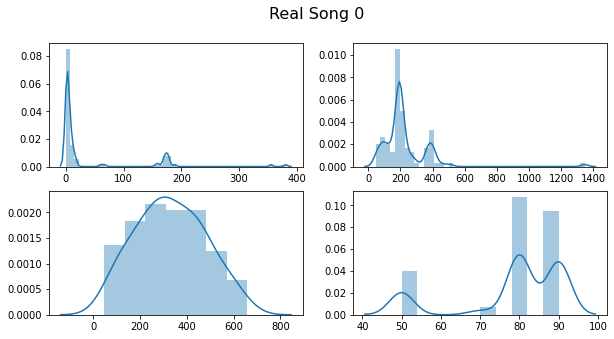

In [256]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

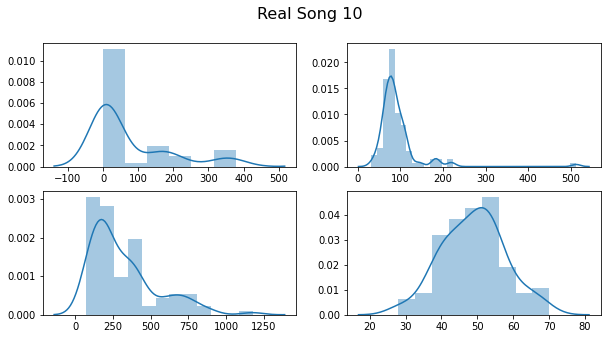

In [257]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


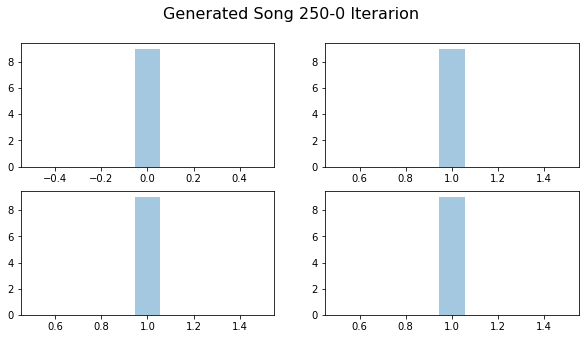

In [258]:
gen_song_250_curriculum_deep_complex_gen = crnngan_minmax_curriculum_deep_complex_gen.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_curriculum_deep_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_curriculum_deep_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_curriculum_deep_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_curriculum_deep_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


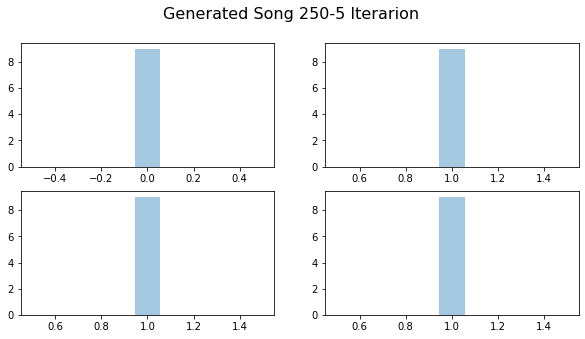

In [259]:
gen_song_250_5_curriculum_deep_complex_gen = crnngan_minmax_curriculum_deep_complex_gen.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_curriculum_deep_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_curriculum_deep_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_curriculum_deep_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_curriculum_deep_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


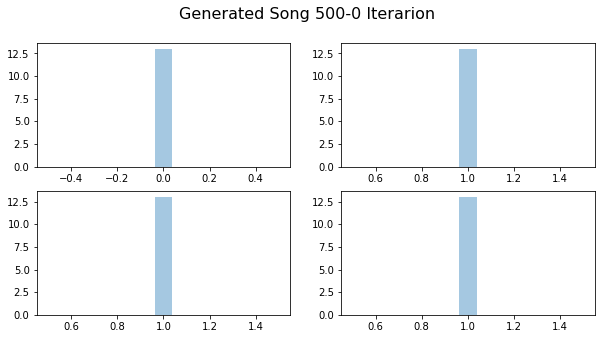

In [260]:
gen_song_500_curriculum_deep_complex_gen = crnngan_minmax_curriculum_deep_complex_gen.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_curriculum_deep_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_curriculum_deep_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_curriculum_deep_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_curriculum_deep_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


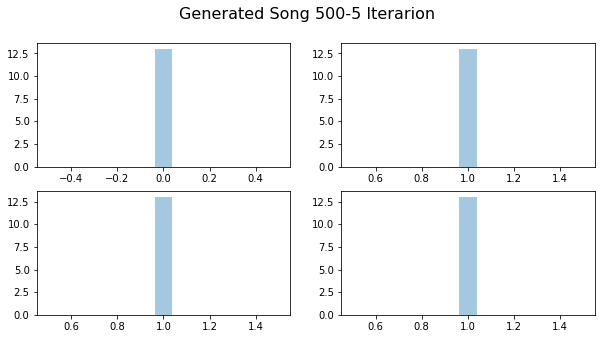

In [261]:
gen_song_500_5_curriculum_deep_complex_gen = crnngan_minmax_curriculum_deep_complex_gen.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_curriculum_deep_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_curriculum_deep_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_curriculum_deep_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_curriculum_deep_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


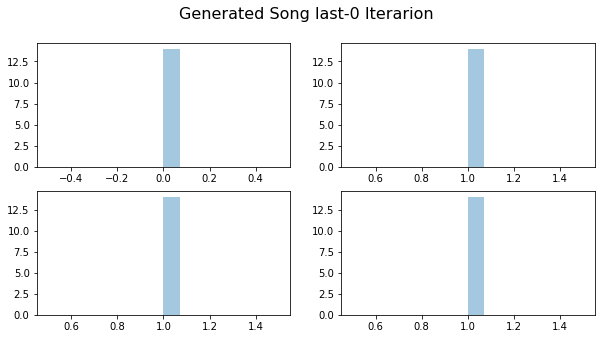

In [262]:
gen_song_last_curriculum_deep_complex_gen = crnngan_minmax_curriculum_deep_complex_gen.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_curriculum_deep_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_curriculum_deep_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_curriculum_deep_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_curriculum_deep_complex_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


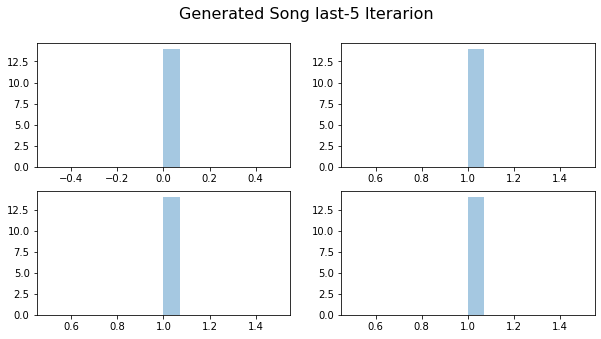

In [263]:
gen_song_last_5_curriculum_deep_complex_gen = crnngan_minmax_curriculum_deep_complex_gen.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_curriculum_deep_complex_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_curriculum_deep_complex_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_curriculum_deep_complex_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_curriculum_deep_complex_gen[:,3], ax=axs[1, 1])

We keep on getting very bad distributions...

### Both Complex (2 layers deep both)

#### No Curriculum

In [264]:
# Data loader
batch_length = 100
sequence_length = 100
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 2
# General
epochs = 50
curriculum_learning = False
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True
complexDiscriminator = True

crnngan_minmax_both_complex = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 complexGenerator=complexGenerator, complexDiscriminator=complexDiscriminator)

cuda
Complex Generator
Complex Discriminator


In [265]:
crnngan_minmax_both_complex.trainloop(musicDataLoader)

Start training for 50 epochs
[0/50][0]	Loss_D: 9.2084	Loss_G: 10.0023	D(x): -4.6038	D(G(z)): -4.6040 / 0.0000
 Time since epoch started: 0.17
There are a total of 0 fake songs saved already
[0/50][10]	Loss_D: 18.8357	Loss_G: 1.7760	D(x): -3.7471	D(G(z)): -3.7902 / -0.3027
 Time since epoch started: 1.69
There are a total of 5 fake songs saved already
[0/50][20]	Loss_D: 4.0909	Loss_G: 1.1316	D(x): -0.0175	D(G(z)): -0.0182 / -0.3601
 Time since epoch started: 3.21
There are a total of 10 fake songs saved already
Epoch time: 3.97
[1/50][30]	Loss_D: 1.4745	Loss_G: 0.7735	D(x): -0.5646	D(G(z)): -0.5756 / -0.4616
 Time since epoch started: 0.77
There are a total of 15 fake songs saved already
[1/50][40]	Loss_D: 2.9522	Loss_G: 0.8235	D(x): -0.1084	D(G(z)): -0.1076 / -0.4417
 Time since epoch started: 2.27
There are a total of 20 fake songs saved already
[1/50][50]	Loss_D: 2.0791	Loss_G: 1.2493	D(x): -0.6066	D(G(z)): -0.6076 / -0.1241
 Time since epoch started: 3.76
There are a total of 25 fak

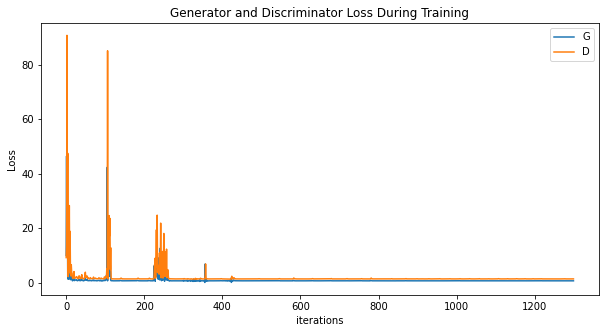

In [266]:
crnngan_minmax_both_complex.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

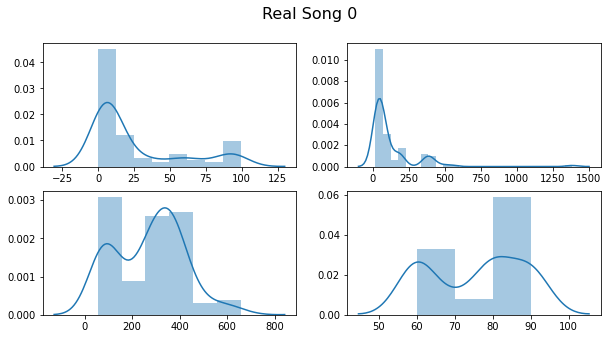

In [268]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

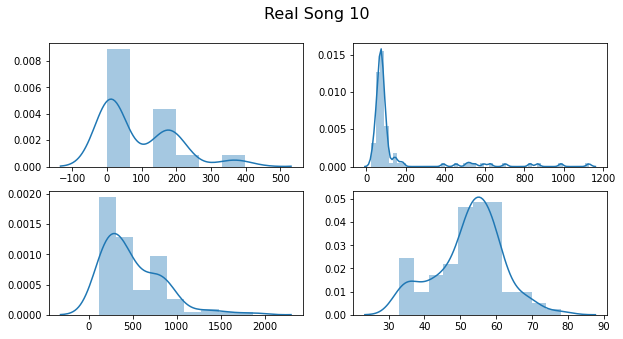

In [269]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


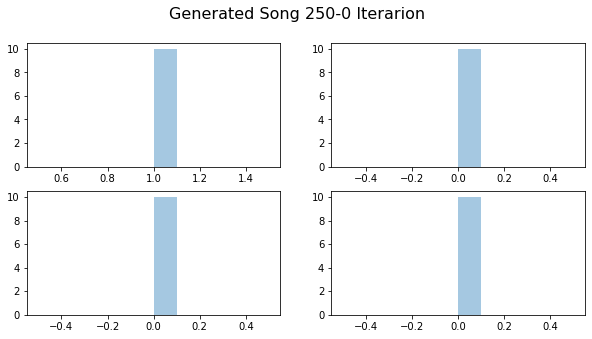

In [270]:
gen_song_250_both_complex = crnngan_minmax_both_complex.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_both_complex[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_both_complex[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_both_complex[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_both_complex[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


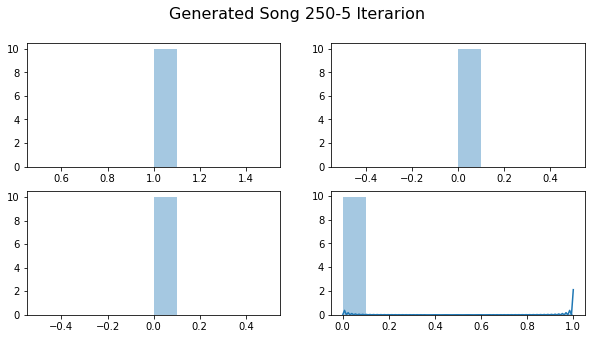

In [271]:
gen_song_250_5_both_complex = crnngan_minmax_both_complex.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_both_complex[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_both_complex[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_both_complex[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_both_complex[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


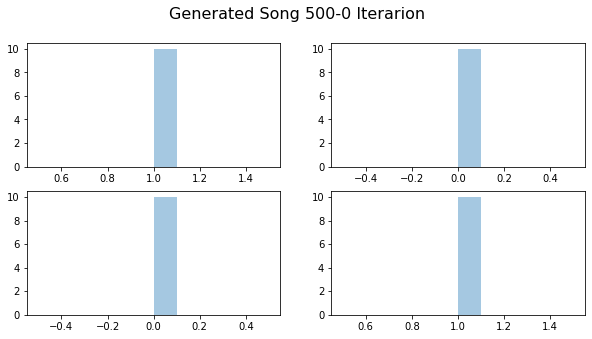

In [272]:
gen_song_500_both_complex = crnngan_minmax_both_complex.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_both_complex[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_both_complex[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_both_complex[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_both_complex[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


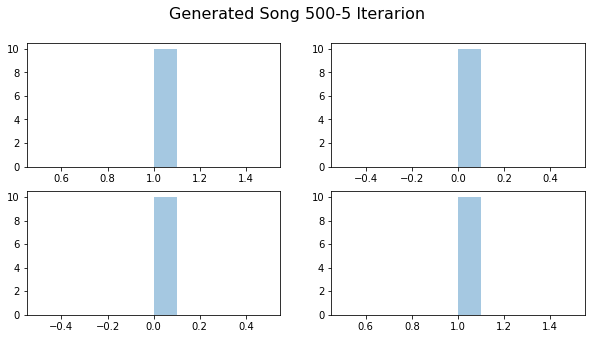

In [273]:
gen_song_500_5_both_complex = crnngan_minmax_both_complex.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_both_complex[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_both_complex[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_both_complex[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_both_complex[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


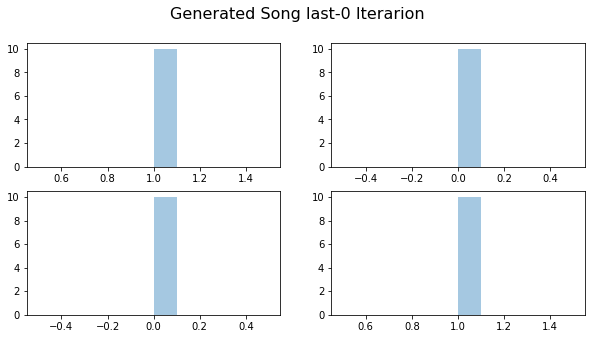

In [274]:
gen_song_last_both_complex = crnngan_minmax_both_complex.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_both_complex[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_both_complex[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_both_complex[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_both_complex[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


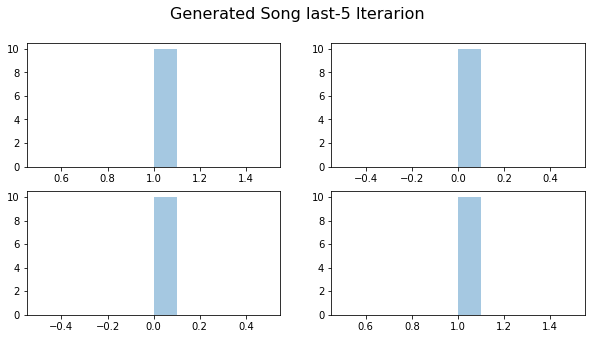

In [275]:
gen_song_last_5_both_complex = crnngan_minmax_both_complex.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_both_complex[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_both_complex[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_both_complex[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_both_complex[:,3], ax=axs[1, 1])

As usual, good convergence but really bad generated values...

#### Curriculum

In [276]:
# Data loader
batch_length = 100
sequence_length = 20
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 2
# General
epochs = 80
curriculum_learning = True
G_var_threshold = 1e-3
D_var_threshold = 1e-3
max_sequence_length = 200
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True
complexDiscriminator = True

crnngan_minmax_curriculum_both_complex = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 G_var_threshold=G_var_threshold, D_var_threshold=D_var_threshold,
                 max_sequence_length=max_sequence_length,
                 complexGenerator=complexGenerator, complexDiscriminator=complexDiscriminator)

cuda
Complex Generator
Complex Discriminator


In [277]:
crnngan_minmax_curriculum_both_complex.trainloop(musicDataLoader)

Start training for 80 epochs
[0/80][0]	Loss_D: 5.9906	Loss_G: 13.9937	D(x): -2.9948	D(G(z)): -2.9953 / 0.0000
 Time since epoch started: 0.05
There are a total of 0 fake songs saved already
[0/80][10]	Loss_D: 3.3432	Loss_G: 1.4790	D(x): -0.3275	D(G(z)): -0.3327 / -0.0782
 Time since epoch started: 0.46
There are a total of 5 fake songs saved already
[0/80][20]	Loss_D: 1.4268	Loss_G: 0.7374	D(x): -0.6629	D(G(z)): -0.6257 / -0.4408
 Time since epoch started: 0.85
There are a total of 10 fake songs saved already
Epoch time: 1.05
[1/80][30]	Loss_D: 1.3853	Loss_G: 0.6701	D(x): -0.6679	D(G(z)): -0.6736 / -0.5528
 Time since epoch started: 0.20
There are a total of 15 fake songs saved already
[1/80][40]	Loss_D: 1.3529	Loss_G: 0.7166	D(x): -0.6692	D(G(z)): -0.6524 / -0.6481
 Time since epoch started: 0.62
There are a total of 20 fake songs saved already
[1/80][50]	Loss_D: 1.5349	Loss_G: 0.3442	D(x): -0.3683	D(G(z)): -0.3499 / -0.3442
 Time since epoch started: 1.03
There are a total of 25 fake

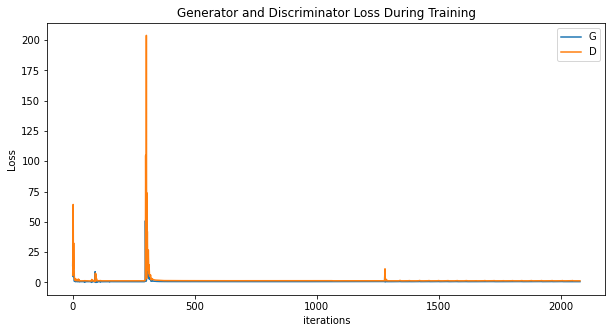

In [278]:
crnngan_minmax_curriculum_both_complex.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

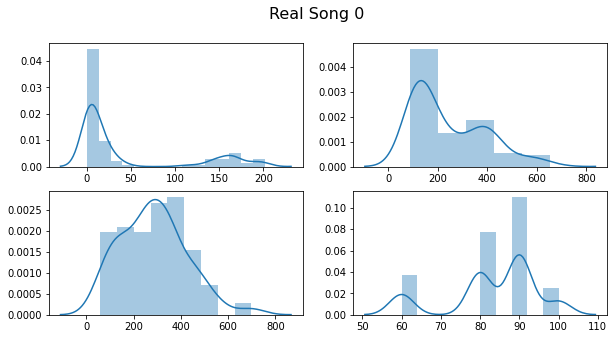

In [280]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

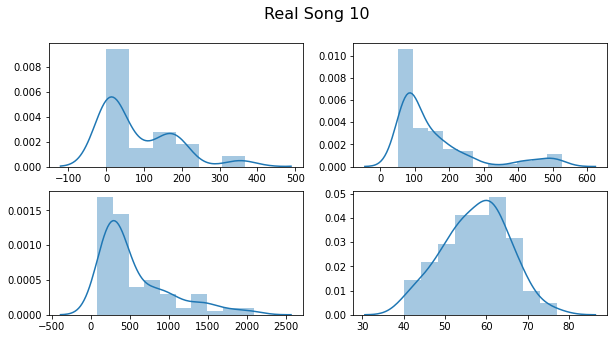

In [281]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


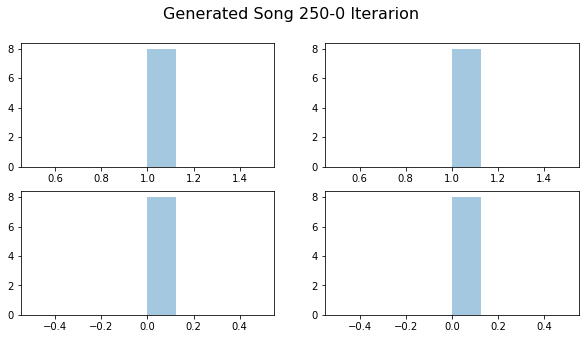

In [282]:
gen_song_250_curriculum_both_complex = crnngan_minmax_curriculum_both_complex.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_curriculum_both_complex[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_curriculum_both_complex[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_curriculum_both_complex[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_curriculum_both_complex[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


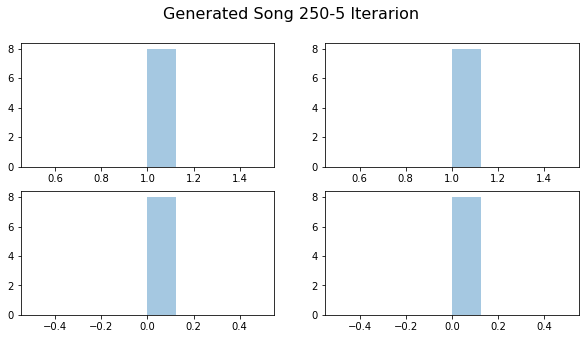

In [283]:
gen_song_250_5_curriculum_both_complex = crnngan_minmax_curriculum_both_complex.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_curriculum_both_complex[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_curriculum_both_complex[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_curriculum_both_complex[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_curriculum_both_complex[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


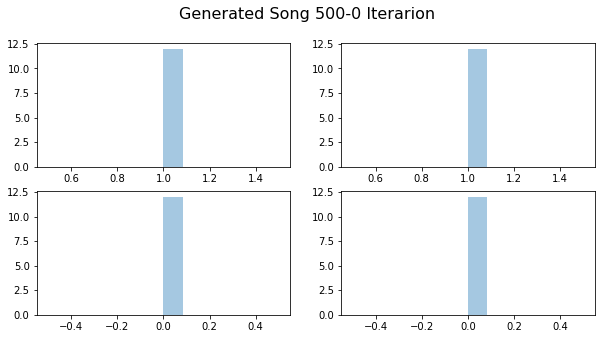

In [284]:
gen_song_500_curriculum_both_complex = crnngan_minmax_curriculum_both_complex.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_curriculum_both_complex[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_curriculum_both_complex[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_curriculum_both_complex[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_curriculum_both_complex[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


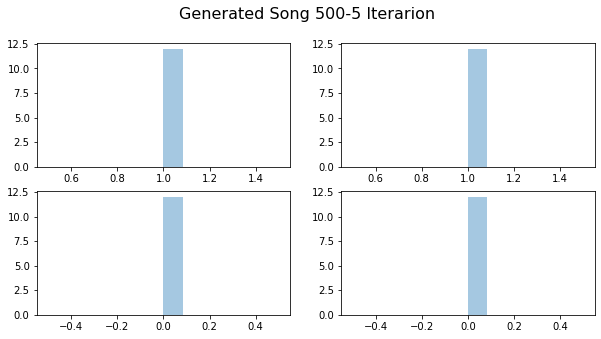

In [285]:
gen_song_500_5_curriculum_both_complex = crnngan_minmax_curriculum_both_complex.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_curriculum_both_complex[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_curriculum_both_complex[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_curriculum_both_complex[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_curriculum_both_complex[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


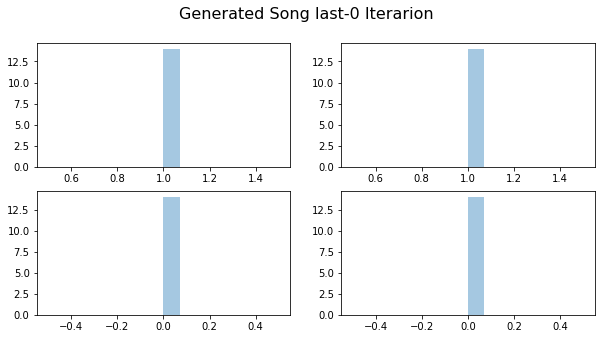

In [286]:
gen_song_last_curriculum_both_complex = crnngan_minmax_curriculum_both_complex.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_curriculum_both_complex[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_curriculum_both_complex[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_curriculum_both_complex[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_curriculum_both_complex[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


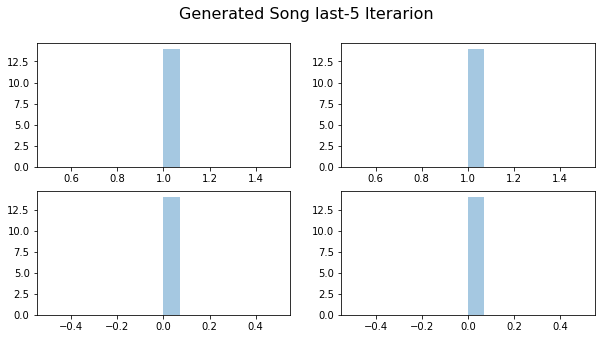

In [287]:
gen_song_last_5_curriculum_both_complex = crnngan_minmax_curriculum_both_complex.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_curriculum_both_complex[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_curriculum_both_complex[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_curriculum_both_complex[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_curriculum_both_complex[:,3], ax=axs[1, 1])

We keep on getting extreme values...

### Both Complex (3 layers deep gen)

#### No Curriculum

In [288]:
# Data loader
batch_length = 100
sequence_length = 100
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 3
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 2
# General
epochs = 50
curriculum_learning = False
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True
complexDiscriminator = True

crnngan_minmax_both_complex_deep_gen = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 complexGenerator=complexGenerator, complexDiscriminator=complexDiscriminator)

cuda
Complex Generator
Complex Discriminator


In [289]:
crnngan_minmax_both_complex_deep_gen.trainloop(musicDataLoader)

Start training for 50 epochs
[0/50][0]	Loss_D: 9.2112	Loss_G: 8.0436	D(x): -4.6042	D(G(z)): -4.6041 / -0.0001
 Time since epoch started: 0.19
There are a total of 0 fake songs saved already
[0/50][10]	Loss_D: 1.4891	Loss_G: 1.0886	D(x): -0.4208	D(G(z)): -0.5503 / -0.0785
 Time since epoch started: 1.88
There are a total of 5 fake songs saved already
[0/50][20]	Loss_D: 1.8136	Loss_G: 0.7097	D(x): -0.2320	D(G(z)): -0.2304 / -0.5829
 Time since epoch started: 3.54
There are a total of 10 fake songs saved already
Epoch time: 4.38
[1/50][30]	Loss_D: 1.3466	Loss_G: 0.7013	D(x): -0.6649	D(G(z)): -0.6603 / -0.6858
 Time since epoch started: 0.84
There are a total of 15 fake songs saved already
[1/50][40]	Loss_D: 1.3971	Loss_G: 0.6747	D(x): -0.6144	D(G(z)): -0.6167 / -0.6359
 Time since epoch started: 2.54
There are a total of 20 fake songs saved already
[1/50][50]	Loss_D: 1.3990	Loss_G: 0.8277	D(x): -0.5015	D(G(z)): -0.5611 / -0.3306
 Time since epoch started: 4.22
There are a total of 25 fake

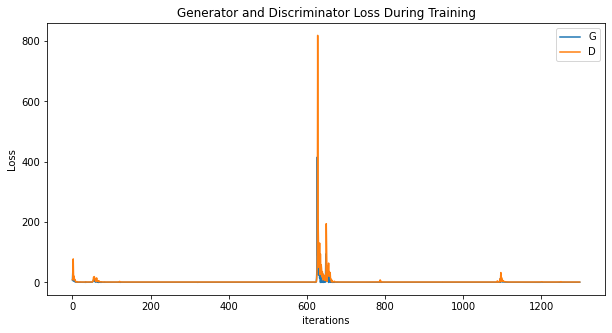

In [290]:
crnngan_minmax_both_complex_deep_gen.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

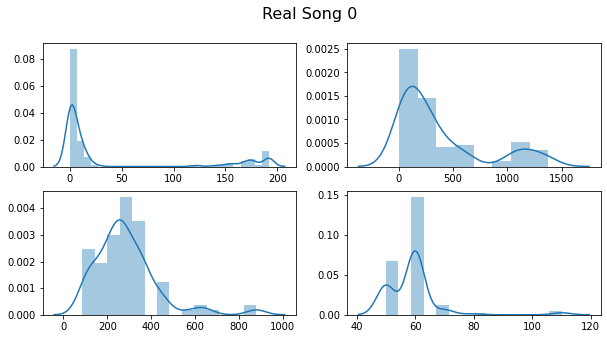

In [292]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

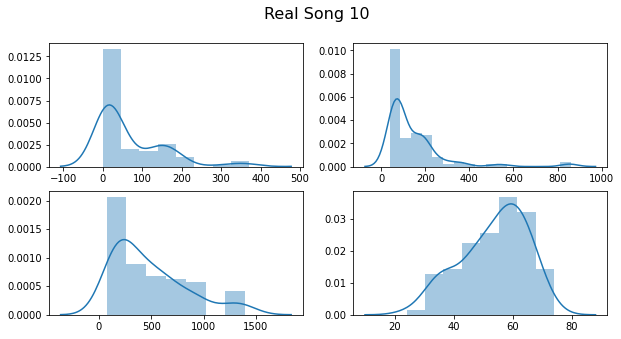

In [293]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


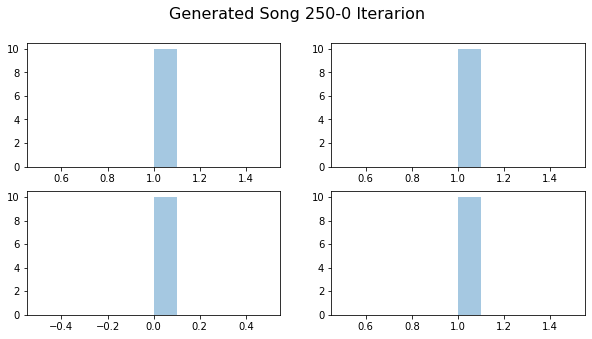

In [294]:
gen_song_250_both_complex_deep_gen = crnngan_minmax_both_complex_deep_gen.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_both_complex_deep_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_both_complex_deep_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_both_complex_deep_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_both_complex_deep_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


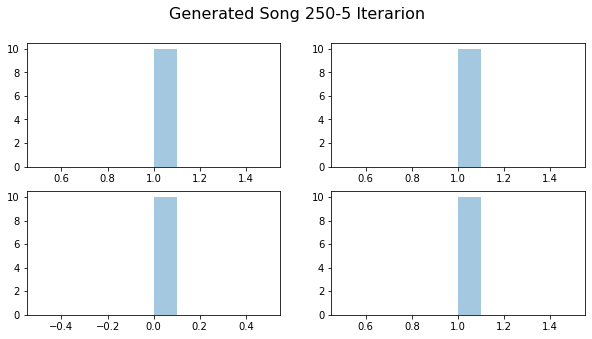

In [295]:
gen_song_250_5_both_complex_deep_gen = crnngan_minmax_both_complex_deep_gen.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_both_complex_deep_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_both_complex_deep_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_both_complex_deep_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_both_complex_deep_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


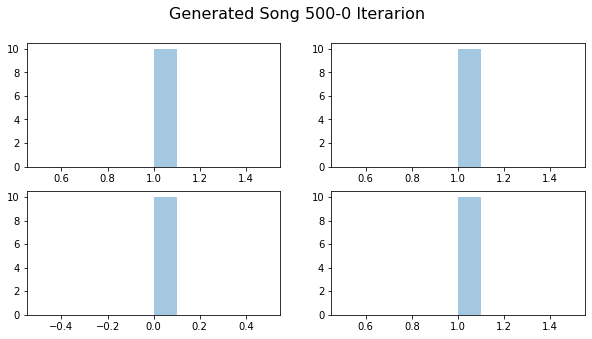

In [296]:
gen_song_500_both_complex_deep_gen = crnngan_minmax_both_complex_deep_gen.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_both_complex_deep_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_both_complex_deep_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_both_complex_deep_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_both_complex_deep_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


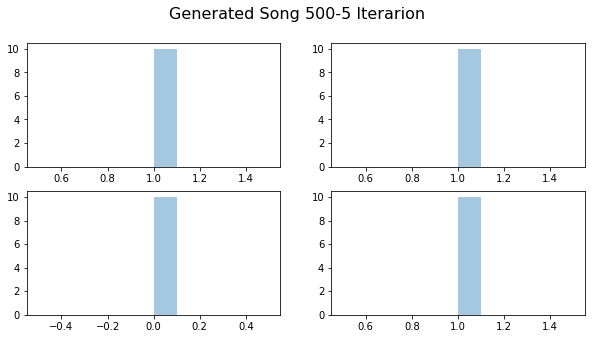

In [297]:
gen_song_500_5_both_complex_deep_gen = crnngan_minmax_both_complex_deep_gen.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_both_complex_deep_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_both_complex_deep_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_both_complex_deep_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_both_complex_deep_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


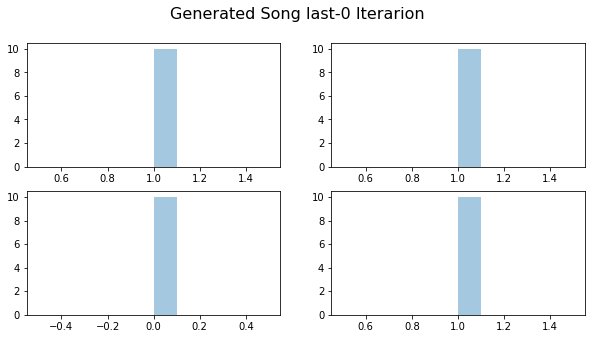

In [298]:
gen_song_last_both_complex_deep_gen = crnngan_minmax_both_complex_deep_gen.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_both_complex_deep_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_both_complex_deep_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_both_complex_deep_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_both_complex_deep_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


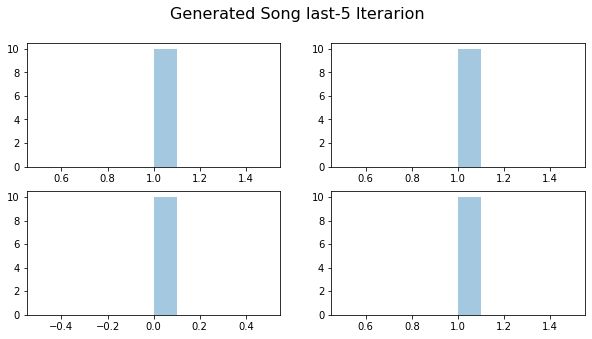

In [299]:
gen_song_last_5_both_complex_deep_gen = crnngan_minmax_both_complex_deep_gen.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_both_complex_deep_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_both_complex_deep_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_both_complex_deep_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_both_complex_deep_gen[:,3], ax=axs[1, 1])

As usual, good convergence but really bad generated values...

#### Curriculum

In [300]:
# Data loader
batch_length = 100
sequence_length = 20
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 3
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 2
# General
epochs = 80
curriculum_learning = True
G_var_threshold = 1e-3
D_var_threshold = 1e-3
max_sequence_length = 200
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True
complexDiscriminator = True

crnngan_minmax_curriculum_both_complex_deep_gen = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 G_var_threshold=G_var_threshold, D_var_threshold=D_var_threshold,
                 max_sequence_length=max_sequence_length,
                 complexGenerator=complexGenerator, complexDiscriminator=complexDiscriminator)

cuda
Complex Generator
Complex Discriminator


In [301]:
crnngan_minmax_curriculum_both_complex_deep_gen.trainloop(musicDataLoader)

Start training for 80 epochs
[0/80][0]	Loss_D: 5.9902	Loss_G: 9.8424	D(x): -2.9949	D(G(z)): -2.9949 / 0.0000
 Time since epoch started: 0.05
There are a total of 0 fake songs saved already
[0/80][10]	Loss_D: 10.4077	Loss_G: 0.7709	D(x): -0.2342	D(G(z)): -0.1624 / -0.3360
 Time since epoch started: 0.50
There are a total of 5 fake songs saved already
[0/80][20]	Loss_D: 11.0704	Loss_G: 0.3984	D(x): -0.0053	D(G(z)): -0.0053 / -0.3984
 Time since epoch started: 0.94
There are a total of 10 fake songs saved already
Epoch time: 1.16
[1/80][30]	Loss_D: 1.3914	Loss_G: 0.6856	D(x): -0.6431	D(G(z)): -0.6427 / -0.6856
 Time since epoch started: 0.22
There are a total of 15 fake songs saved already
[1/80][40]	Loss_D: 1.3867	Loss_G: 0.6929	D(x): -0.6913	D(G(z)): -0.6916 / -0.6911
 Time since epoch started: 0.65
There are a total of 20 fake songs saved already
[1/80][50]	Loss_D: 1.3865	Loss_G: 0.6931	D(x): -0.6916	D(G(z)): -0.6917 / -0.6925
 Time since epoch started: 1.09
There are a total of 25 fak

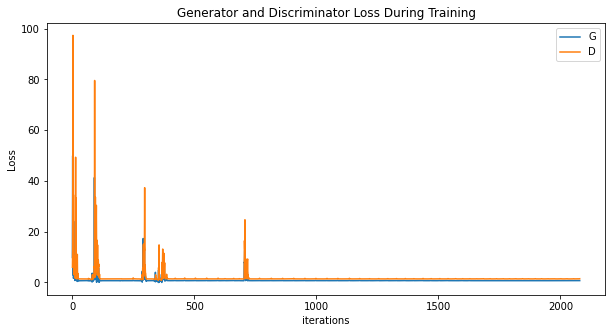

In [302]:
crnngan_minmax_curriculum_both_complex_deep_gen.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

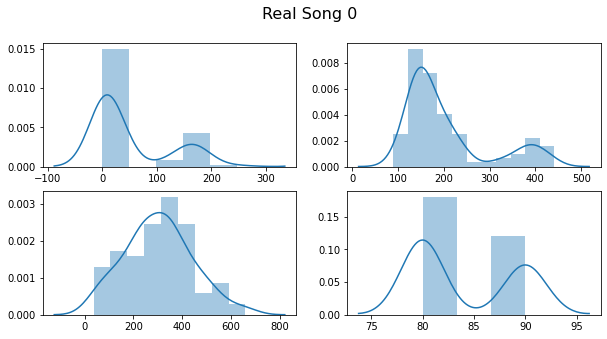

In [304]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

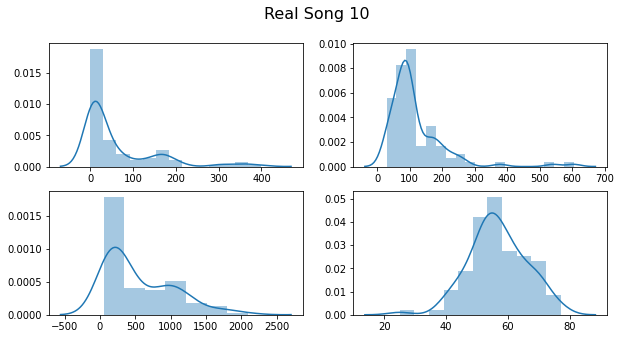

In [305]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


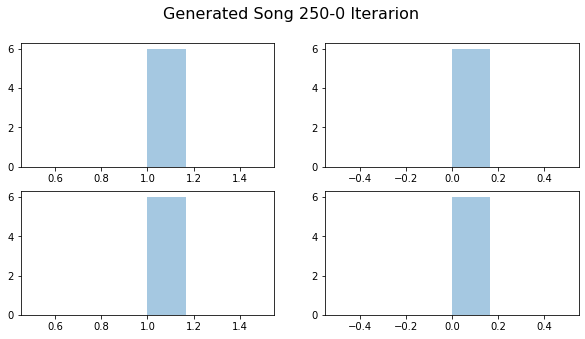

In [306]:
gen_song_250_curriculum_both_complex_deep_gen = crnngan_minmax_curriculum_both_complex_deep_gen.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_curriculum_both_complex_deep_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_curriculum_both_complex_deep_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_curriculum_both_complex_deep_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_curriculum_both_complex_deep_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


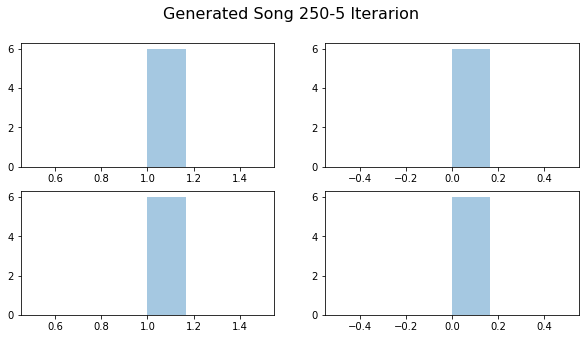

In [307]:
gen_song_250_5_curriculum_both_complex_deep_gen = crnngan_minmax_curriculum_both_complex_deep_gen.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_curriculum_both_complex_deep_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_curriculum_both_complex_deep_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_curriculum_both_complex_deep_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_curriculum_both_complex_deep_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


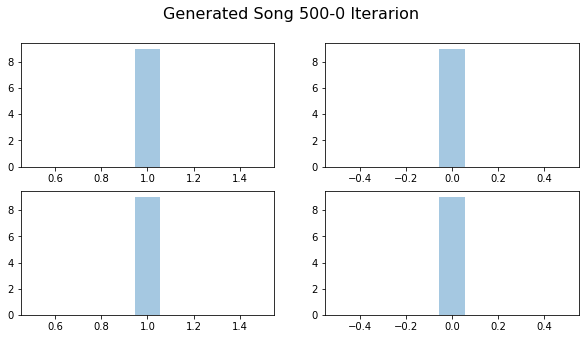

In [308]:
gen_song_500_curriculum_both_complex_deep_gen = crnngan_minmax_curriculum_both_complex_deep_gen.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_curriculum_both_complex_deep_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_curriculum_both_complex_deep_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_curriculum_both_complex_deep_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_curriculum_both_complex_deep_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


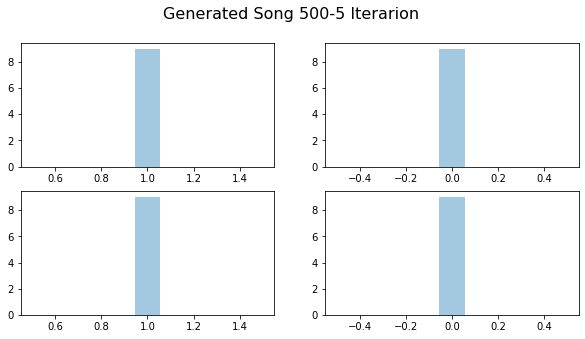

In [309]:
gen_song_500_5_curriculum_both_complex_deep_gen = crnngan_minmax_curriculum_both_complex_deep_gen.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_curriculum_both_complex_deep_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_curriculum_both_complex_deep_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_curriculum_both_complex_deep_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_curriculum_both_complex_deep_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


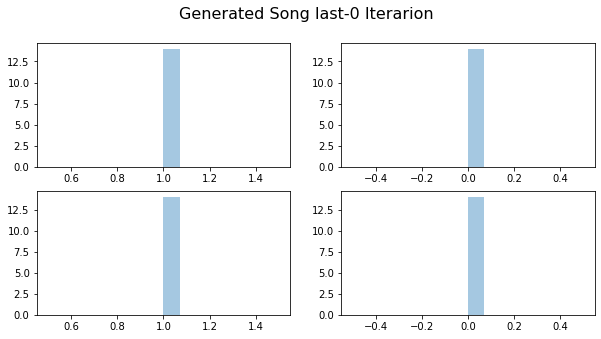

In [310]:
gen_song_last_curriculum_both_complex_deep_gen = crnngan_minmax_curriculum_both_complex_deep_gen.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_curriculum_both_complex_deep_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_curriculum_both_complex_deep_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_curriculum_both_complex_deep_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_curriculum_both_complex_deep_gen[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


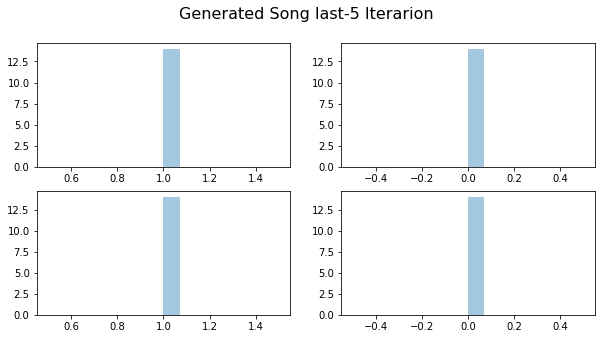

In [311]:
gen_song_last_5_curriculum_both_complex_deep_gen = crnngan_minmax_curriculum_both_complex_deep_gen.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_curriculum_both_complex_deep_gen[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_curriculum_both_complex_deep_gen[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_curriculum_both_complex_deep_gen[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_curriculum_both_complex_deep_gen[:,3], ax=axs[1, 1])

### Both Complex (3 layers deep discr)

#### No Curriculum

In [312]:
# Data loader
batch_length = 100
sequence_length = 100
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 50
curriculum_learning = False
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True
complexDiscriminator = True

crnngan_minmax_both_complex_deep_discr = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 complexGenerator=complexGenerator, complexDiscriminator=complexDiscriminator)

cuda
Complex Generator
Complex Discriminator


In [313]:
crnngan_minmax_both_complex_deep_discr.trainloop(musicDataLoader)

Start training for 50 epochs
[0/50][0]	Loss_D: 9.2131	Loss_G: 2.5195	D(x): -4.6049	D(G(z)): -4.6051 / -0.5275
 Time since epoch started: 0.21
There are a total of 0 fake songs saved already
[0/50][10]	Loss_D: 19.2621	Loss_G: 4.5967	D(x): -2.2239	D(G(z)): -2.2237 / -3.4874
 Time since epoch started: 2.02
There are a total of 5 fake songs saved already
[0/50][20]	Loss_D: 2.9034	Loss_G: 2.3784	D(x): -0.4972	D(G(z)): -0.4972 / -1.9305
 Time since epoch started: 3.83
There are a total of 10 fake songs saved already
Epoch time: 4.73
[1/50][30]	Loss_D: 1.6469	Loss_G: 0.8205	D(x): -0.6957	D(G(z)): -0.6957 / -0.4567
 Time since epoch started: 0.90
There are a total of 15 fake songs saved already
[1/50][40]	Loss_D: 1.4653	Loss_G: 0.7540	D(x): -0.5908	D(G(z)): -0.5908 / -0.4061
 Time since epoch started: 2.71
There are a total of 20 fake songs saved already
[1/50][50]	Loss_D: 1.4680	Loss_G: 0.7537	D(x): -0.4875	D(G(z)): -0.4875 / -0.4316
 Time since epoch started: 4.52
There are a total of 25 fak

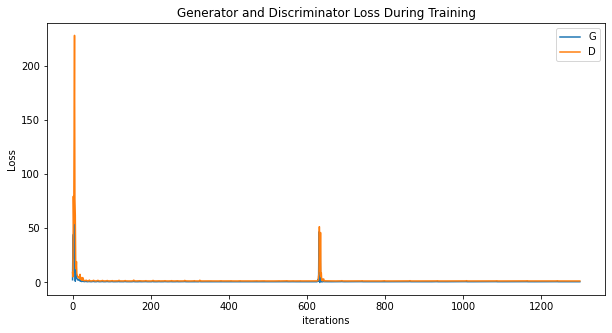

In [314]:
crnngan_minmax_both_complex_deep_discr.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

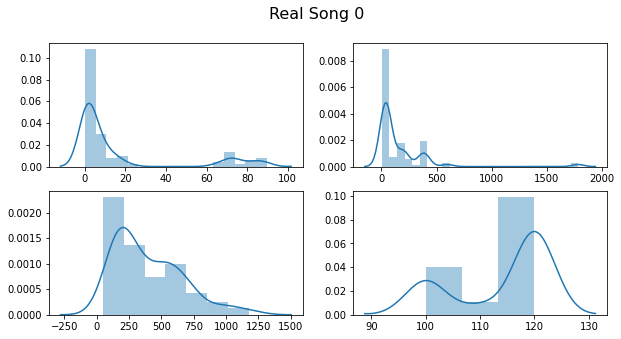

In [316]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

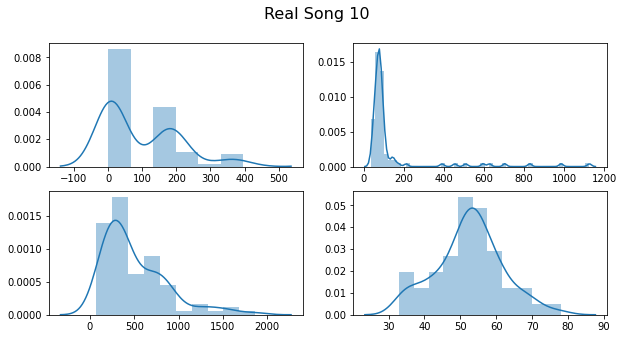

In [317]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


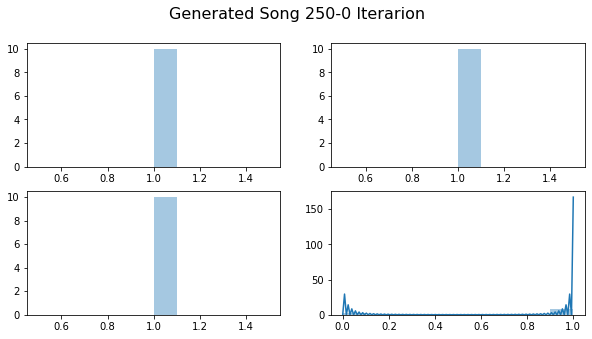

In [318]:
gen_song_250_both_complex_deep_discr = crnngan_minmax_both_complex_deep_discr.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_both_complex_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_both_complex_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_both_complex_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_both_complex_deep_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


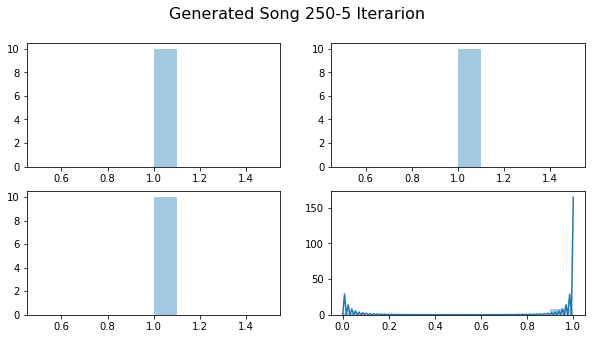

In [319]:
gen_song_250_5_both_complex_deep_discr = crnngan_minmax_both_complex_deep_discr.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_both_complex_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_both_complex_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_both_complex_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_both_complex_deep_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


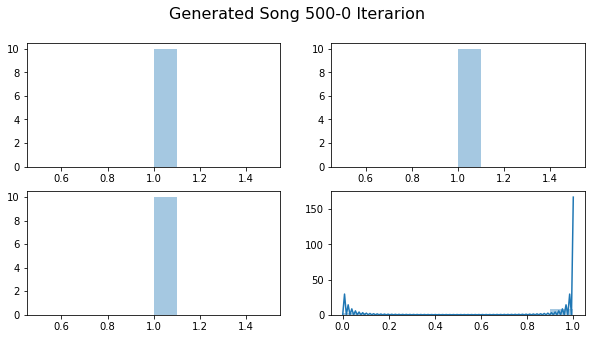

In [320]:
gen_song_500_both_complex_deep_discr = crnngan_minmax_both_complex_deep_discr.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_both_complex_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_both_complex_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_both_complex_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_both_complex_deep_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


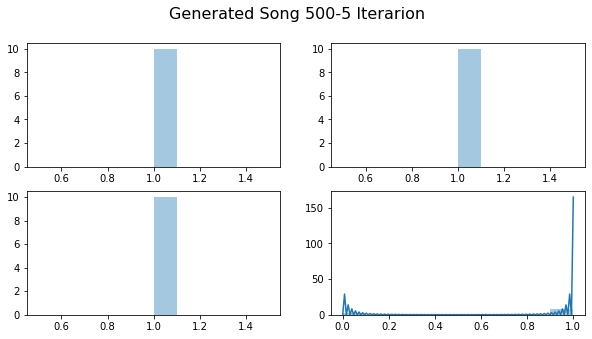

In [321]:
gen_song_500_5_both_complex_deep_discr = crnngan_minmax_both_complex_deep_discr.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_both_complex_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_both_complex_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_both_complex_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_both_complex_deep_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


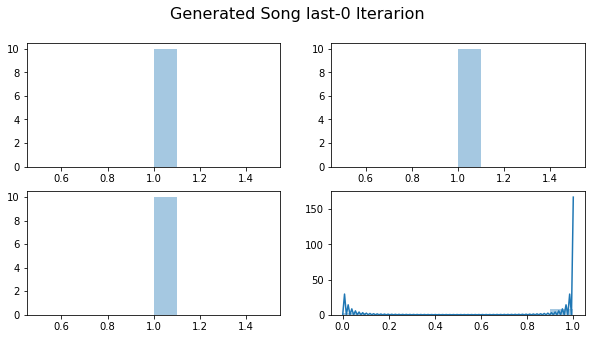

In [322]:
gen_song_last_both_complex_deep_discr = crnngan_minmax_both_complex_deep_discr.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_both_complex_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_both_complex_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_both_complex_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_both_complex_deep_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


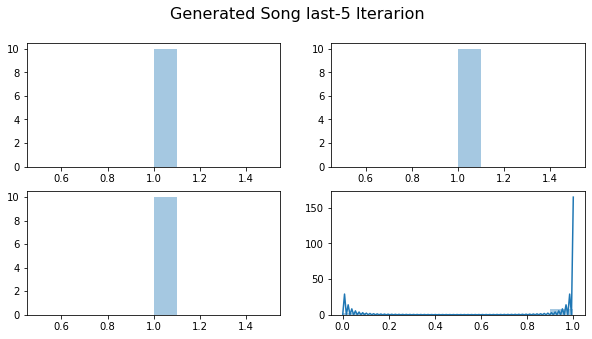

In [323]:
gen_song_last_5_both_complex_deep_discr = crnngan_minmax_both_complex_deep_discr.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_both_complex_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_both_complex_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_both_complex_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_both_complex_deep_discr[:,3], ax=axs[1, 1])

Again, good convergence and really bad generated values...

#### Curriculum

In [324]:
# Data loader
batch_length = 100
sequence_length = 20
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 2
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 80
curriculum_learning = True
G_var_threshold = 1e-3
D_var_threshold = 1e-3
max_sequence_length = 200
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True
complexDiscriminator = True

crnngan_minmax_curriculum_both_complex_deep_discr = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 G_var_threshold=G_var_threshold, D_var_threshold=D_var_threshold,
                 max_sequence_length=max_sequence_length,
                 complexGenerator=complexGenerator, complexDiscriminator=complexDiscriminator)

cuda
Complex Generator
Complex Discriminator


In [325]:
crnngan_minmax_curriculum_both_complex_deep_discr.trainloop(musicDataLoader)

Start training for 80 epochs
[0/80][0]	Loss_D: 5.9887	Loss_G: 6.6148	D(x): -2.9938	D(G(z)): -2.9938 / -0.0000
 Time since epoch started: 0.08
There are a total of 0 fake songs saved already
[0/80][10]	Loss_D: 3.8687	Loss_G: 1.9300	D(x): -0.2539	D(G(z)): -0.2539 / -0.9409
 Time since epoch started: 0.58
There are a total of 5 fake songs saved already
[0/80][20]	Loss_D: 5.0129	Loss_G: 1.8842	D(x): -2.2487	D(G(z)): -2.2487 / -0.1577
 Time since epoch started: 1.06
There are a total of 10 fake songs saved already
Epoch time: 1.30
[1/80][30]	Loss_D: 3.0814	Loss_G: 1.4551	D(x): -0.3326	D(G(z)): -0.3326 / -0.5630
 Time since epoch started: 0.23
There are a total of 15 fake songs saved already
[1/80][40]	Loss_D: 3.3732	Loss_G: 1.5636	D(x): -0.0937	D(G(z)): -0.0937 / -1.5149
 Time since epoch started: 0.70
There are a total of 20 fake songs saved already
[1/80][50]	Loss_D: 3.5469	Loss_G: 1.4174	D(x): -0.0538	D(G(z)): -0.0538 / -1.3916
 Time since epoch started: 1.17
There are a total of 25 fake

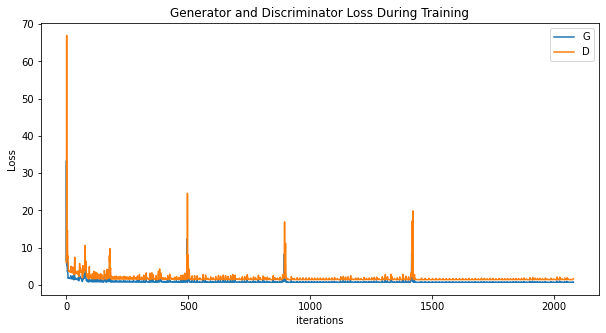

In [326]:
crnngan_minmax_curriculum_both_complex_deep_discr.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


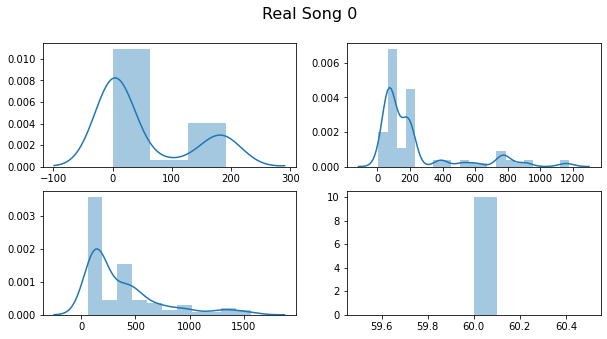

In [328]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

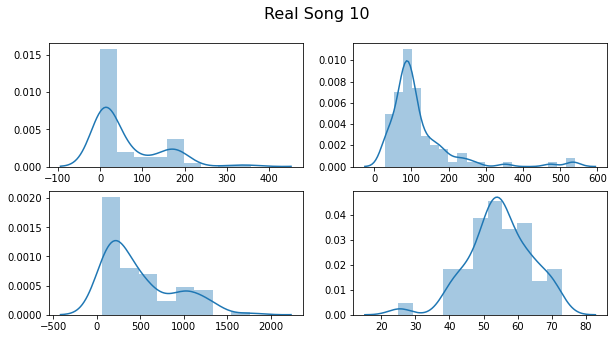

In [329]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


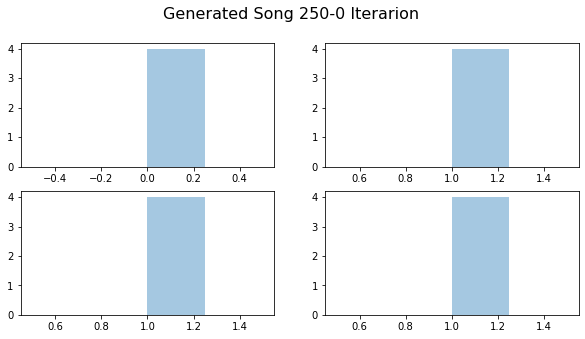

In [330]:
gen_song_250_curriculum_both_complex_deep_discr = crnngan_minmax_curriculum_both_complex_deep_discr.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_curriculum_both_complex_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_curriculum_both_complex_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_curriculum_both_complex_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_curriculum_both_complex_deep_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


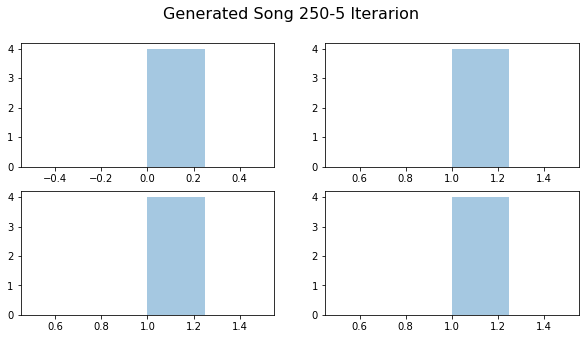

In [331]:
gen_song_250_5_curriculum_both_complex_deep_discr = crnngan_minmax_curriculum_both_complex_deep_discr.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_curriculum_both_complex_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_curriculum_both_complex_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_curriculum_both_complex_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_curriculum_both_complex_deep_discr[:,3], ax=axs[1, 1])

In [0]:
gen_song_500_curriculum_both_complex_deep_discr = crnngan_minmax_curriculum_both_complex_deep_discr.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_curriculum_both_complex_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_curriculum_both_complex_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_curriculum_both_complex_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_curriculum_both_complex_deep_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


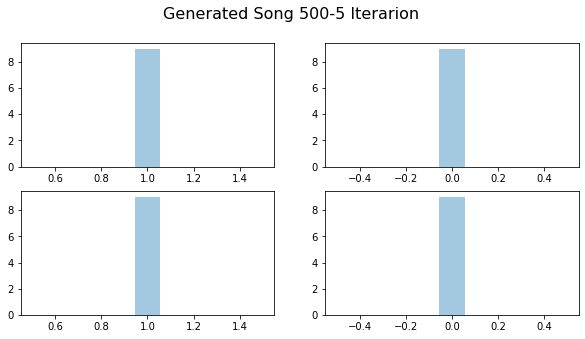

In [0]:
gen_song_500_5_curriculum_both_complex_deep_discr = crnngan_minmax_curriculum_both_complex_deep_discr.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_curriculum_both_complex_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_curriculum_both_complex_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_curriculum_both_complex_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_curriculum_both_complex_deep_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


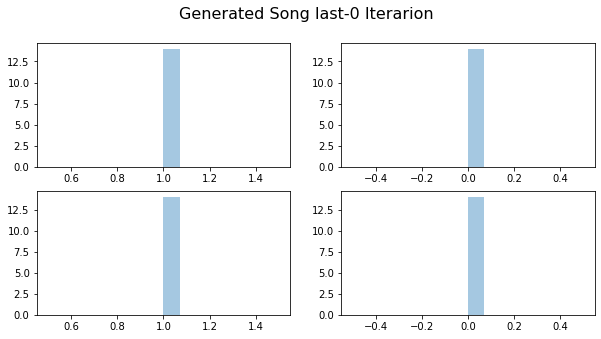

In [0]:
gen_song_last_curriculum_both_complex_deep_discr = crnngan_minmax_curriculum_both_complex_deep_discr.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_curriculum_both_complex_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_curriculum_both_complex_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_curriculum_both_complex_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_curriculum_both_complex_deep_discr[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


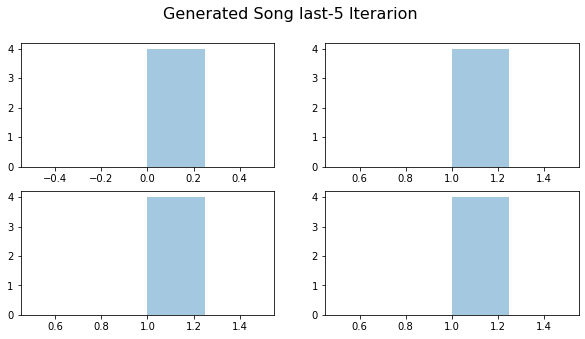

In [332]:
gen_song_last_5_curriculum_both_complex_deep_discr = crnngan_minmax_curriculum_both_complex_deep_discr.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_curriculum_both_complex_deep_discr[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_curriculum_both_complex_deep_discr[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_curriculum_both_complex_deep_discr[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_curriculum_both_complex_deep_discr[:,3], ax=axs[1, 1])

### Both Complex (3 layers deep both)

#### No Curriculum

In [345]:
# Data loader
batch_length = 100
sequence_length = 100
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 3
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 50
curriculum_learning = False
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True
complexDiscriminator = True

crnngan_minmax_both_complex_deep_both = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 complexGenerator=complexGenerator, complexDiscriminator=complexDiscriminator)

cuda
Complex Generator
Complex Discriminator


In [346]:
crnngan_minmax_both_complex_deep_both.trainloop(musicDataLoader)

Start training for 50 epochs
[0/50][0]	Loss_D: 9.2121	Loss_G: 8.4785	D(x): -4.6033	D(G(z)): -4.6034 / -0.0000
 Time since epoch started: 0.23
There are a total of 0 fake songs saved already
[0/50][10]	Loss_D: 5.8240	Loss_G: 2.3235	D(x): -0.0445	D(G(z)): -0.0445 / -0.9744
 Time since epoch started: 2.20
There are a total of 5 fake songs saved already
[0/50][20]	Loss_D: 4.6799	Loss_G: 2.7085	D(x): -1.7879	D(G(z)): -1.7879 / -0.0271
 Time since epoch started: 4.22
There are a total of 10 fake songs saved already
Epoch time: 5.22
[1/50][30]	Loss_D: 4.9147	Loss_G: 2.4250	D(x): -2.3100	D(G(z)): -2.3100 / -0.0286
 Time since epoch started: 1.01
There are a total of 15 fake songs saved already
[1/50][40]	Loss_D: 4.5414	Loss_G: 2.2842	D(x): -1.6596	D(G(z)): -1.6596 / -0.0212
 Time since epoch started: 3.01
There are a total of 20 fake songs saved already
[1/50][50]	Loss_D: 4.1132	Loss_G: 2.0263	D(x): -1.1473	D(G(z)): -1.1473 / -0.0267
 Time since epoch started: 5.01
There are a total of 25 fake

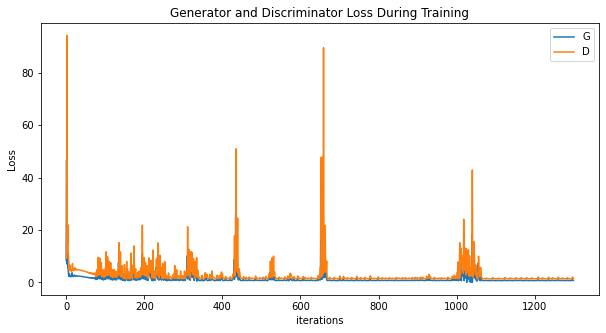

In [347]:
crnngan_minmax_both_complex_deep_both.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

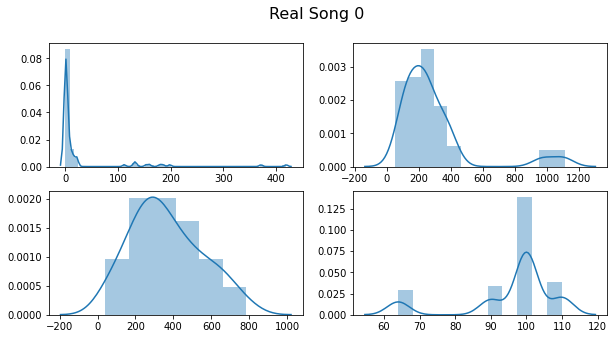

In [349]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

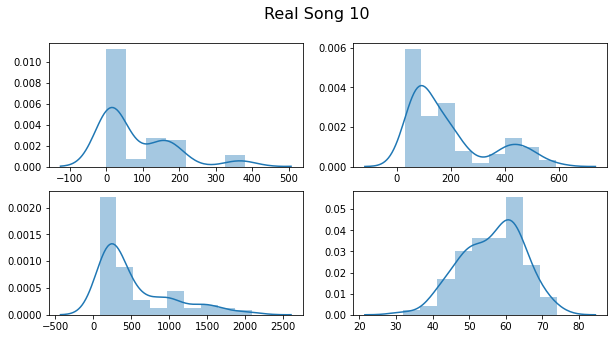

In [350]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


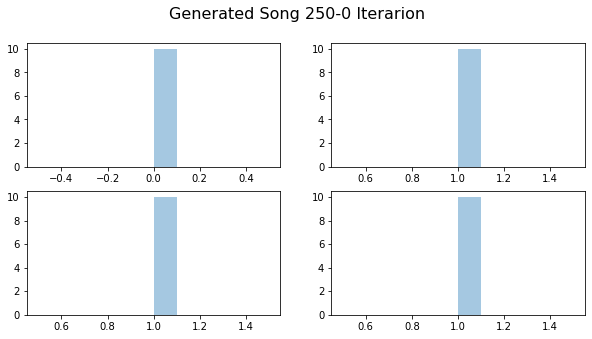

In [351]:
gen_song_250_both_complex_deep_both = crnngan_minmax_both_complex_deep_both.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_both_complex_deep_both[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_both_complex_deep_both[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_both_complex_deep_both[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_both_complex_deep_both[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


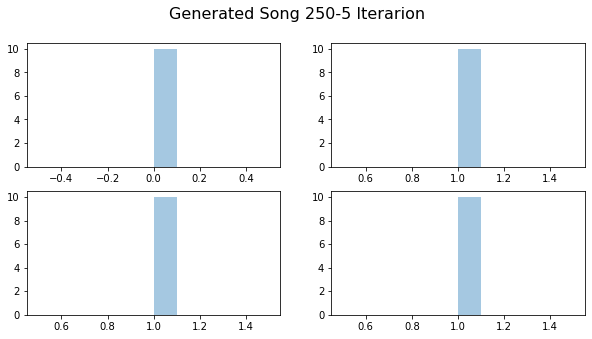

In [352]:
gen_song_250_5_both_complex_deep_both = crnngan_minmax_both_complex_deep_both.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_both_complex_deep_both[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_both_complex_deep_both[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_both_complex_deep_both[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_both_complex_deep_both[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


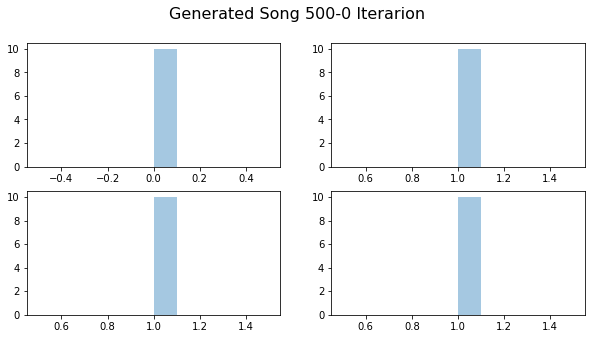

In [353]:
gen_song_500_both_complex_deep_both = crnngan_minmax_both_complex_deep_both.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_both_complex_deep_both[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_both_complex_deep_both[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_both_complex_deep_both[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_both_complex_deep_both[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


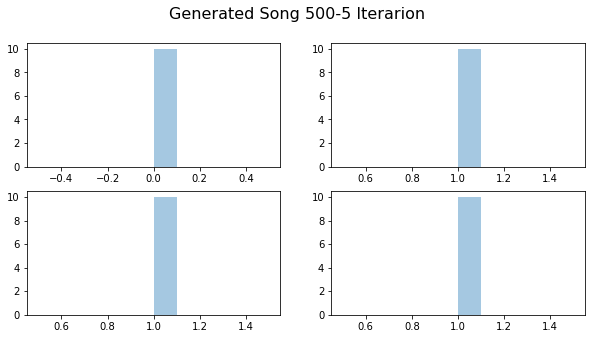

In [354]:
gen_song_500_5_both_complex_deep_both = crnngan_minmax_both_complex_deep_both.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_both_complex_deep_both[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_both_complex_deep_both[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_both_complex_deep_both[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_both_complex_deep_both[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


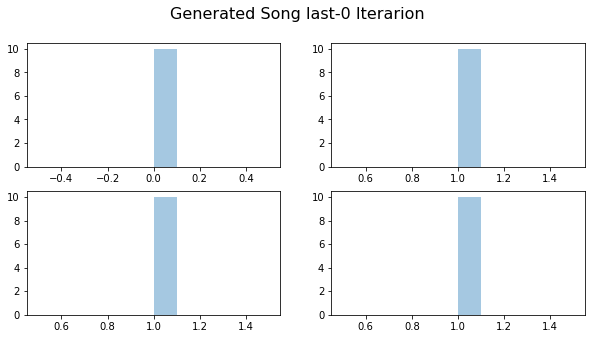

In [355]:
gen_song_last_both_complex_deep_both = crnngan_minmax_both_complex_deep_both.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_both_complex_deep_both[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_both_complex_deep_both[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_both_complex_deep_both[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_both_complex_deep_both[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


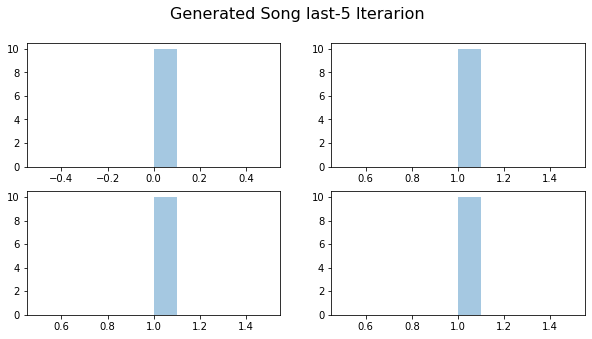

In [356]:
gen_song_last_5_both_complex_deep_both = crnngan_minmax_both_complex_deep_both.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_both_complex_deep_both[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_both_complex_deep_both[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_both_complex_deep_both[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_both_complex_deep_both[:,3], ax=axs[1, 1])

Again, good convergence and really bad generated values...

#### Curriculum

In [357]:
# Data loader
batch_length = 100
sequence_length = 20
# Generator parameters
in_channels_g = 20
out_channels_g = 4
hidden_dim_g = 350
n_layers_g = 3
# Discriminator parameters
in_channels_d = 4
out_channels_d = 2
hidden_dim_d = 350
n_layers_d = 3
# General
epochs = 80
curriculum_learning = True
G_var_threshold = 1e-3
D_var_threshold = 1e-3
max_sequence_length = 200
scale = 'minmax'
scale_values = [(min_percentile[i], max_percentile[i]) for i in range(len(min_percentile))]
complexGenerator = True
complexDiscriminator = True

crnngan_minmax_curriculum_both_complex_deep_both = crnngan.CRNNGAN(batch_length, sequence_length,
                 in_channels_g, out_channels_g, hidden_dim_g, n_layers_g,
                 in_channels_d, out_channels_d, hidden_dim_d, n_layers_d,
                 curriculum_learning = curriculum_learning, epochs=epochs,
                 scale=scale, scale_values=scale_values,
                 G_var_threshold=G_var_threshold, D_var_threshold=D_var_threshold,
                 max_sequence_length=max_sequence_length,
                 complexGenerator=complexGenerator, complexDiscriminator=complexDiscriminator)

cuda
Complex Generator
Complex Discriminator


In [358]:
crnngan_minmax_curriculum_both_complex_deep_both.trainloop(musicDataLoader)

Start training for 80 epochs
[0/80][0]	Loss_D: 5.9921	Loss_G: 5.5066	D(x): -2.9932	D(G(z)): -2.9930 / -0.0001
 Time since epoch started: 0.07
There are a total of 0 fake songs saved already
[0/80][10]	Loss_D: 4.1372	Loss_G: 2.3183	D(x): -0.2416	D(G(z)): -0.2416 / -2.3183
 Time since epoch started: 0.59
There are a total of 5 fake songs saved already
[0/80][20]	Loss_D: 3.6957	Loss_G: 1.8546	D(x): -0.6165	D(G(z)): -0.6165 / -0.4916
 Time since epoch started: 1.11
There are a total of 10 fake songs saved already
Epoch time: 1.39
[1/80][30]	Loss_D: 3.6369	Loss_G: 1.7989	D(x): -0.4556	D(G(z)): -0.4556 / -0.4713
 Time since epoch started: 0.26
There are a total of 15 fake songs saved already
[1/80][40]	Loss_D: 3.9515	Loss_G: 2.0492	D(x): -0.1800	D(G(z)): -0.1800 / -1.2759
 Time since epoch started: 0.79
There are a total of 20 fake songs saved already
[1/80][50]	Loss_D: 3.6863	Loss_G: 1.7865	D(x): -0.2232	D(G(z)): -0.2232 / -1.0929
 Time since epoch started: 1.31
There are a total of 25 fake

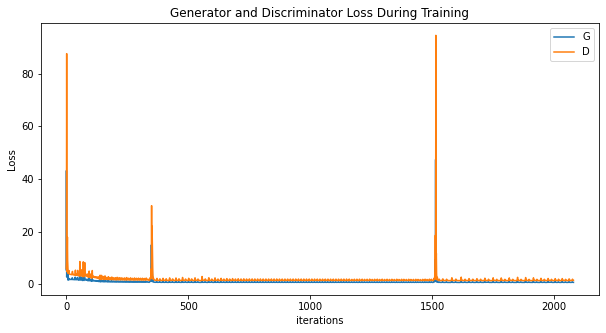

In [359]:
crnngan_minmax_curriculum_both_complex_deep_both.plot_losses()

In [0]:
seq_length = 100
batch_length = 100
musicDataLoader.rewind('train')
_, batch_data = musicDataLoader.get_batch(batchsize=batch_length, songlength=seq_length)

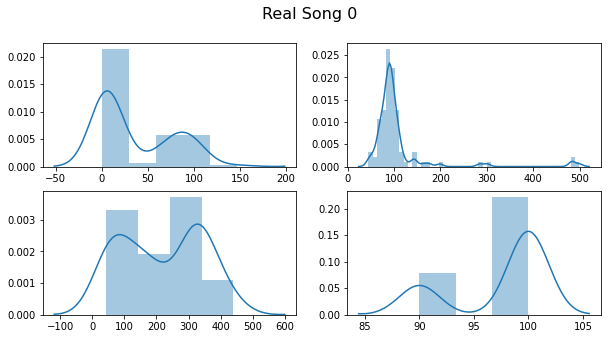

In [361]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 0 ', fontsize=16)
sns.distplot(batch_data[0,:,0], ax=axs[0, 0])
sns.distplot(batch_data[0,:,1], ax=axs[0, 1])
sns.distplot(batch_data[0,:,2], ax=axs[1, 0])
sns.distplot(batch_data[0,:,3], ax=axs[1, 1])

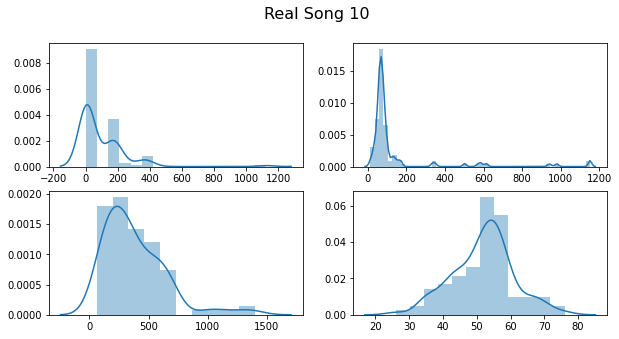

In [362]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Real Song 10 ', fontsize=16)
sns.distplot(batch_data[10,:,0], ax=axs[0, 0])
sns.distplot(batch_data[10,:,1], ax=axs[0, 1])
sns.distplot(batch_data[10,:,2], ax=axs[1, 0])
sns.distplot(batch_data[10,:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


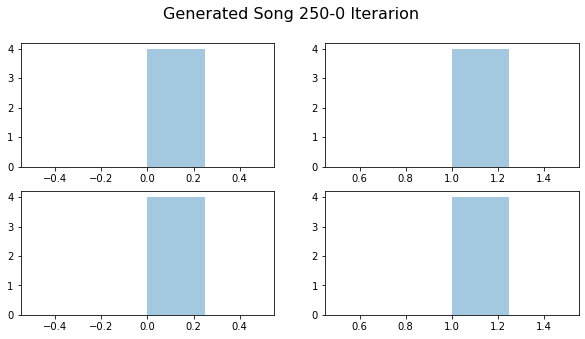

In [363]:
gen_song_250_curriculum_both_complex_deep_both = crnngan_minmax_curriculum_both_complex_deep_both.generated_songs[250][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-0 Iterarion', fontsize=16)
sns.distplot(gen_song_250_curriculum_both_complex_deep_both[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_curriculum_both_complex_deep_both[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_curriculum_both_complex_deep_both[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_curriculum_both_complex_deep_both[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


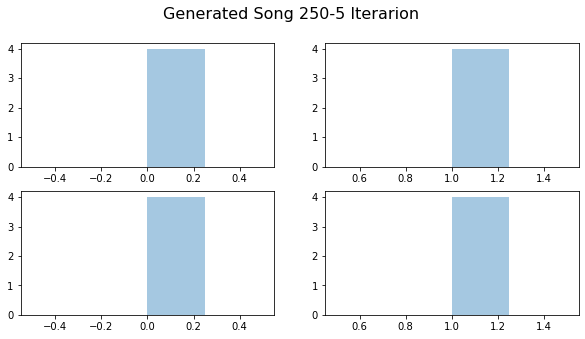

In [364]:
gen_song_250_5_curriculum_both_complex_deep_both = crnngan_minmax_curriculum_both_complex_deep_both.generated_songs[250][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 250-5 Iterarion', fontsize=16)
sns.distplot(gen_song_250_5_curriculum_both_complex_deep_both[:,0], ax=axs[0, 0])
sns.distplot(gen_song_250_5_curriculum_both_complex_deep_both[:,1], ax=axs[0, 1])
sns.distplot(gen_song_250_5_curriculum_both_complex_deep_both[:,2], ax=axs[1, 0])
sns.distplot(gen_song_250_5_curriculum_both_complex_deep_both[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


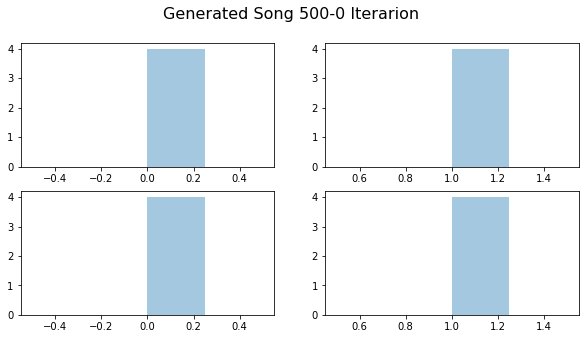

In [365]:
gen_song_500_curriculum_both_complex_deep_both = crnngan_minmax_curriculum_both_complex_deep_both.generated_songs[500][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-0 Iterarion', fontsize=16)
sns.distplot(gen_song_500_curriculum_both_complex_deep_both[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_curriculum_both_complex_deep_both[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_curriculum_both_complex_deep_both[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_curriculum_both_complex_deep_both[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


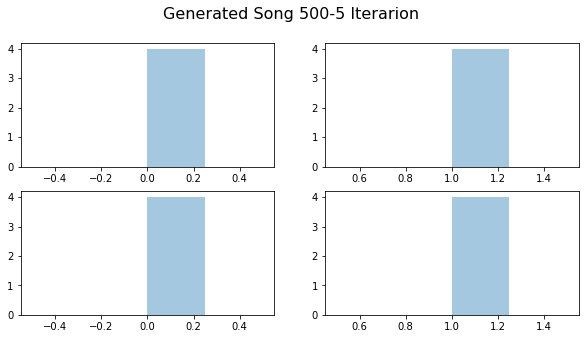

In [366]:
gen_song_500_5_curriculum_both_complex_deep_both = crnngan_minmax_curriculum_both_complex_deep_both.generated_songs[500][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song 500-5 Iterarion', fontsize=16)
sns.distplot(gen_song_500_5_curriculum_both_complex_deep_both[:,0], ax=axs[0, 0])
sns.distplot(gen_song_500_5_curriculum_both_complex_deep_both[:,1], ax=axs[0, 1])
sns.distplot(gen_song_500_5_curriculum_both_complex_deep_both[:,2], ax=axs[1, 0])
sns.distplot(gen_song_500_5_curriculum_both_complex_deep_both[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


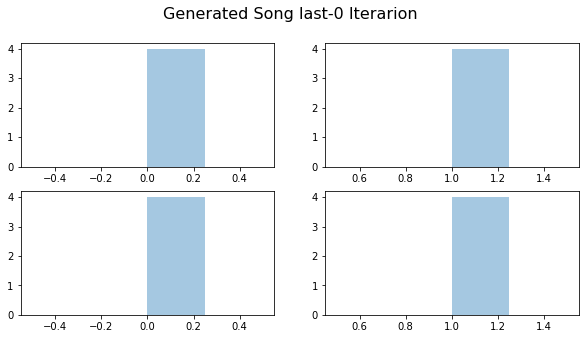

In [367]:
gen_song_last_curriculum_both_complex_deep_both = crnngan_minmax_curriculum_both_complex_deep_both.generated_songs[-1][0].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-0 Iterarion', fontsize=16)
sns.distplot(gen_song_last_curriculum_both_complex_deep_both[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_curriculum_both_complex_deep_both[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_curriculum_both_complex_deep_both[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_curriculum_both_complex_deep_both[:,3], ax=axs[1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


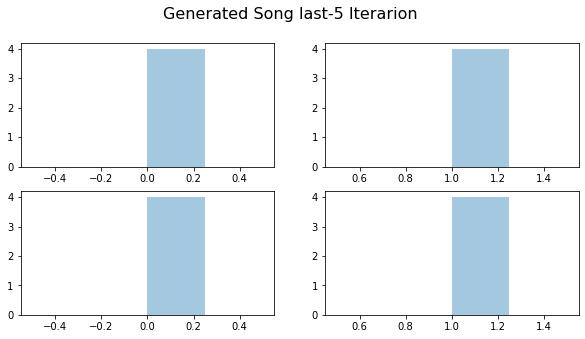

In [368]:
gen_song_last_5_curriculum_both_complex_deep_both = crnngan_minmax_curriculum_both_complex_deep_both.generated_songs[-1][5].cpu().numpy()
fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Generated Song last-5 Iterarion', fontsize=16)
sns.distplot(gen_song_last_5_curriculum_both_complex_deep_both[:,0], ax=axs[0, 0])
sns.distplot(gen_song_last_5_curriculum_both_complex_deep_both[:,1], ax=axs[0, 1])
sns.distplot(gen_song_last_5_curriculum_both_complex_deep_both[:,2], ax=axs[1, 0])
sns.distplot(gen_song_last_5_curriculum_both_complex_deep_both[:,3], ax=axs[1, 1])